# Import thư viện cần thiết

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly import tools

import warnings
warnings.filterwarnings('ignore')

chosen_palette = ["#8500ad", "#cf00c1", "#fa00fa", "#963dea"] 
sns.set_palette(chosen_palette)

Điều chính kích thước và độ phóng chung cho các biểu đồ trong bài tập này.

In [2]:
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['figure.dpi'] = 400

Đọc dữ liệu

In [3]:
train = pd.read_csv('../data/train_preprocessed.csv')
train.head()

Id      v2a1  hacdor  rooms  hacapo  v14a  refrig  v18q  v18q1  \
0  ID_279628684  190000.0       0      3       0     1       1     0    0.0   
1  ID_f29eb3ddd  135000.0       0      4       0     1       1     1    1.0   
2  ID_68de51c94       0.0       0      8       0     1       1     0    0.0   
3  ID_d671db89c  180000.0       0      5       0     1       1     1    1.0   
4  ID_d56d6f5f5  180000.0       0      5       0     1       1     1    1.0   

   r4h1  ...  SQBescolari  SQBage  SQBhogar_total  SQBedjefe  SQBhogar_nin  \
0     0  ...          100    1849               1        100             0   
1     0  ...          144    4489               1        144             0   
2     0  ...          121    8464               1          0             0   
3     0  ...           81     289              16        121             4   
4     0  ...          121    1369              16        121             4   

   SQBovercrowding  SQBdependency  SQBmeaned  agesq  Target  
0         1.000000            0.0      100.0   1849       4  
1         1.000000           64.0      144.0   4489       4  
2         0.250000           64.0      121.0   8464       4  
3         1.777778            1.0      121.0    289       4  
4         1.777778            1.0      121.0   1369       4  

[5 rows x 143 columns]

In [4]:
test = pd.read_csv('../data/test_preprocessed.csv')
test.head()

Id      v2a1  hacdor  rooms  hacapo  v14a  refrig  v18q  v18q1  \
0  ID_2f6873615       0.0       0      5       0     1       1     0    0.0   
1  ID_1c78846d2       0.0       0      5       0     1       1     0    0.0   
2  ID_e5442cf6a       0.0       0      5       0     1       1     0    0.0   
3  ID_a8db26a79       0.0       0     14       0     1       1     1    1.0   
4  ID_a62966799  175000.0       0      4       0     1       1     1    1.0   

   r4h1  ...  age  SQBescolari  SQBage  SQBhogar_total  SQBedjefe  \
0     1  ...    4            0      16               9          0   
1     1  ...   41          256    1681               9          0   
2     1  ...   41          289    1681               9          0   
3     0  ...   59          256    3481               1        256   
4     0  ...   18          121     324               1          0   

   SQBhogar_nin  SQBovercrowding  SQBdependency  SQBmeaned  agesq  
0             1             2.25           0.25     272.25     16  
1             1             2.25           0.25     272.25   1681  
2             1             2.25           0.25     272.25   1681  
3             0             1.00           0.00     256.00   3481  
4             1             0.25          64.00     121.00    324  

[5 rows x 142 columns]

# Khám phá dữ liệu

In [5]:
dict_target = { 1 :'Extreme',
                2 :'Moderate',
                3 :'Vulnerable ',
                4 :'Non vulnerable'}

cols = train.columns

# hàm tạo các df dựa trên key word 
def crearte_df(train, keyword, cols_name):
    cols = train.columns
    keyword_cols = cols[train.columns.str.contains(keyword)].tolist()
    name = cols_name
    keyword_df = pd.concat([train[keyword_cols], train['Target']],axis=1)
    keyword_df.columns = name
    keyword_df = keyword_df.groupby('Target').sum()
    return keyword_df


# plot bar and pie
def plot_bar_and_pie(df, title_bar, xlabel_bar,ylabel_bar,
                     title_pie):
    df_T = df.T
    key = [0,1,2,3]
    fig, ax = plt.subplots(1, 2, figsize=(16, 9))
    # Bar chart
    df_T.plot.bar(ax=ax[0])
    ax[0].set_title(title_bar)
    ax[0].set_xlabel(xlabel_bar)
    ax[0].set_ylabel(ylabel_bar)
    ax[0].set_xticklabels(df_T.index,rotation=0)
    ax[0].legend(dict_target.values())
    # Pie chart
    ax[1].pie(df_T.sum(axis=1), autopct='%1.1f%%')
    ax[1].set_title(title_pie)
    ax[1].legend(df_T.sum(axis=1).index)
    
    plt.tight_layout()
    plt.show()

## Sự phân hóa mức độ nghèo giữa các hộ gia đình

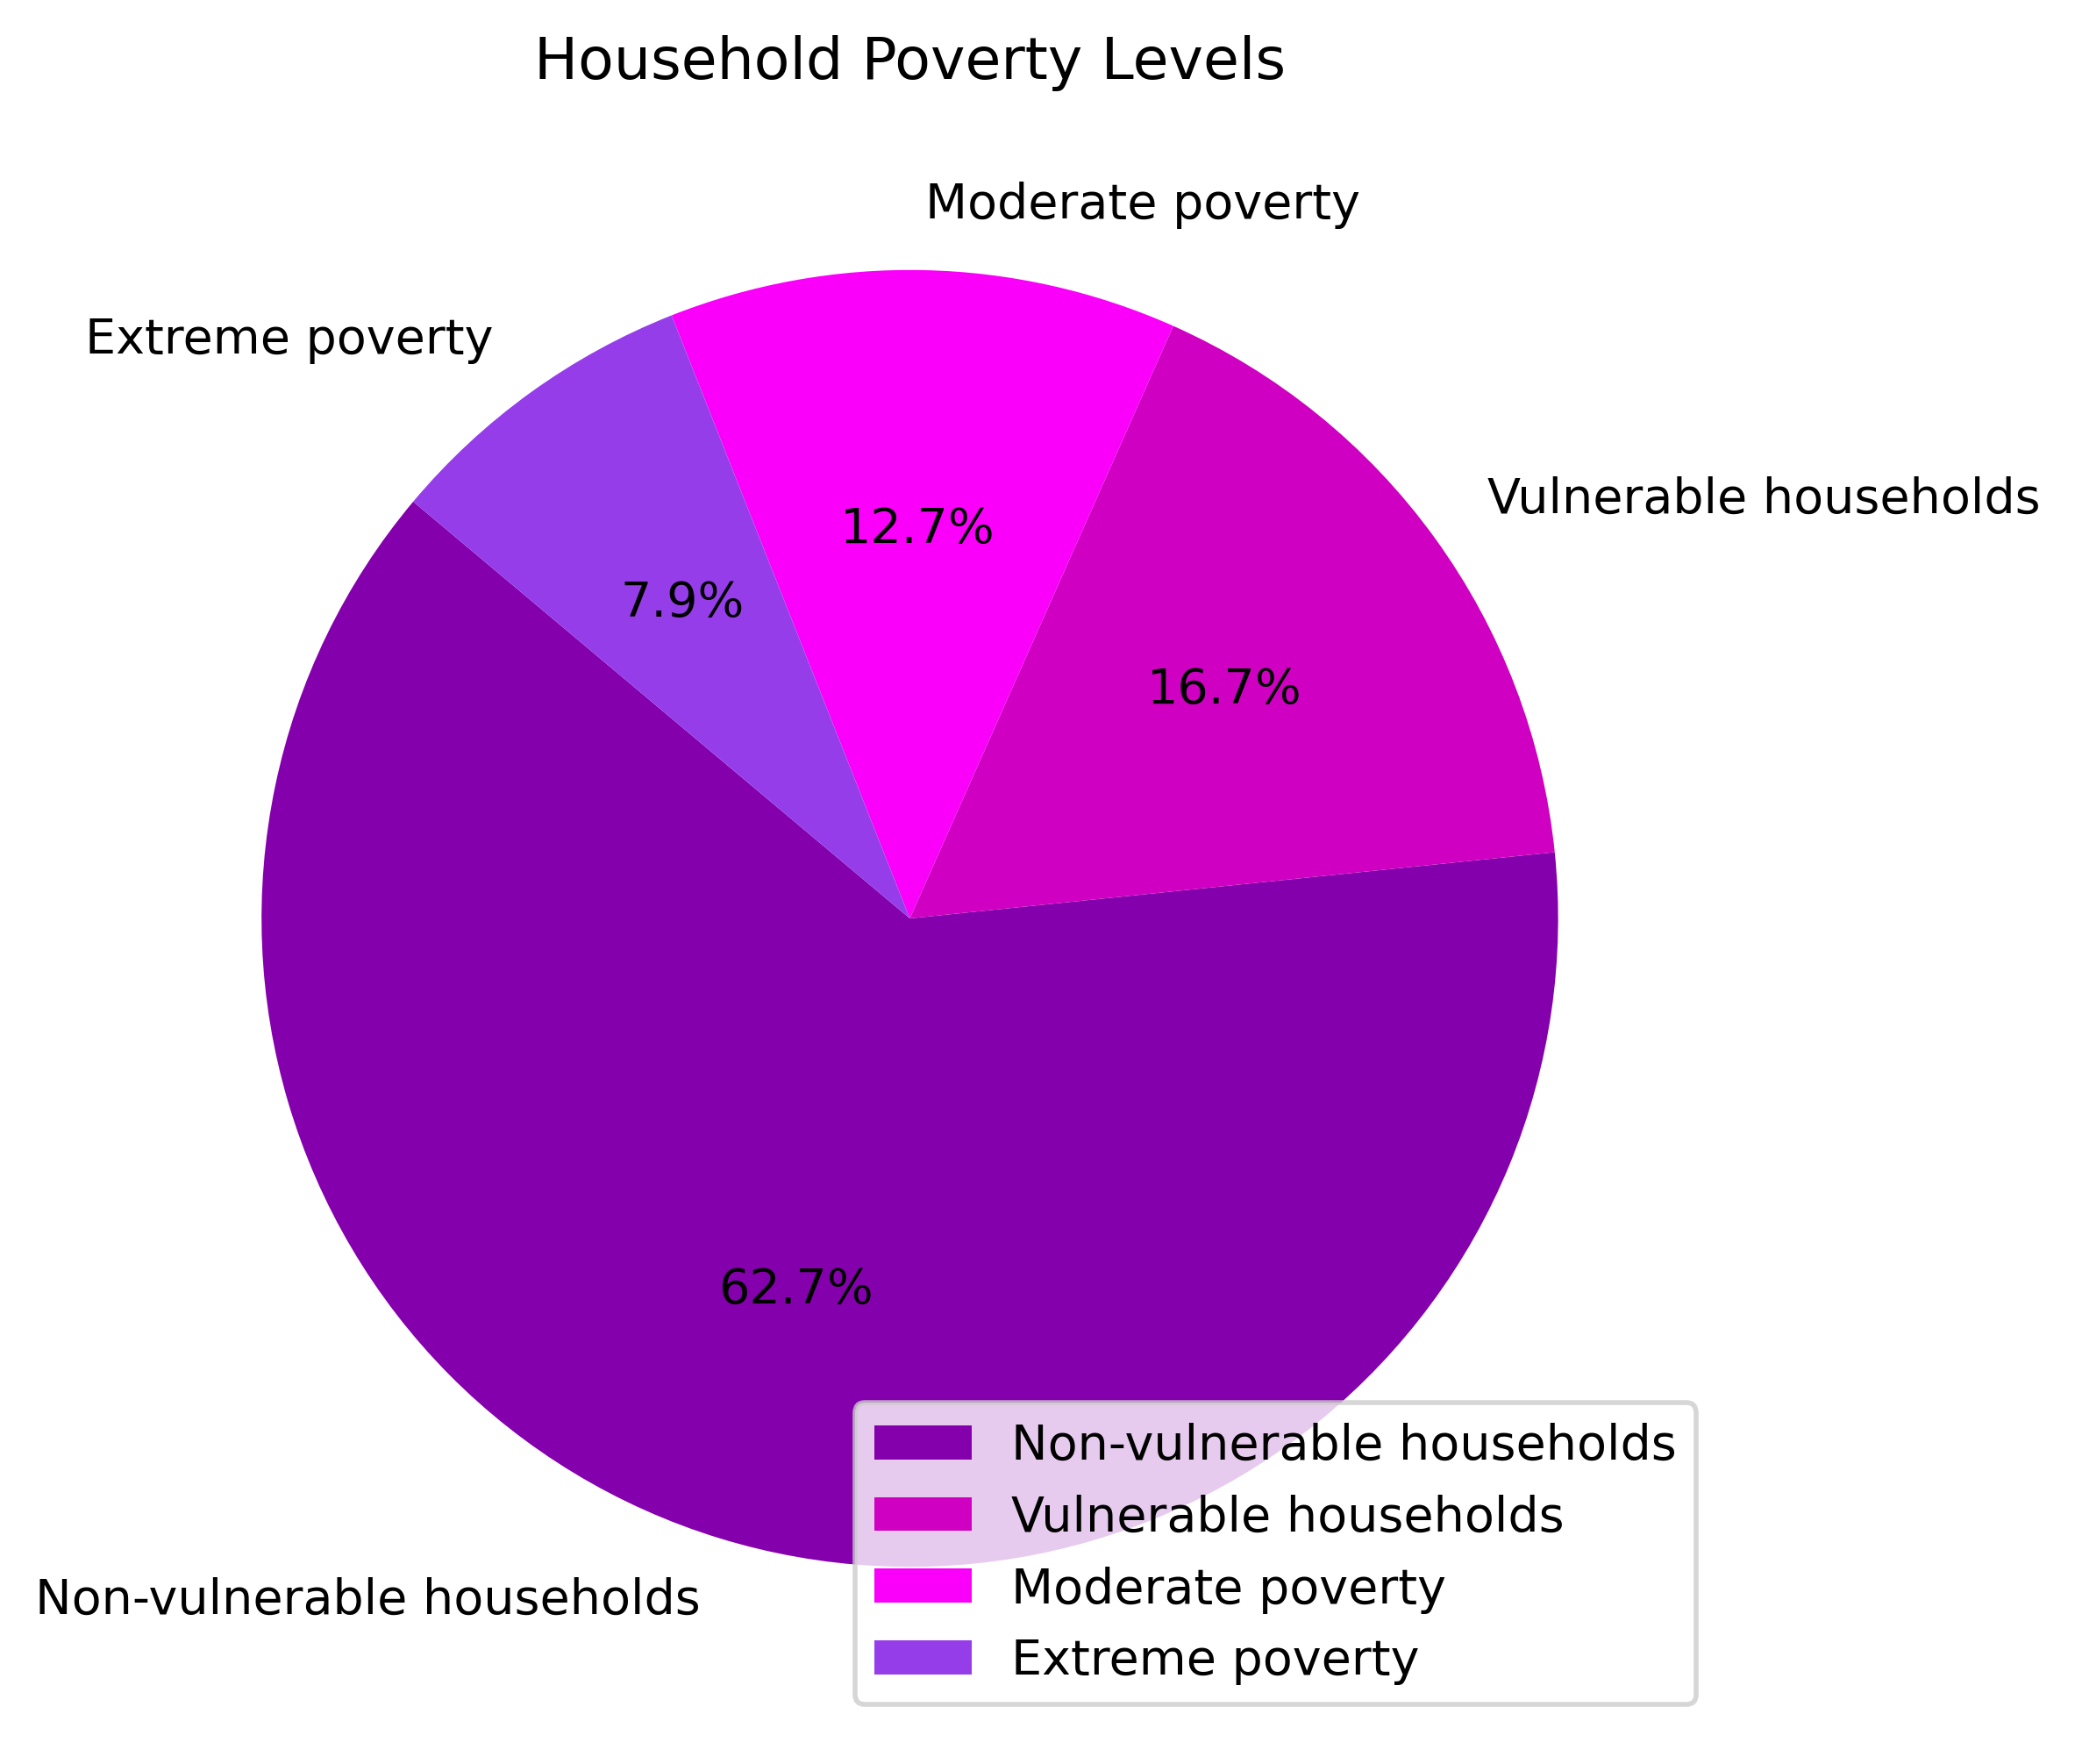

In [6]:
poverty_counts = train['Target'].value_counts()
labels = ['Non-vulnerable households', 'Vulnerable households', 'Moderate poverty', 'Extreme poverty']

plt.figure(figsize=(8, 6))
plt.pie(poverty_counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Household Poverty Levels')
plt.legend(loc=4)
plt.show()

**Nhận xét:**
+ Phân phối mức độ nghèo: Biểu đồ có một tỷ lệ không nhỏ các hộ gia đình ở Costa Rica đang phải đối mặt với nghèo đói, với $7.9\%$ ở mức độ nghèo cực độ và $12.7\%$ ở mức độ nghèo vừa phải. Điều này cho thấy rằng vẫn còn một phần lớn của dân số sống trong điều kiện khó khăn và đòi hỏi sự chú ý đặc biệt từ phía chính phủ và các tổ chức xã hội.
+ Nhóm dễ tổn thương: Tỷ lệ $16.7\%$ cho biết có một phần đáng kể các hộ gia đình ở Costa Rica thuộc nhóm dễ tổn thương, có khả năng rơi vào hoàn cảnh khó khăn nếu gặp phải các tác động không lường trước được như mất việc làm, thảm họa tự nhiên, hoặc sự biến động trong kinh tế.
+ Nhóm không dễ tổn thương: Tuy nhiên, với tỷ lệ $62.7\%$, phần lớn các hộ gia đình được xem là không dễ tổn thương, có khả năng ổn định hơn về mặt kinh tế và ít có nguy cơ rơi vào tình trạng nghèo đói.

## Số lượng các hộ gia đình với số lượng thành viên trong hộ gia đình tương ứng

Text(0, 0.5, 'Number')

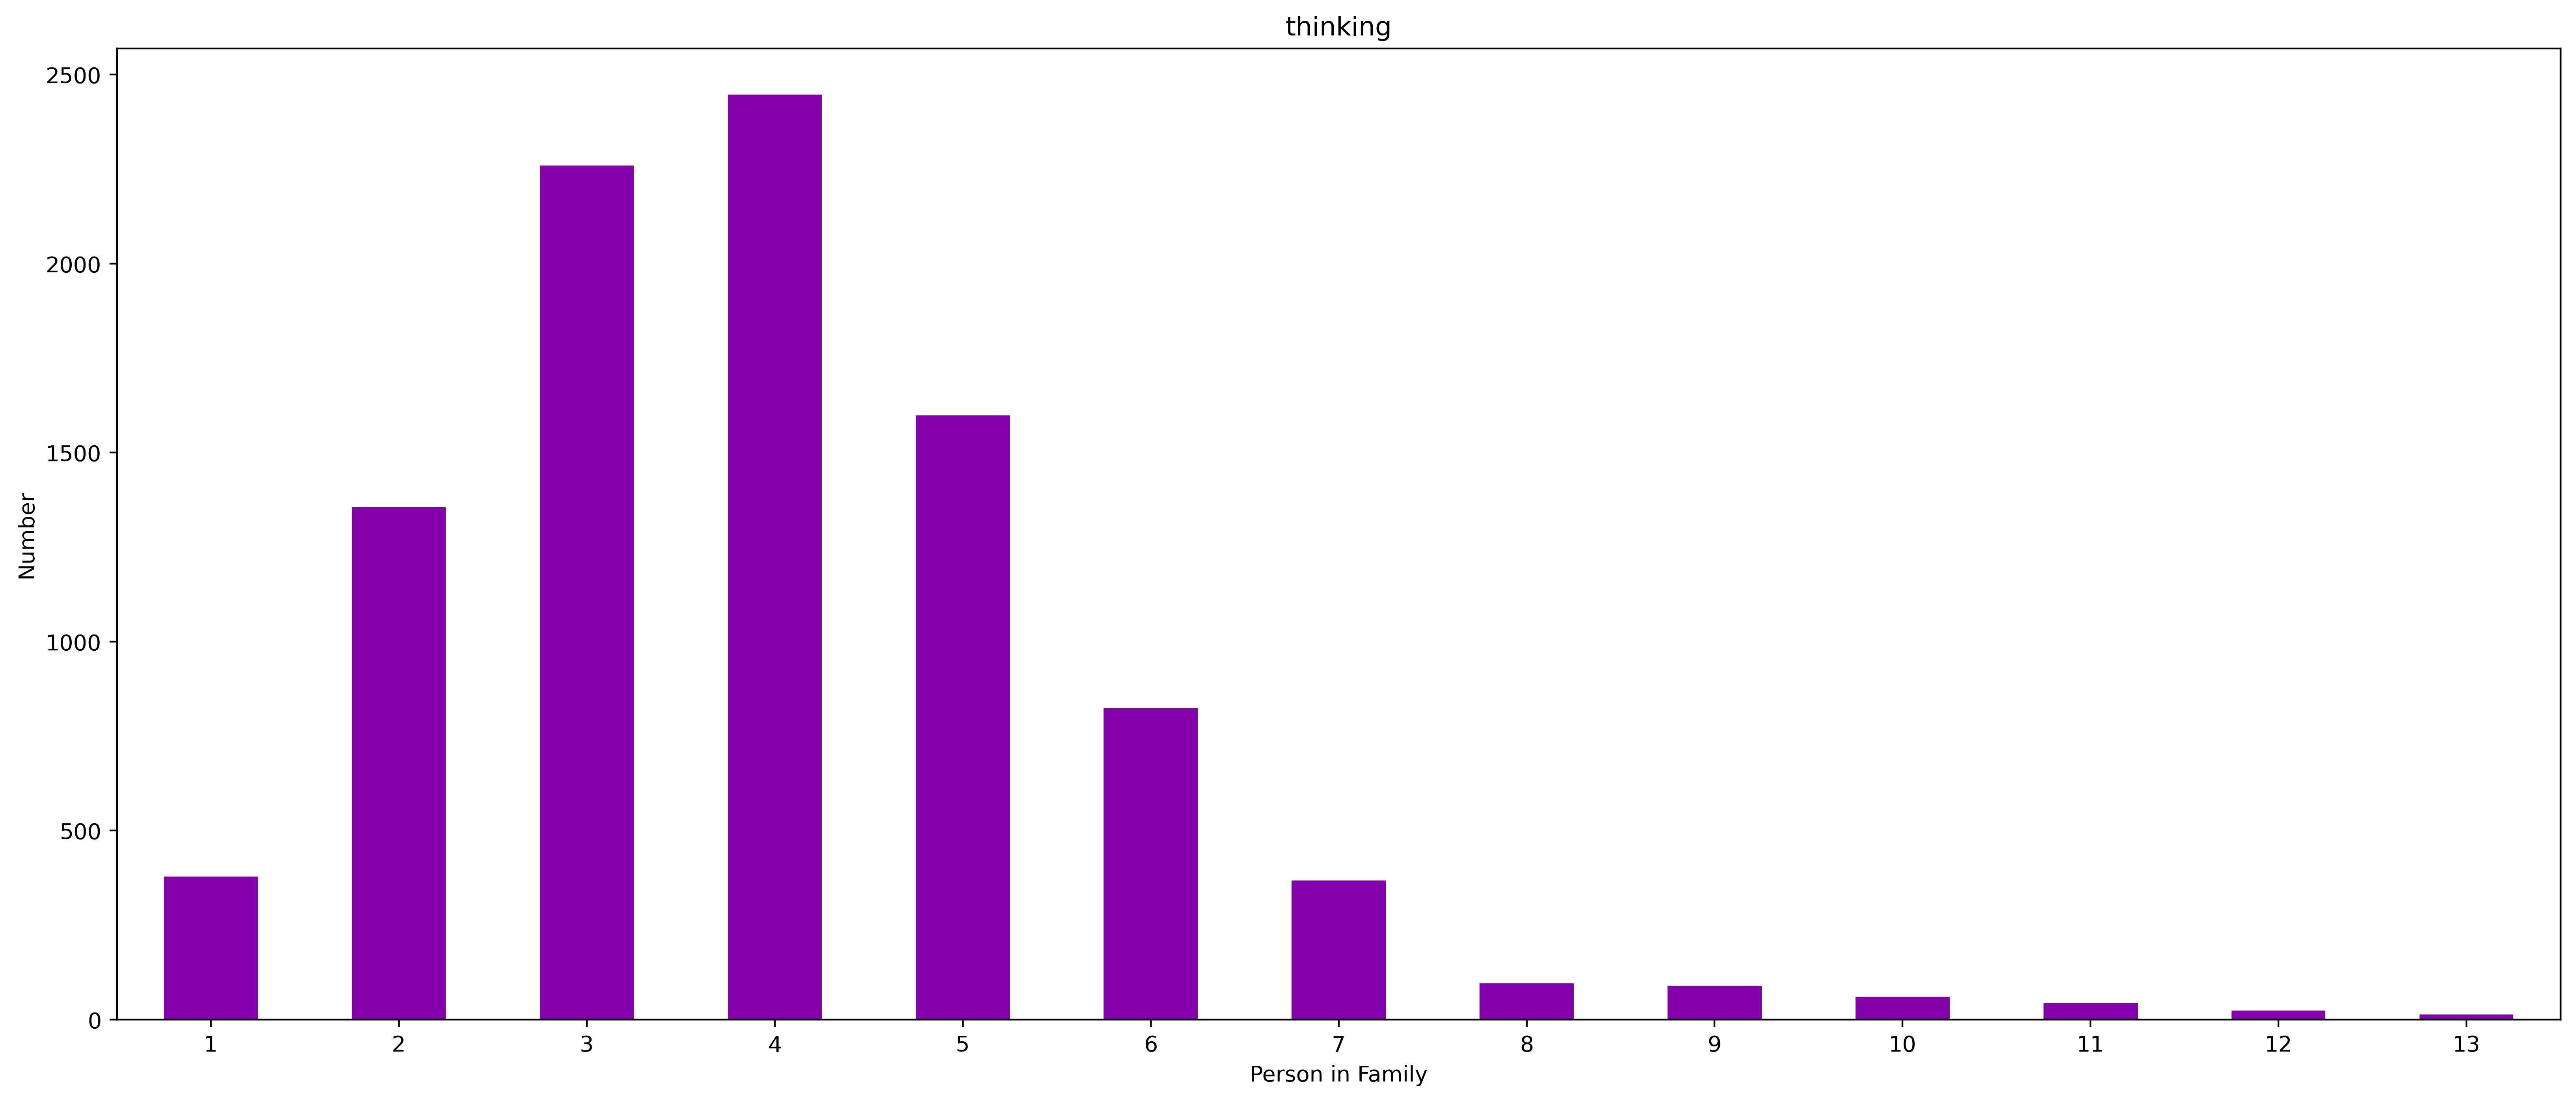

In [7]:
num_people = train['r4t3'].value_counts()
num_people = num_people.sort_index()

num_people.plot(kind='bar', figsize=(20, 8))
plt.title('thinking')
plt.xlabel('Person in Family')
plt.xticks(rotation=0)
plt.ylabel('Number')

**Nhận xét:**
+ Dựa vào biểu đồ, ta thấy rằng số lượng thành viên trong gia đình ở Costa Rica rất đa dạng, từ 1 người cho đến 13 người trong một gia đình.
+ Đa số các hộ gia đình có từ 2 đến 5 thành viên là chính, đặc biệt là hộ gia đình có 3, 4 thành viên.
+ Từ 8 đến 13 thành viên trong một hộ gia đình, ta thấy có rất ít hộ. ít nhất là hộ gia đình có 13 thành viên

In [8]:
nop = pd.DataFrame()
nop['Number of People'] = train['r4t3']
nop['Target'] = train['Target']
nop.head()

Number of People  Target
0                 1       4
1                 1       4
2                 1       4
3                 4       4
4                 4       4

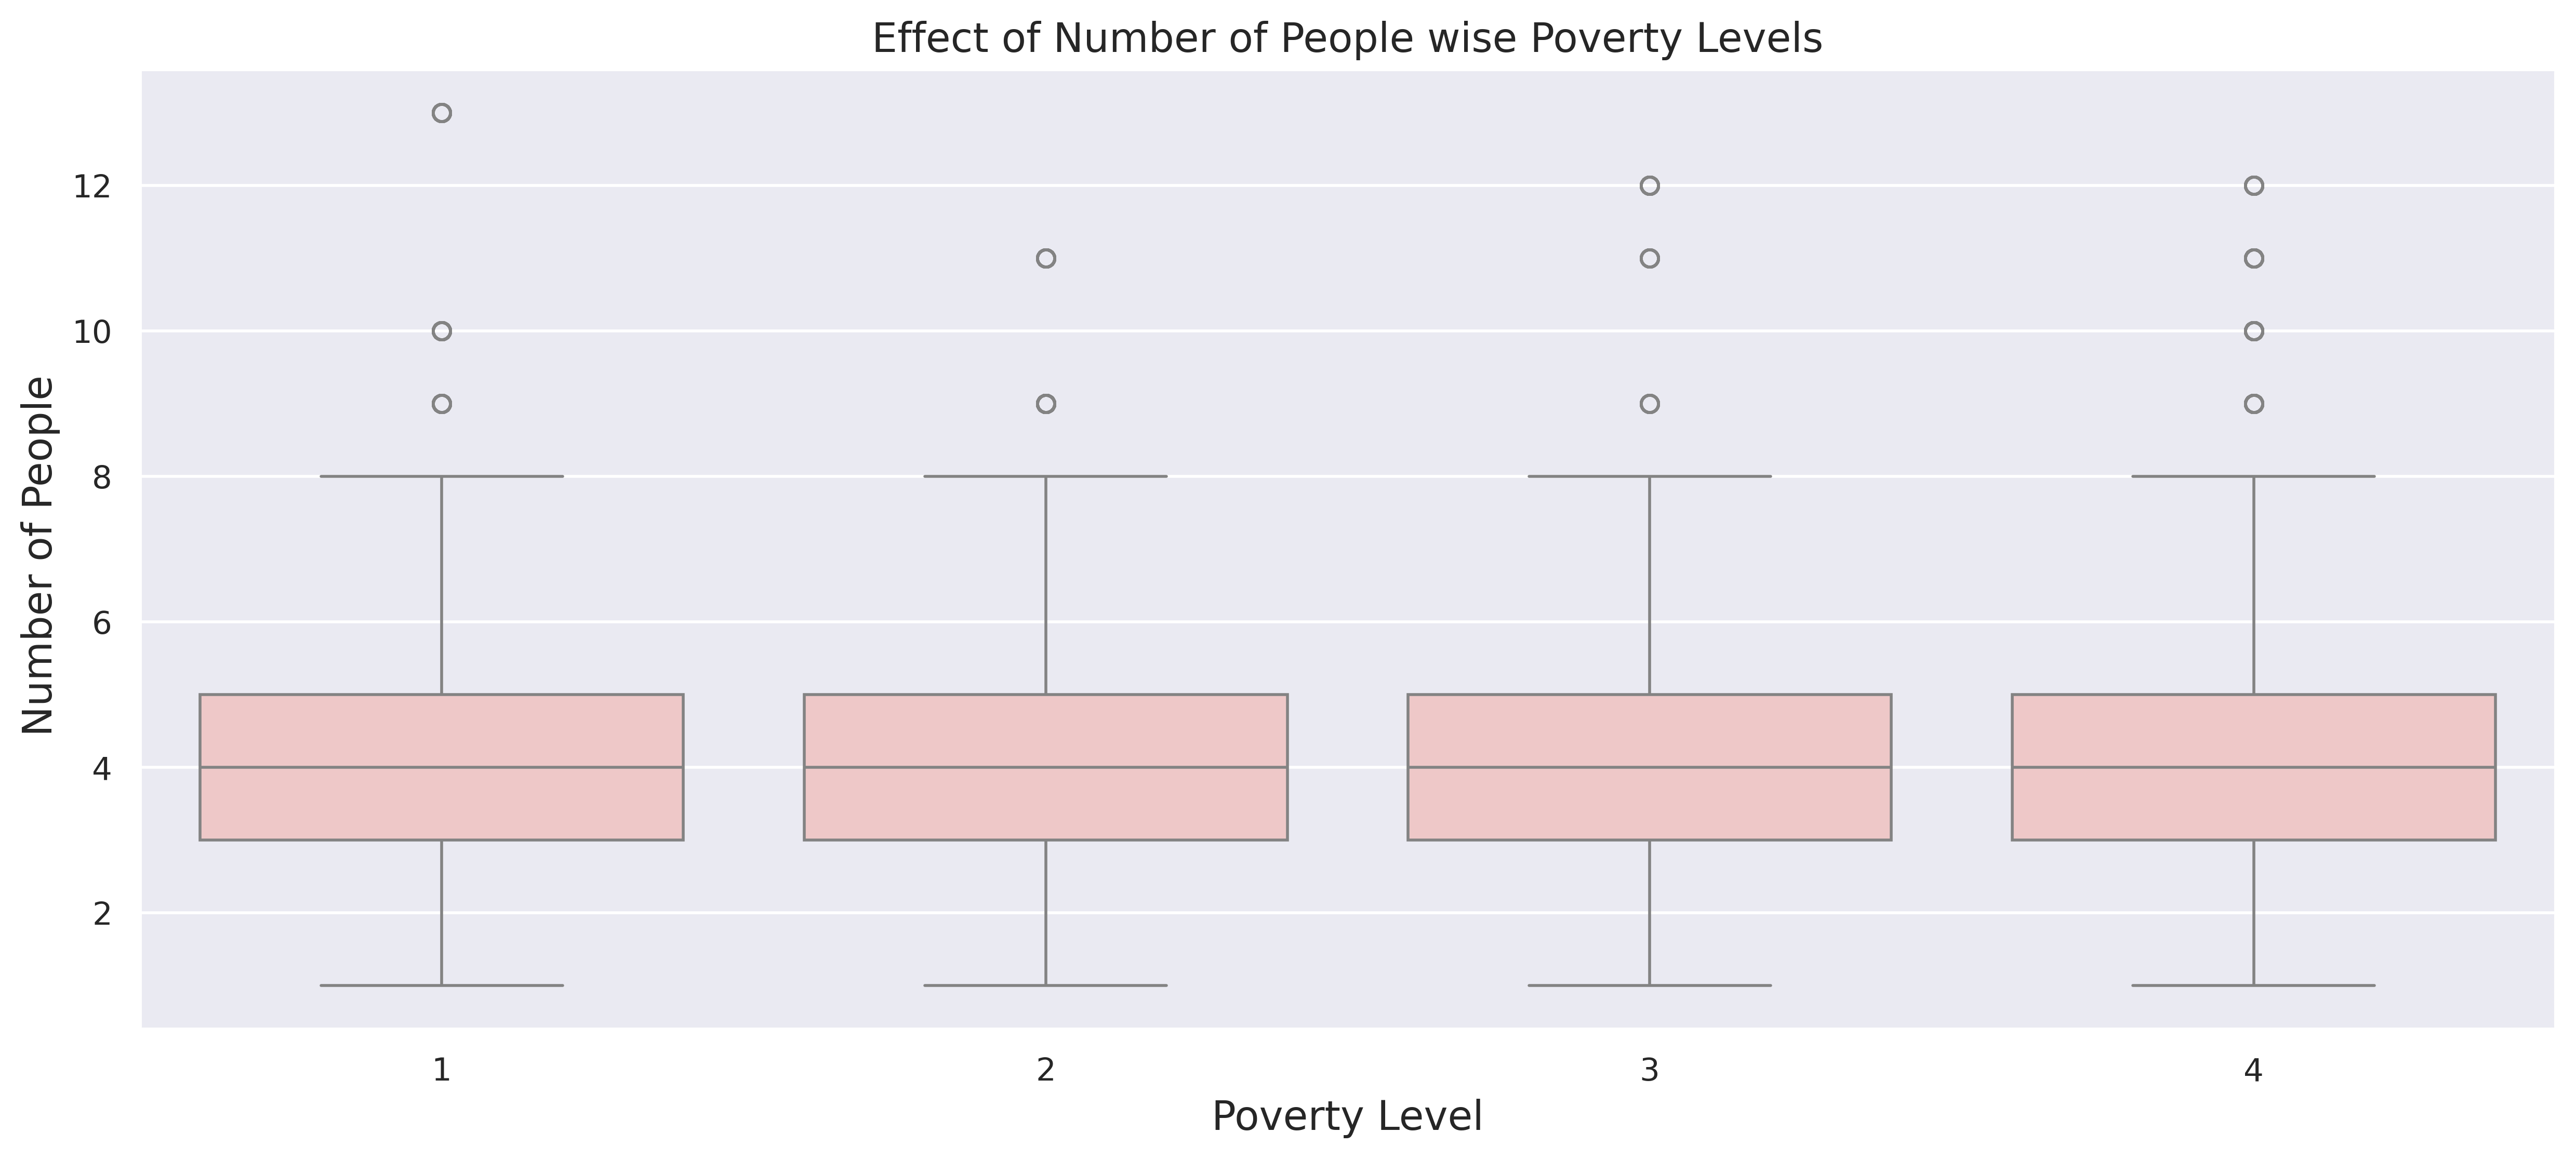

In [9]:
sns.set(rc={'figure.figsize':(15, 6)})
sns.boxplot(x="Target", y="Number of People",color = "#f4c2c2", data=nop)
plt.title("Effect of Number of People wise Poverty Levels", fontsize=14)
plt.xlabel('Poverty Level', fontsize=14)
plt.ylabel('Number of People ', fontsize=14)
plt.xticks(rotation=0)
plt.show()

**Nhận xét:**
- Dựa vào đồ thị ta thấy được rằng, đa số các hộ gia đình ở các mức độ kinh tế khác nhau có cùng giá trị tứ phân vị và trung vị và bằng 4
- Tuy có các ngoại lai nhưng các ngoại lai đó lại khác nhau:
    - Đối với hộ gia đình có kinh tế ở mức 1, các ngoại lai nằm rải rác từ 8 trở lên và có tồn tại một ngoại lai ở khoảng giá trị 12
    - Đối với các hộ gia đình có mức kinh tế ở các mức còn lại, các ngoại lai nằm rải rác từ khoảng 8 đến 10, hộ gia đình có mức kinh tế 2 có ít ngoại lai nhất, trong khi hộ gia đình có kinh tế mức 4 có nhiều ngoại lai nhất

Text(0, 0.5, 'Number of household')

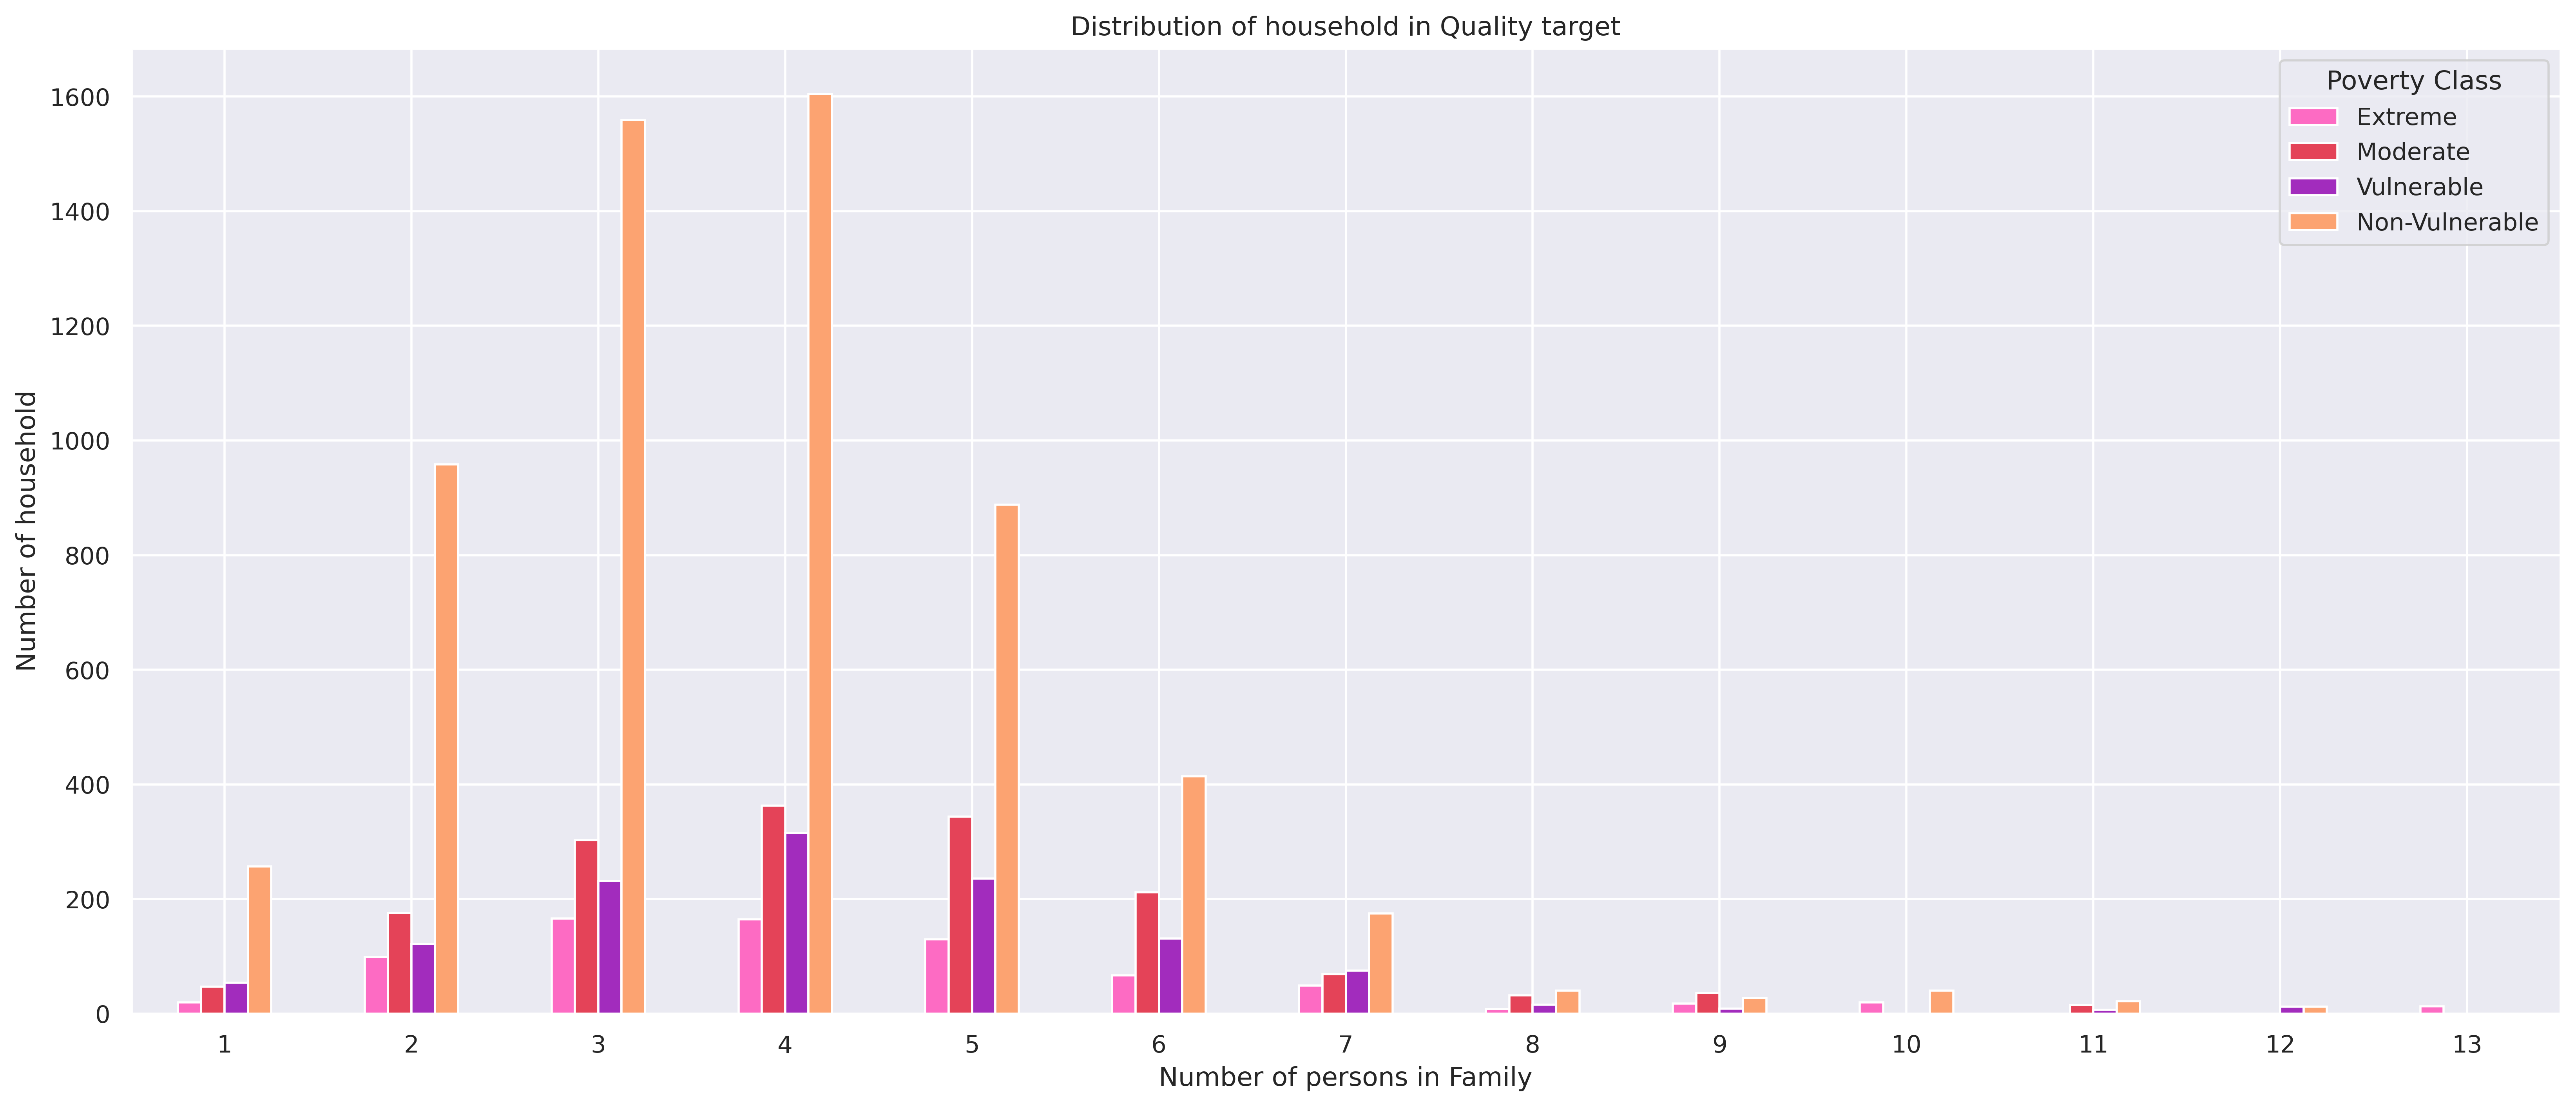

In [10]:
current = train.pivot_table(index='r4t3', columns='Target', aggfunc='size', fill_value=0)
current

current.plot(kind='bar', figsize=(20, 8), color=['#fd6bc3', '#e44358', '#a22cbd', '#fca371'])
plt.title('Distribution of household in Quality target')
plt.legend(labels=['Extreme', 'Moderate', 'Vulnerable', 'Non-Vulnerable'], title='Poverty Class', loc='upper right')
plt.xlabel('Number of persons in Family')
plt.xticks(rotation=0)
plt.ylabel('Number of household')

**Nhận xét:**
- Tiếp nối từ biểu đồ trên, kết hợp thêm cột `'Target'`, ta sẽ thấy được sự phân bố về kinh tế của các hộ gia đình.
- Ở các hộ gia đình có từ 7 thành viên trở xuống, tỉ lệ các hộ gia đình thuộc tầng lớp `Non-vulnerable` là áp đảo hoàn toàn so với các mức kinh tế khác. Theo sau đó đa phần là các hộ thuộc `Moderate`. Tuy nhiên với số lượng thành viên trong gia đình là 1 và 7 thì xếp thứ nhì chính là các hộ thuộc `Vulnerable`.
- Từ hộ gia đình có 8 thành viên trở đi, ta thấy có sự chuyển biến nhẹ. Hộ gia đình thuộc nhóm `Non-vulnerable` không còn luôn luôn chiếm ưu thế nữa. Thay vào đó nổi bật là `Moderate` và `Extreme`.
- Có thể thấy được rằng, với các hộ gia đình càng đông thành viên, thì thường họ sẽ có xu hướng khó khăn hơn về mặt kinh tế so với các hộ gia đình ít thành viên.

## Tỷ lệ nam và nữ trong các hộ gia đình

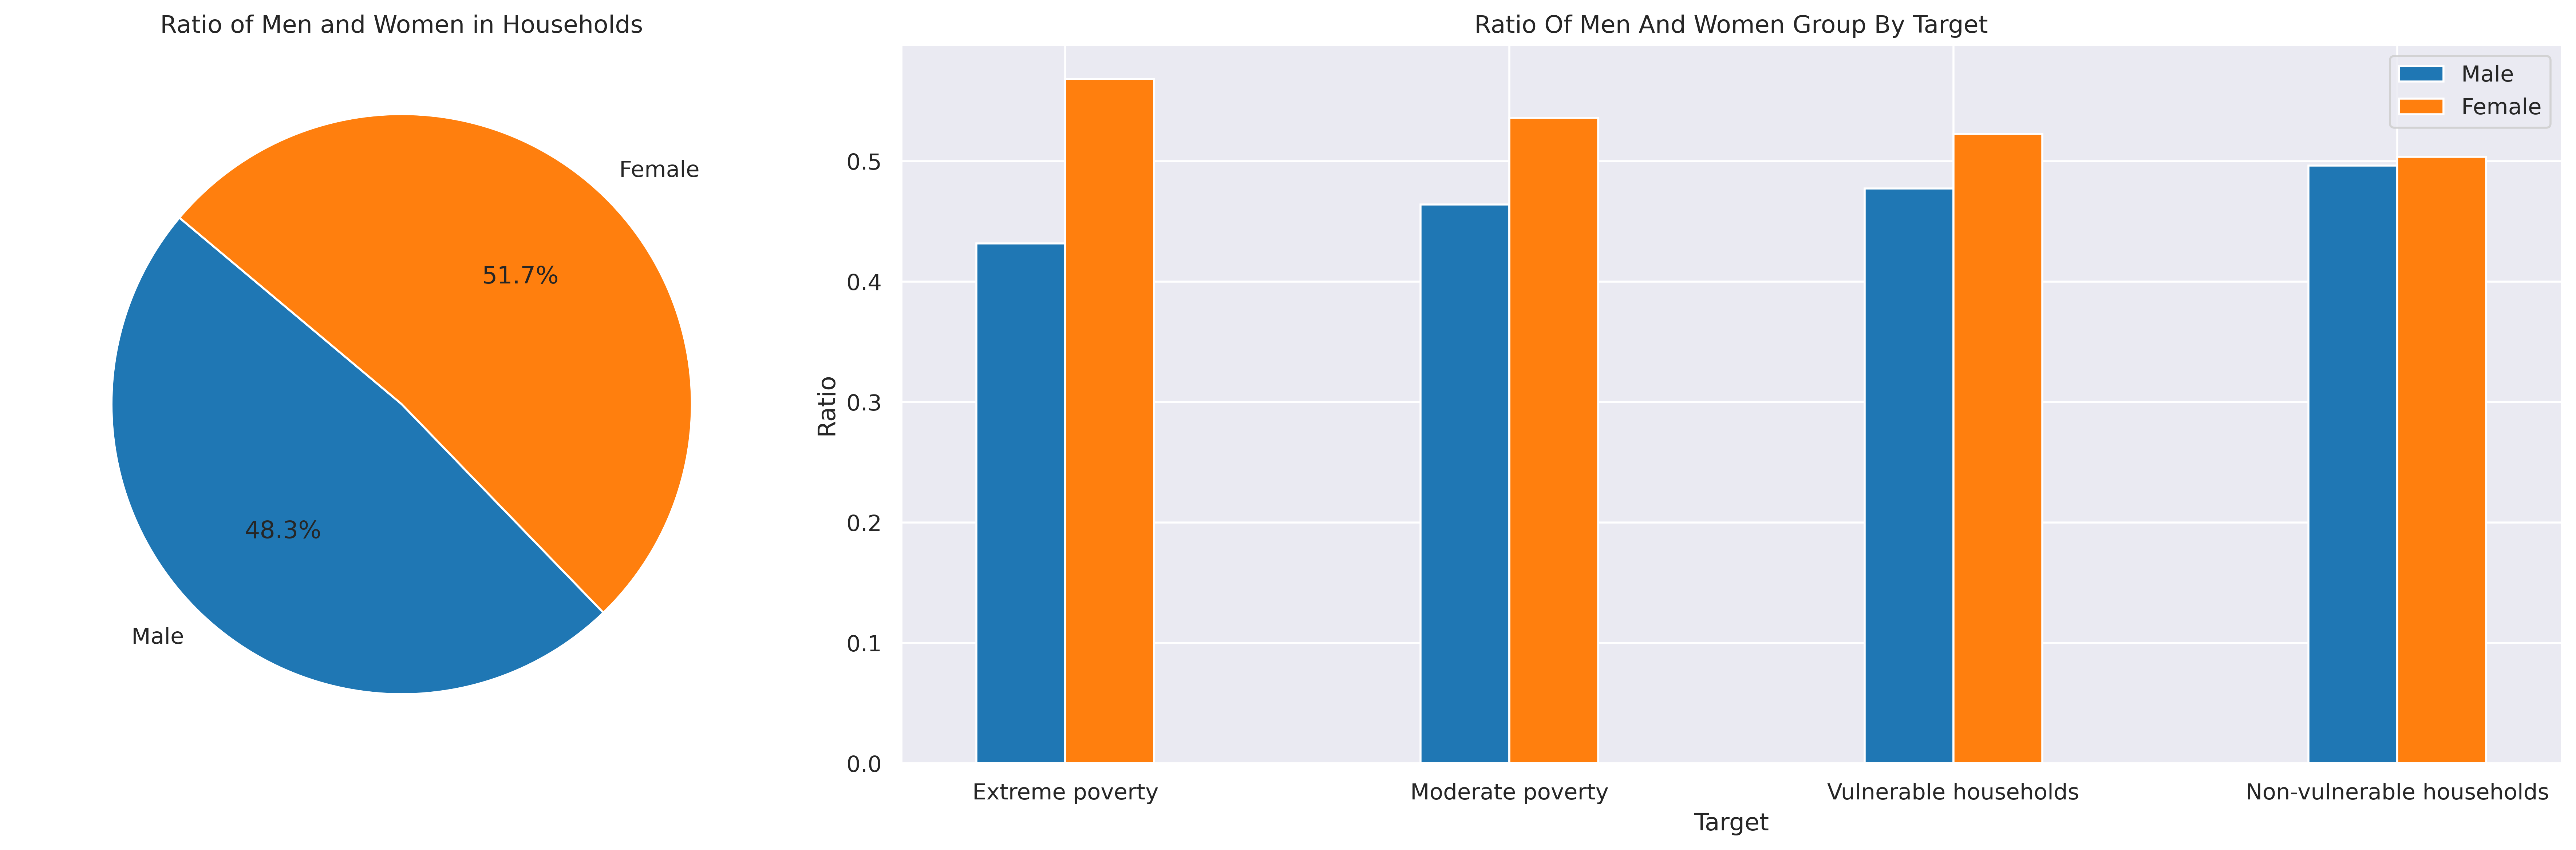

In [11]:
total_males = train['male'].sum()
total_females = train['female'].sum()

male_ratio = total_males / (total_males + total_females)
female_ratio = total_females / (total_males + total_females)

labels = ['Male', 'Female']
colors = ['#1f77b4', '#ff7f0e']
sizes_pie = [male_ratio.mean(), female_ratio.mean()]

# Pie chart
plt.figure(figsize=(18, 6))  
plt.subplot2grid((1, 3), (0, 0)) 
plt.pie(sizes_pie, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Ratio of Men and Women in Households')
plt.axis('equal')

# Bar chart
male_by_target = train.groupby('Target')['male'].sum()
female_by_target = train.groupby('Target')['female'].sum()

male_ratio = male_by_target / (male_by_target + female_by_target)
female_ratio = female_by_target / (male_by_target + female_by_target)

labels_bar = ['Extreme poverty', 'Moderate poverty', 'Vulnerable households', 'Non-vulnerable households']
index_bar = np.arange(len(labels_bar))
bar_width = 0.2

plt.subplot2grid((1, 3), (0, 1), colspan=2)
plt.bar(index_bar, male_ratio, bar_width, label=labels[0], color=colors[0])
plt.bar(index_bar + bar_width, female_ratio, bar_width, label=labels[1], color=colors[1])
plt.xlabel('Target')
plt.ylabel('Ratio')
plt.title('Ratio Of Men And Women Group By Target')
plt.xticks(index_bar + bar_width / 2, labels_bar)

plt.legend()
plt.tight_layout()
plt.show()

**Nhận xét:**
- Tỷ lệ nam và nữ trong các hộ gia đình không có sự chênh lệch lớn, số lượng nữ giới chiếm khoảng 51%.
- Kết hợp với cột 'Target' để thấy được tỉ lệ giữa nam và nữ của từng mức độ nghèo. Sự chênh lệch này không quá lớn, từ 1 - 10%
- Sự chênh lệch lớn nhất giữa nam và nữ trong các hộ gia đình ở cấp độ Extreme poverty, đồng thời sự chênh lệch này có xu hướng giảm dần từ Exemte poverty đến Non-vulnerable households.

## Tỷ lệ phụ thuộc ứng với từng mức độ nghèo

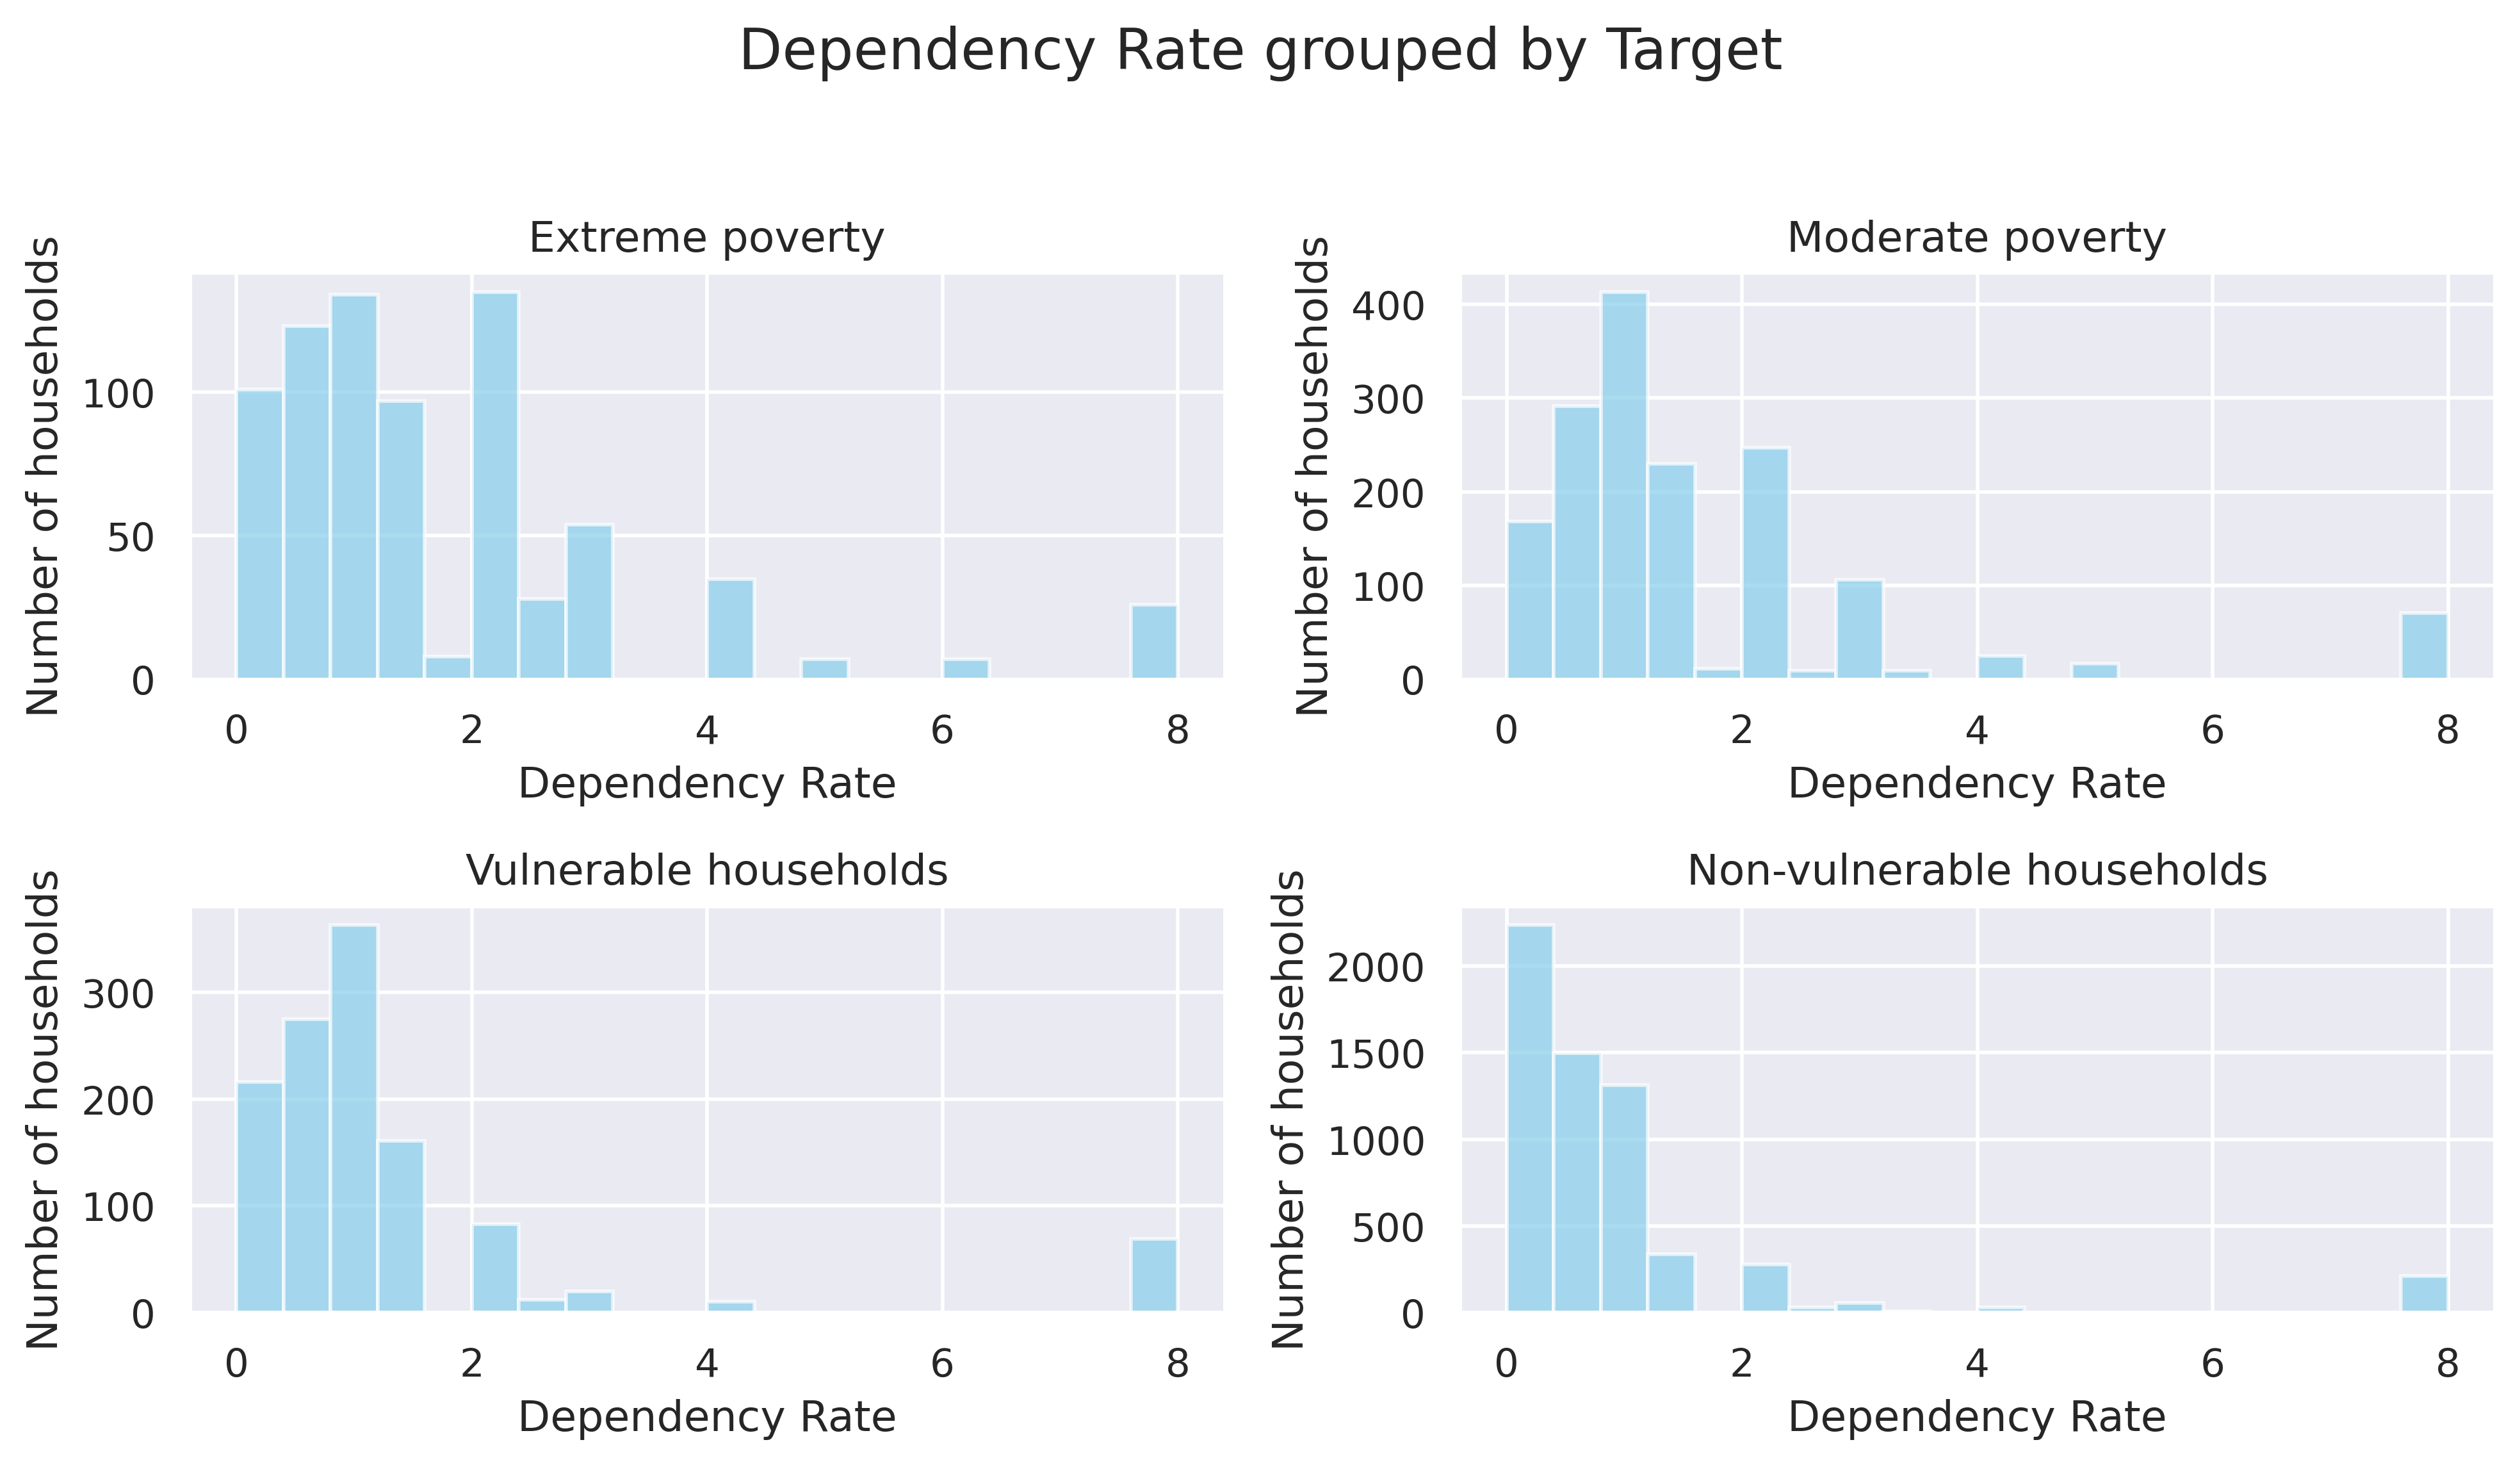

In [12]:
fig, axs = plt.subplots(2, 2, figsize=(10, 6))
labels = ['Extreme poverty', 'Moderate poverty', 'Vulnerable households', 'Non-vulnerable households']

for i, target in enumerate([1, 2, 3, 4]):
    ax = axs[i // 2, i % 2]
    ax.hist(train[train['Target'] == target]['dependency'], bins=20, color='skyblue', alpha=0.7)
    ax.set_title(labels[i])
    ax.set_xlabel('Dependency Rate')
    ax.set_ylabel('Number of households')

plt.suptitle('Dependency Rate grouped by Target', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  
plt.show()

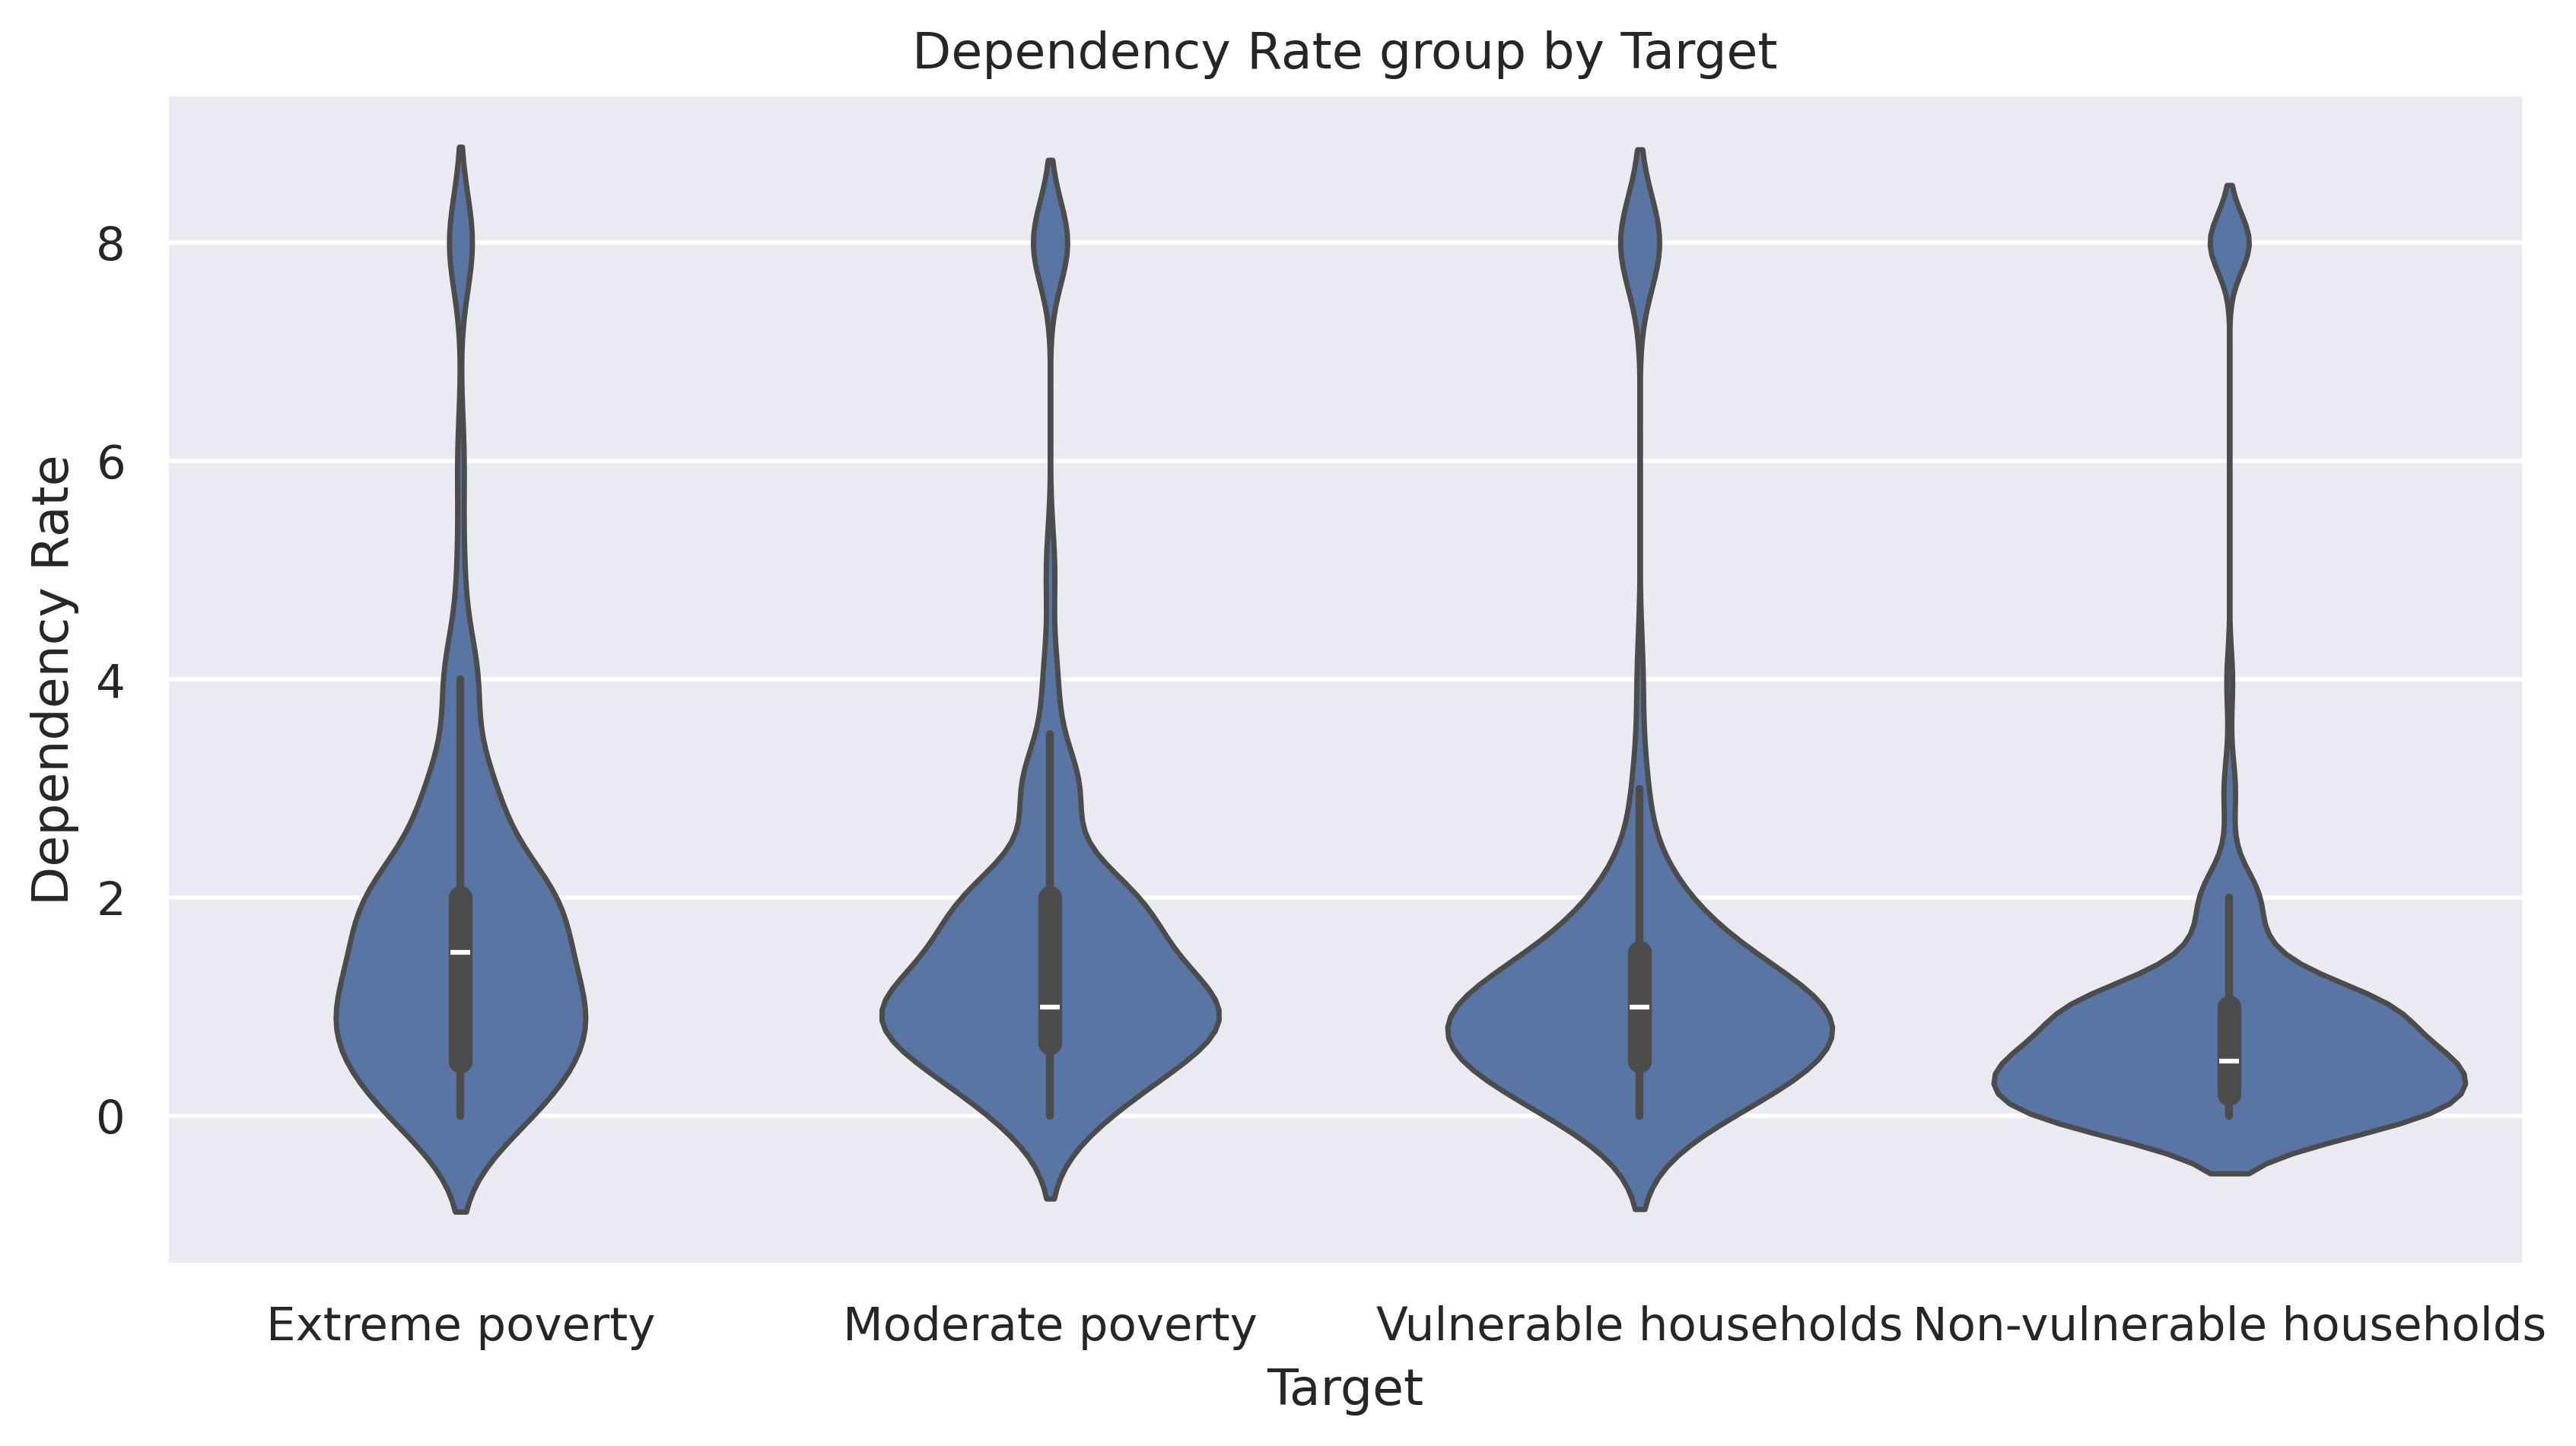

In [13]:
plt.figure(figsize=(10, 5))
labels = ['Extreme poverty', 'Moderate poverty', 'Vulnerable households', 'Non-vulnerable households']
sns.violinplot(x='Target', y='dependency', data=train)
plt.title('Dependency Rate group by Target')
plt.ylabel('Dependency Rate')
plt.xticks(ticks=[0, 1, 2, 3], labels=labels)
plt.show()

**Nhận xét:**
- Đối với các hộ gia đình thuộc mức độ nghèo cao nhất (Extreme poverty)
    + Tỉ lệ phụ thuộc có số lượng nhiều phân bố chủ yếu ở 2
    + Tỷ lệ phụ thuộc phân bố tập trung từ 0 - 1.5 và 2 - 3
- Đối với các hộ gia đình thuộc mức độ nghèo thấp hơn
    + Tỉ lệ phụ thuộc có số lượng nhiều phân bố chủ yếu ở 1
    + Tỷ lệ phụ thuộc phân bố tập trung từ 0 - 1.5 và 2 - 2.5
- Đối với các hộ gia đình thuộc Vulnerable households
    + Tỉ lệ phụ thuộc có số lượng nhiều phân bố chủ yếu ở 1.
    + Tỷ lệ phụ thuộc phân bố tập trung từ 0 - 1.5
- Đối với các hộ gia đình thuộc Non-vulnerable households
    + Tỉ lệ phụ thuộc có số lượng nhiều phân bố chủ yếu ở 0.
    + Tỷ lệ phụ thuộc phân bố tập trung từ 0 - 1
- Ta có thể thấy, tỉ lệ phụ thuộc có xu hướng giảm dần từ Extreme poverty đến Non-vulnerable households

## Độ tuổi của mọi người

### Phân bố chung

In [14]:
age_data = train[['age', 'Target']].copy()
age_data['bin_age'] = age_data['age']
age_data.loc[age_data['age'] <= 12, 'bin_age'] = '0 - 12 tuổi'
age_data.loc[(age_data['age'] > 12) & (age_data['age'] <= 18), 'bin_age'] = '13 - 18 tuổi'
age_data.loc[(age_data['age'] > 18) & (age_data['age'] < 65), 'bin_age'] = '19 - 64 tuổi'
age_data.loc[age_data['age'] >= 65, 'bin_age'] = '65+ tuổi'
age_data.sample(5)

age  Target       bin_age
3477   23       2  19 - 64 tuổi
5025   12       2   0 - 12 tuổi
4196   47       1  19 - 64 tuổi
6811   66       2      65+ tuổi
8546   21       4  19 - 64 tuổi

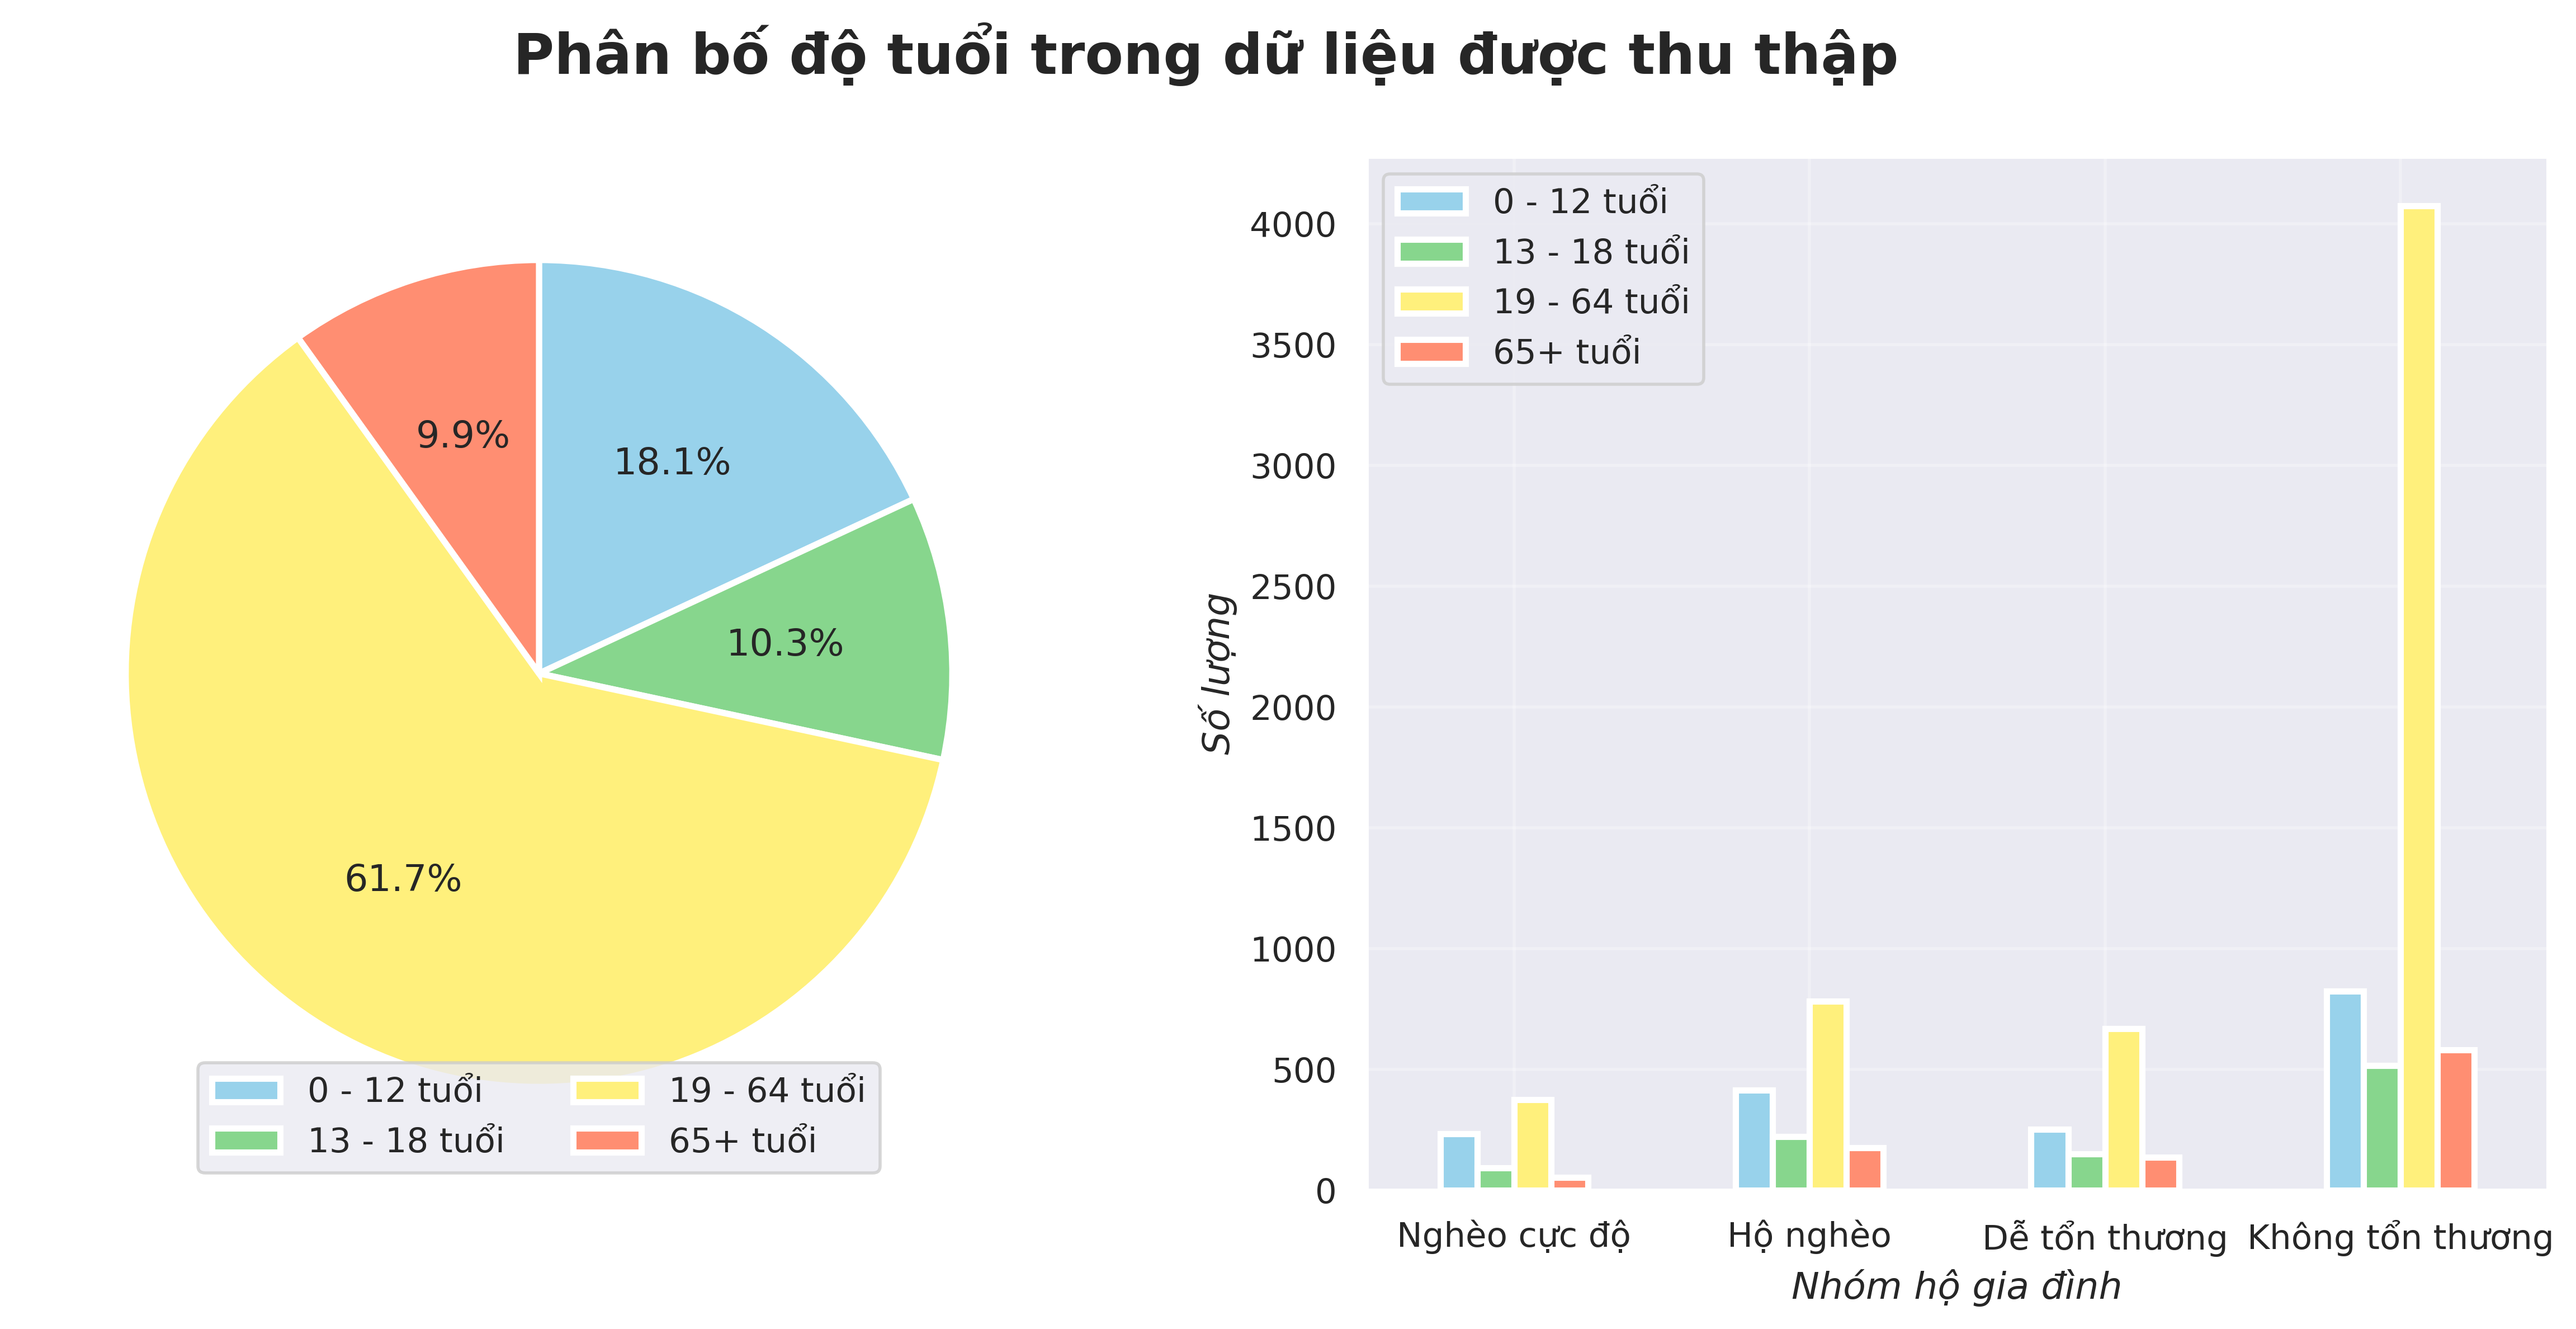

In [15]:
color_lst = ['#98d2eb', '#87D68D', '#fff07c', '#FF8E72']

# Plot the bar chart and pie chart in the same subplot for 'age' column
fig, (ax_pie, ax_bar) = plt.subplots(1, 2)

age_count = age_data[['Target', 'bin_age']].groupby(['Target', 'bin_age']).value_counts().sort_index().to_frame(name='value')
age_count = age_count.stack().unstack([-2,-1]).rename_axis((None, None), axis=1)
age_count.columns = age_count.columns.droplevel(1)
age_count.plot(kind='bar', ax=ax_bar, color=color_lst, edgecolor='white', linewidth=2);
ax_bar.set_xlabel('Nhóm hộ gia đình', style='italic'); ax_bar.set_xticklabels(['Nghèo cực độ', 'Hộ nghèo', 'Dễ tổn thương', 'Không tổn thương'], rotation=0);
ax_bar.set_ylabel('Số lượng', style='italic');
ax_bar.grid(alpha=0.3);

age_count = age_data['bin_age'].value_counts().sort_index().to_frame(name='value')
ax_pie.pie(age_count.value,
           labels=age_count.index, labeldistance=None,
           colors=color_lst,
           wedgeprops = {"edgecolor" : "white", 'linewidth': 2, 'antialiased': True},
           autopct='%1.1f%%', pctdistance=.6,
           startangle=90, counterclock=False);
ax_pie.legend(loc='lower center', ncol=2);

plt.suptitle('Phân bố độ tuổi trong dữ liệu được thu thập', weight='bold', fontsize=18);

**Nhận xét**:
- _Sự phân bố_: Đối tượng được thu thập phổ biến từ 19 đến 64 tuổi, hơn $60\%$, là đối tượng có nguồn thu nhập chính trong các hộ gia đình, cho thấy đối tượng này cần quan tâm để xem xét yếu tố hộ gia đình có cần sự trợ giúp từ chương trình viện trợ xã hội hay không. Phần còn lại phân bố đồng đều ở các độ tuổi khác nhau, giúp quan sát sự phụ thuộc kinh tế đối với nguồn thu nhập chính của các hộ gia đình.
- _Độ tuổi dưới 18_: Chiếm gần $30\%$ trong dữ liệu thu thập. Đây là độ tuổi mà trẻ em bắt đầu được tiếp cận với hệ thống giáo dục phổ thông. Trong đó, tỷ lệ trẻ em dưới 12 tuổi, độ tuổi mà trẻ em bắt đầu đi học tiểu học chiếm khoảng $18\%$, tỷ lệ trẻ em trên 12 tuổi, độ tuổi trẻ em bắt đầu hoàn thành chương trình giáo dục tiểu học và chuyển sang giáo dục trung học phổ thông chiếm khoảng $10\%$. Giữa 2 nhóm tuổi này không có sự chênh lệch quá lớn.
- _Độ tuổi trên 65_: Chiếm khoảng $10\%$ trong dữ liệu thu thập, bao gồm các đối tượng bị phụ thuộc vào nguồn thu nhập chính hoặc có thể tự chủ tài chính của họ. Vậy liệu có mối quan hệ giữa sự phụ thuộc và học vấn hay không?
- _Theo phân loại nhóm gia đình_: Độ tuổi từ 19 đến 64 tuổi chiếm số lượng lớn nhất trong mỗi nhóm, là đối tượng có nguồn thu nhập chính trong các hộ gia đình, cho thấy đối tượng này cần quan tâm để xem xét yếu tố hộ gia đình có cần sự trợ giúp từ chương trình viện trợ xã hội hay không.

### Độ tuổi dưới 18

#### Sự phổ cập giáo dục

In [16]:
columns = np.array([col for col in train.columns if 'instlevel' in col])
columns = np.append(columns, ['age', 'escolari' , 'rez_esc', 'Target'])
under_18 = train[train['age'] <= 18][columns].copy()
under_18.rez_esc = under_18.rez_esc.astype(int)
under_18.sample(5)

instlevel1  instlevel2  instlevel3  instlevel4  instlevel5  instlevel6  \
8166           1           0           0           0           0           0   
6689           1           0           0           0           0           0   
8259           0           1           0           0           0           0   
1383           0           0           0           1           0           0   
2576           0           0           1           0           0           0   

      instlevel7  instlevel8  instlevel9  age  escolari  rez_esc  Target  
8166           0           0           0    1         0        0       2  
6689           0           0           0    6         0        0       1  
8259           0           0           0   11         3        1       3  
1383           0           0           0   18         9        0       4  
2576           0           0           0   17         6        4       2

In [17]:
under_18_statistical = under_18[['instlevel1', 'instlevel2', 'instlevel3', 'instlevel4', 'instlevel5', 'instlevel6', 'instlevel7', 'age']].copy()
under_18_statistical = under_18_statistical.groupby('age').sum()
under_18_statistical['Tiểu học'] = under_18_statistical['instlevel2'] + under_18_statistical['instlevel3']
under_18_statistical['Trung học phổ thông'] = under_18_statistical['instlevel4'] + under_18_statistical['instlevel5']
under_18_statistical['Trung học kỹ thuật'] = under_18_statistical['instlevel6'] + under_18_statistical['instlevel7']

under_18_statistical.rename(columns={'instlevel1': 'Không trình độ học vấn'}, inplace=True)
under_18_statistical = under_18_statistical.drop(['instlevel2', 'instlevel3', 'instlevel4', 'instlevel5', 'instlevel6', 'instlevel7'], axis=1)
under_18_statistical['Tổng cộng'] = under_18_statistical.sum(axis=1)

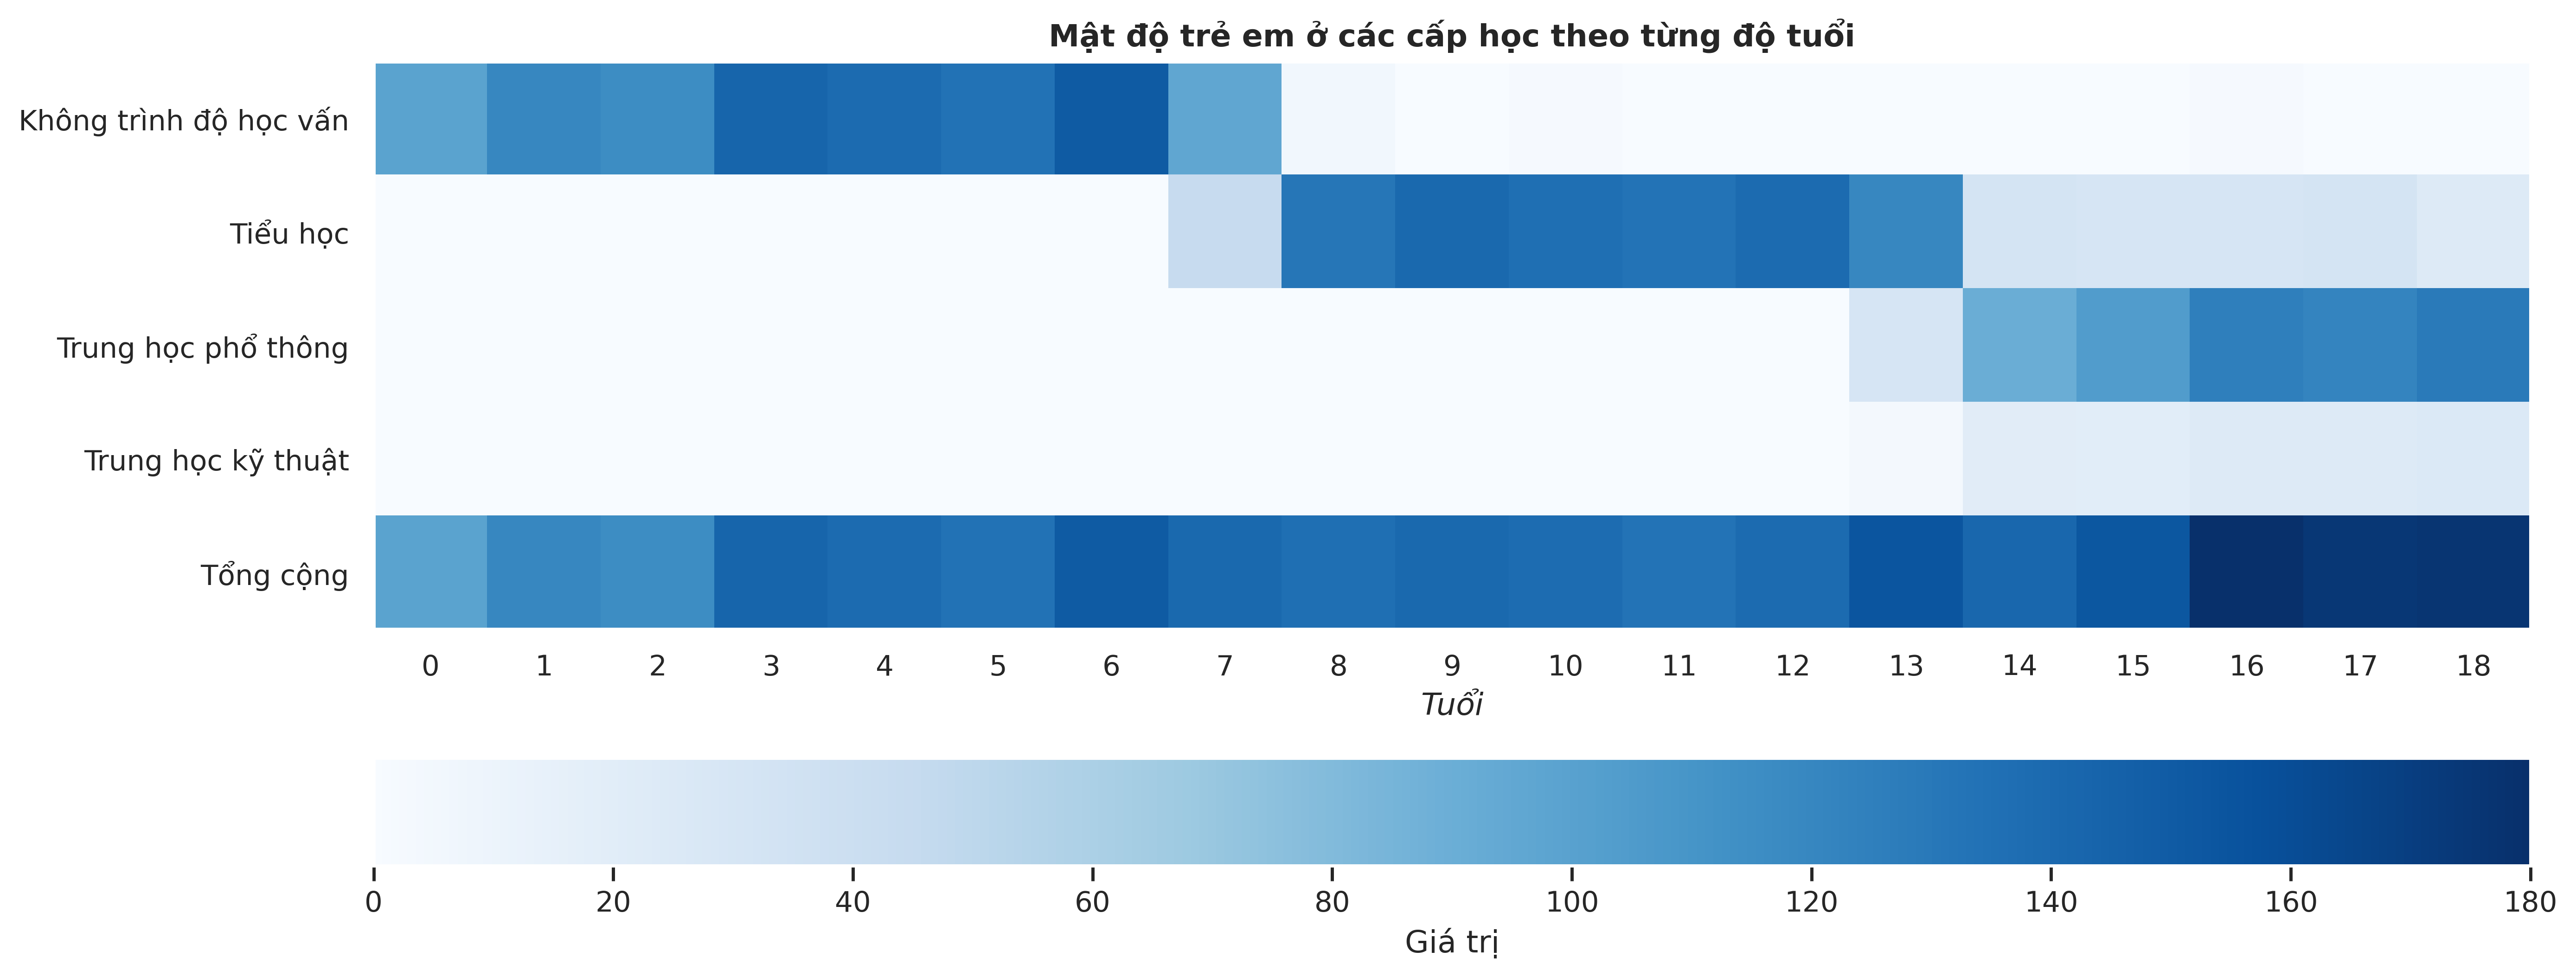

In [18]:
# Plot heatmap for under_18_statistical
plt.imshow(under_18_statistical.T, cmap='Blues')
plt.colorbar(orientation='horizontal', label='Giá trị');
plt.xticks(np.arange(len(under_18_statistical.index)), under_18_statistical.index);
plt.xlabel('Tuổi', style='italic');
plt.grid(False)
plt.yticks(np.arange(len(under_18_statistical.columns)), under_18_statistical.columns);
plt.title('Mật độ trẻ em ở các cấp học theo từng độ tuổi', fontdict={'weight':'bold'});

**Nhận xét**:
- Từ biểu đồ ta thấy số lượng trẻ em đa số được phân bố đồng đều ở mỗi độ tuổi.
- Mỗi trình độ học vấn nằm trong một khoảng độ tuổi nhất định:
    + **_Không trình độ học vấn_**: Nằm trong khoảng từ 0 đến 6 tuổi, độ tuổi này trẻ em có thể tự chọn giáo dục mầm non (không bắt buộc) hoặc ở nhà. Ngoài ra, còn một số trẻ trên 7 tuổi vẫn chưa được đi học, đây có thể là các hộ gia đình gặp khó khăn về kinh tế hoặc chưa có hiểu biết về giáo dục.
    + **_Tiểu học_**: Đa số phân bố trong khoảng từ 7 đến 13 tuổi, ngoài ra một số ít phân bố ở độ tuổi 6 hoặc lớn hơn 13. Điều này cho thấy rằng độ tuổi bắt đầu đến trường của trẻ em Costa Rica là 6, tuy nhiên lại không quá phổ biến ở độ tuổi này, suy ra phần lớn đối tượng được thu thập dữ liệu ở Costa Rica bắt đầu học tiểu học bị muộn hơn so với quy định. Bên cạnh đó, từ biểu đồ có thể thấy gần về độ tuổi 18 vẫn còn một số ít trẻ em chưa hoàn thành giáo dục tiểu học, cho thấy có thể tồn tại việc bỏ học xảy ra ở trẻ em Costa Rica.
    + **_Trung học_**: Vì ảnh hưởng của độ tuổi bắt đầu đi học trễ hơn nên ta thấy phân bố của cấp học này chủ yếu từ 14 tuổi trở đi, và một số ít phân bố ở độ tuổi 13. Bên cạnh đó, thông tin thú vị ta có thể thấy, trẻ em Costa Rica khi bước vào cấp học trung học (trên 12 tuổi - thông tin nhóm tìm hiểu về giáo dục Costa Rica) có 2 sự lựa chọn: trung học phổ thông hoặc trường nghề. Phần lớn trẻ em ở Costa Rica lựa chọn trung học phổ thông, chỉ số ít trẻ em lựa chọn trường nghề.
- Từ biểu đồ, ta thấy càng cấp học cao, độ tuổi trẻ em càng lớn.

#### Sự tiếp cận giáo dục trễ

In [19]:
delayed_enrollment = under_18.loc[under_18['age'] > 6, ['age', 'rez_esc']].copy()
delayed_enrollment.loc[delayed_enrollment['rez_esc'] > 0, 'rez_esc'] = 1
delayed_enrollment = delayed_enrollment.groupby('age').sum()

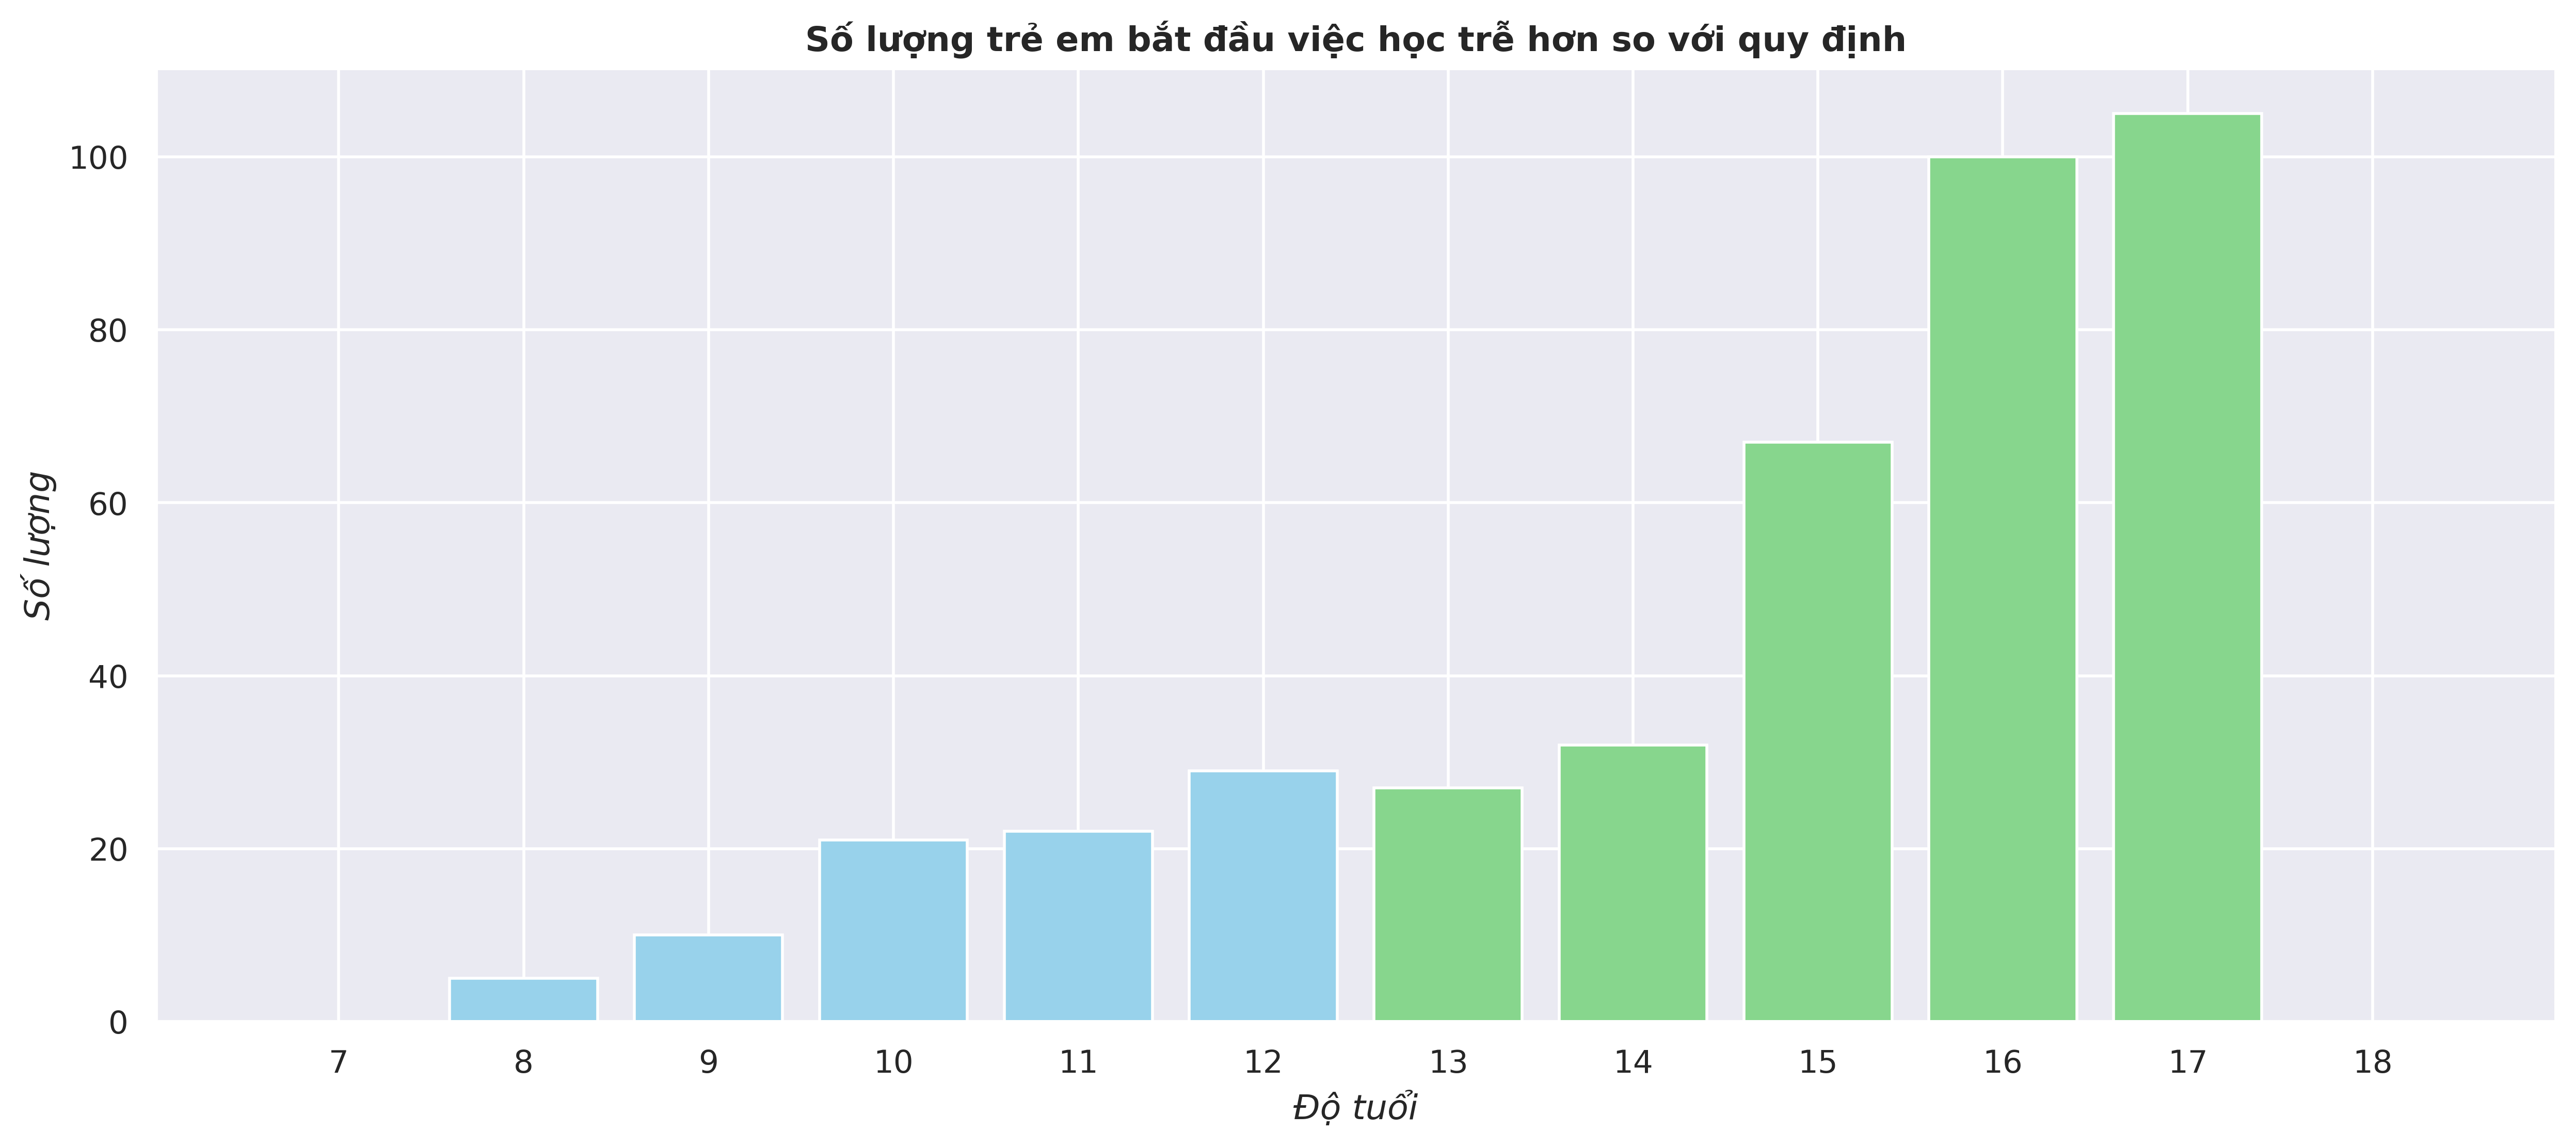

In [20]:
color_lst = ['#98d2eb', '#98d2eb', '#98d2eb', '#98d2eb', '#98d2eb', '#98d2eb',
             '#87D68D', '#87D68D', '#87D68D', '#87D68D', '#87D68D', '#87D68D',]
plt.bar(delayed_enrollment.index, delayed_enrollment.rez_esc, color=color_lst)
plt.xlabel('Độ tuổi', style='italic')
plt.xticks(delayed_enrollment.index)
plt.ylabel('Số lượng', style='italic')
plt.title('Số lượng trẻ em bắt đầu việc học trễ hơn so với quy định', fontdict={'weight':'bold'});

**Nhận xét**:
- Từ biểu đồ ta thấy độ tuổi càng lớn, càng có nhiều trẻ em bắt đầu tiếp cận giáo dục trễ hơn so với thông thường. Điều này cho thấy rằng các hộ gia đình gần đây có xu hướng cho trẻ em tiếp cận giáo dục đúng độ tuổi quy định.
- Kết hợp quan sát biểu đồ trước đó, ta thấy trẻ em ở độ tuổi 18 mà vẫn đang ở cấp Tiểu học hầu hết đều đã bỏ học.

#### Sự chưa được tiếp cận giáo dục

In [21]:
non_enrollment = under_18.loc[under_18['age'] > 6, ['age', 'escolari']].copy()
non_enrollment.loc[non_enrollment['escolari'] == 0, 'escolari'] = -1
non_enrollment.loc[non_enrollment['escolari'] > 0, 'escolari'] = 0
non_enrollment['escolari'] *= -1
non_enrollment = non_enrollment.groupby('age').sum()

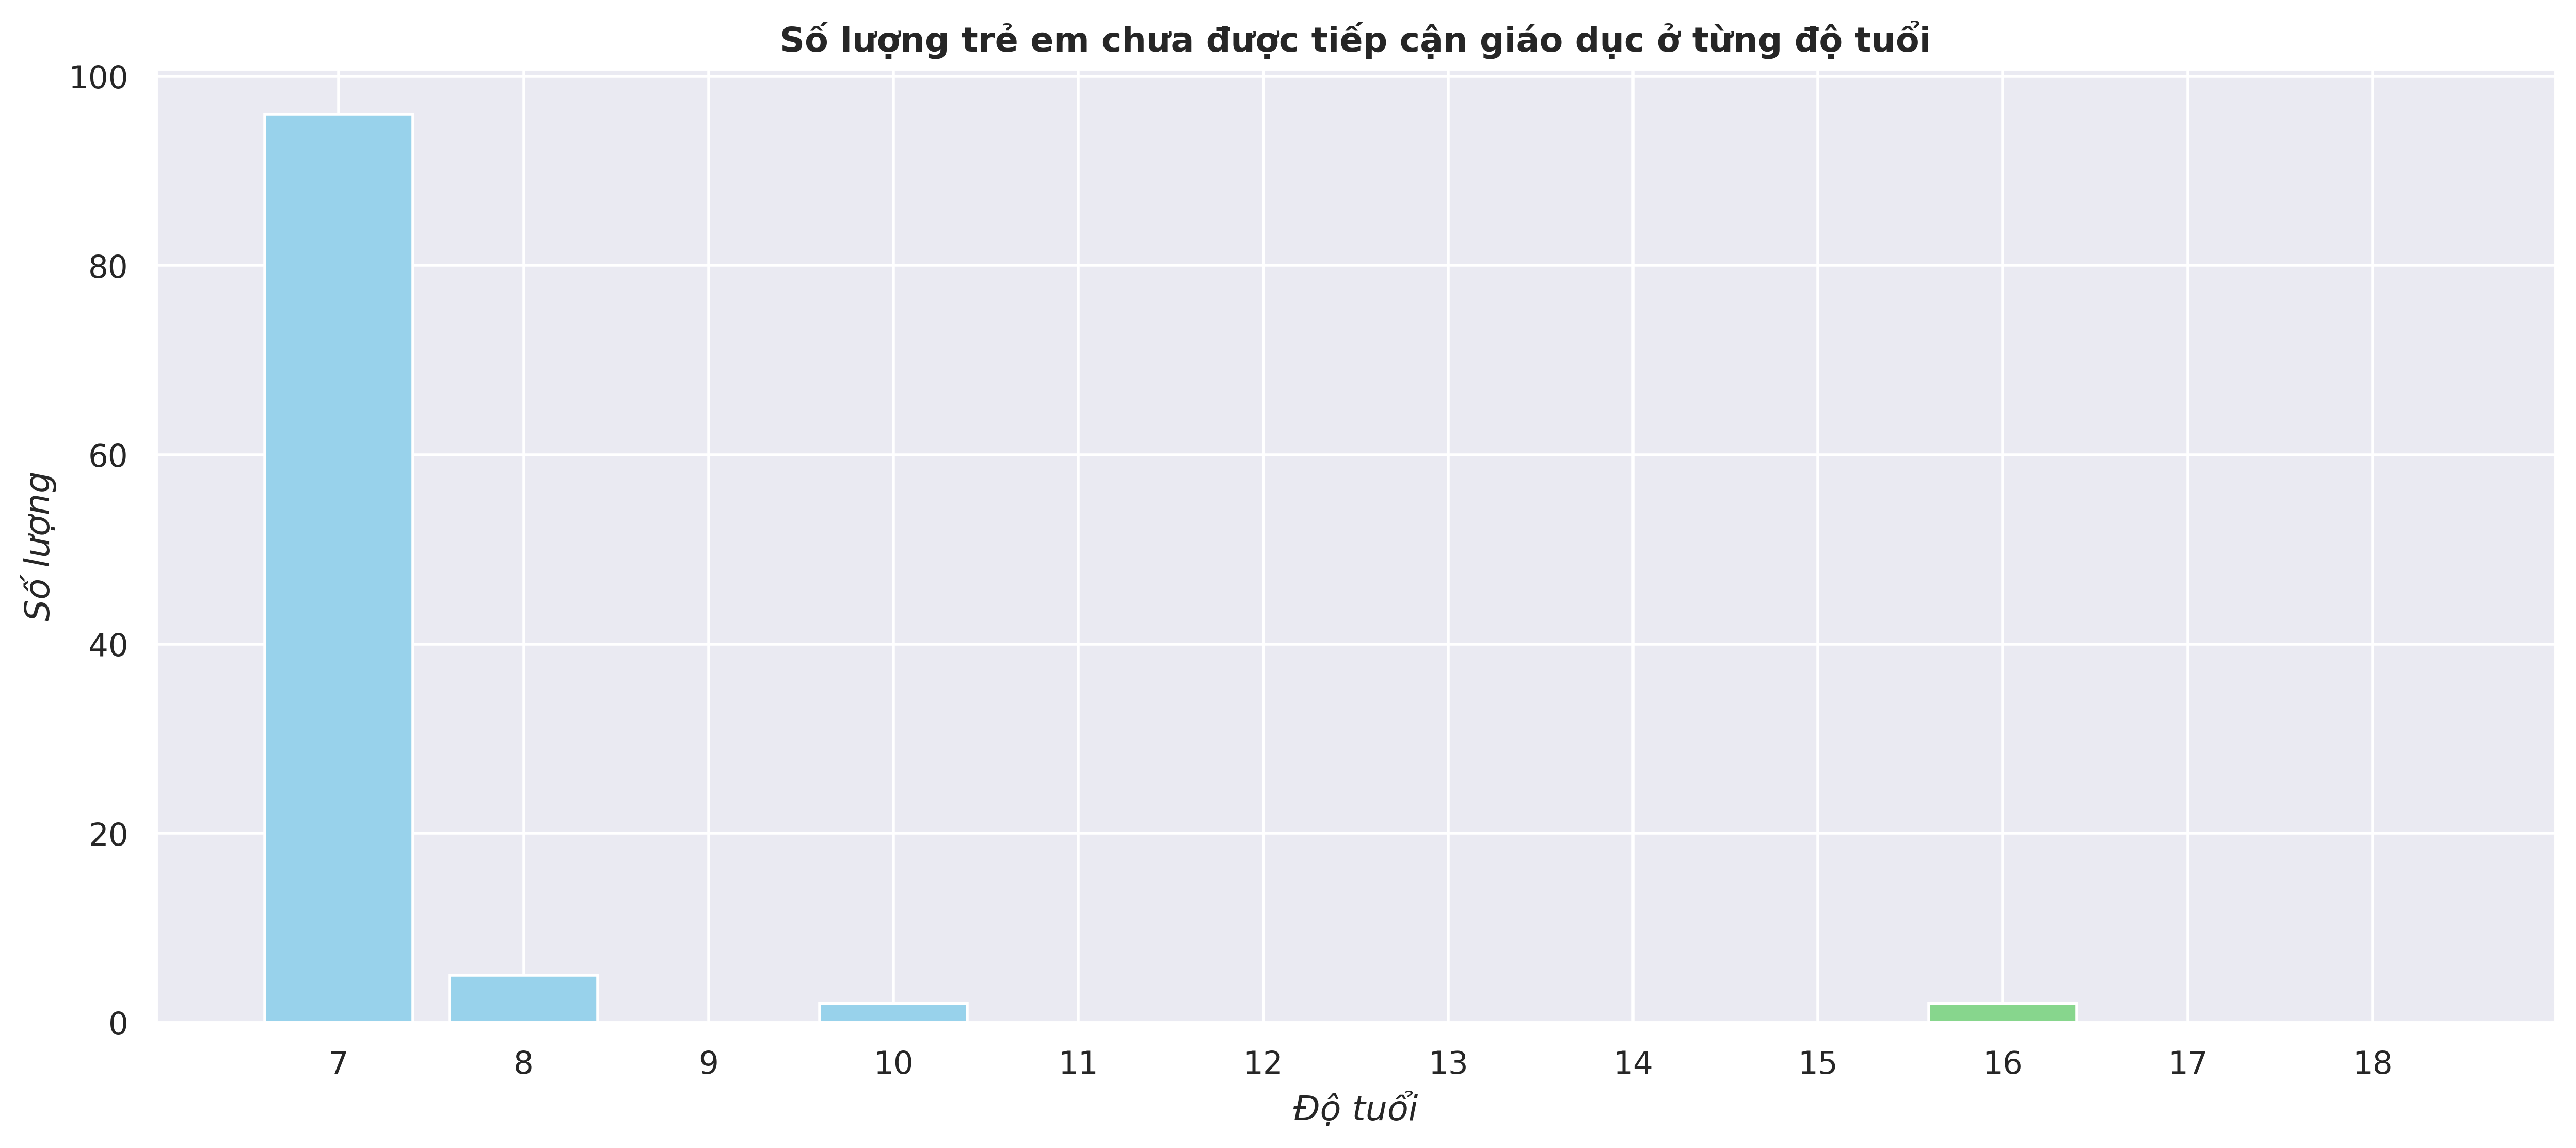

In [22]:
# Plot bar chart for non_enrollment
plt.bar(non_enrollment.index, non_enrollment.escolari, color=color_lst)
plt.xlabel('Độ tuổi', style='italic')
plt.xticks(non_enrollment.index)
plt.ylabel('Số lượng', style='italic')
plt.title('Số lượng trẻ em chưa được tiếp cận giáo dục ở từng độ tuổi', fontdict={'weight':'bold'});

**Nhận xét**:
- Từ biểu đồ ta thấy phần lớn trẻ em chưa được tiếp cận giáo dục phổ biến ở độ tuổi 7, 8. Một số ít trẻ em độ tuổi 10 và 16 cũng chưa được tiếp cận giáo dục.
- Ngoài ra, xu hướng số lượng giảm khi độ tuổi tăng, đây có thể là coi là một điều tích cực.

### Độ tuổi trên 18

In [23]:
columns = np.array(['age', 'instlevel8', 'instlevel9', 'meaneduc', 'Target'])
over_18 = train.loc[train['age'] > 18, columns].copy()

over_18['bin_age'] = over_18['age']
over_18.loc[age_data['age'] < 65, 'bin_age'] = 'Dưới 65 tuổi'
over_18.loc[over_18['age'] >= 65, 'bin_age'] = 'Trên 65 tuổi'

over_18['Target'] = over_18['Target'].astype(int)
over_18.sample(5)

age  instlevel8  instlevel9  meaneduc  Target       bin_age
9387   31           0           0       8.0       4  Dưới 65 tuổi
5214   45           0           0       7.0       4  Dưới 65 tuổi
1810   39           0           0      11.0       3  Dưới 65 tuổi
4776   23           1           0      14.0       4  Dưới 65 tuổi
8264   20           0           0       5.0       2  Dưới 65 tuổi

#### Số năm đi học trung bình 

In [24]:
average_schooling = over_18[['age', 'meaneduc', 'bin_age', 'Target']].copy()
average_schooling.sample(5)

age   meaneduc       bin_age  Target
6396   19  17.500000  Dưới 65 tuổi       4
2671   29   7.500000  Dưới 65 tuổi       2
1722   34   7.666666  Dưới 65 tuổi       1
952    53  15.000000  Dưới 65 tuổi       4
8543   37   3.500000  Dưới 65 tuổi       4

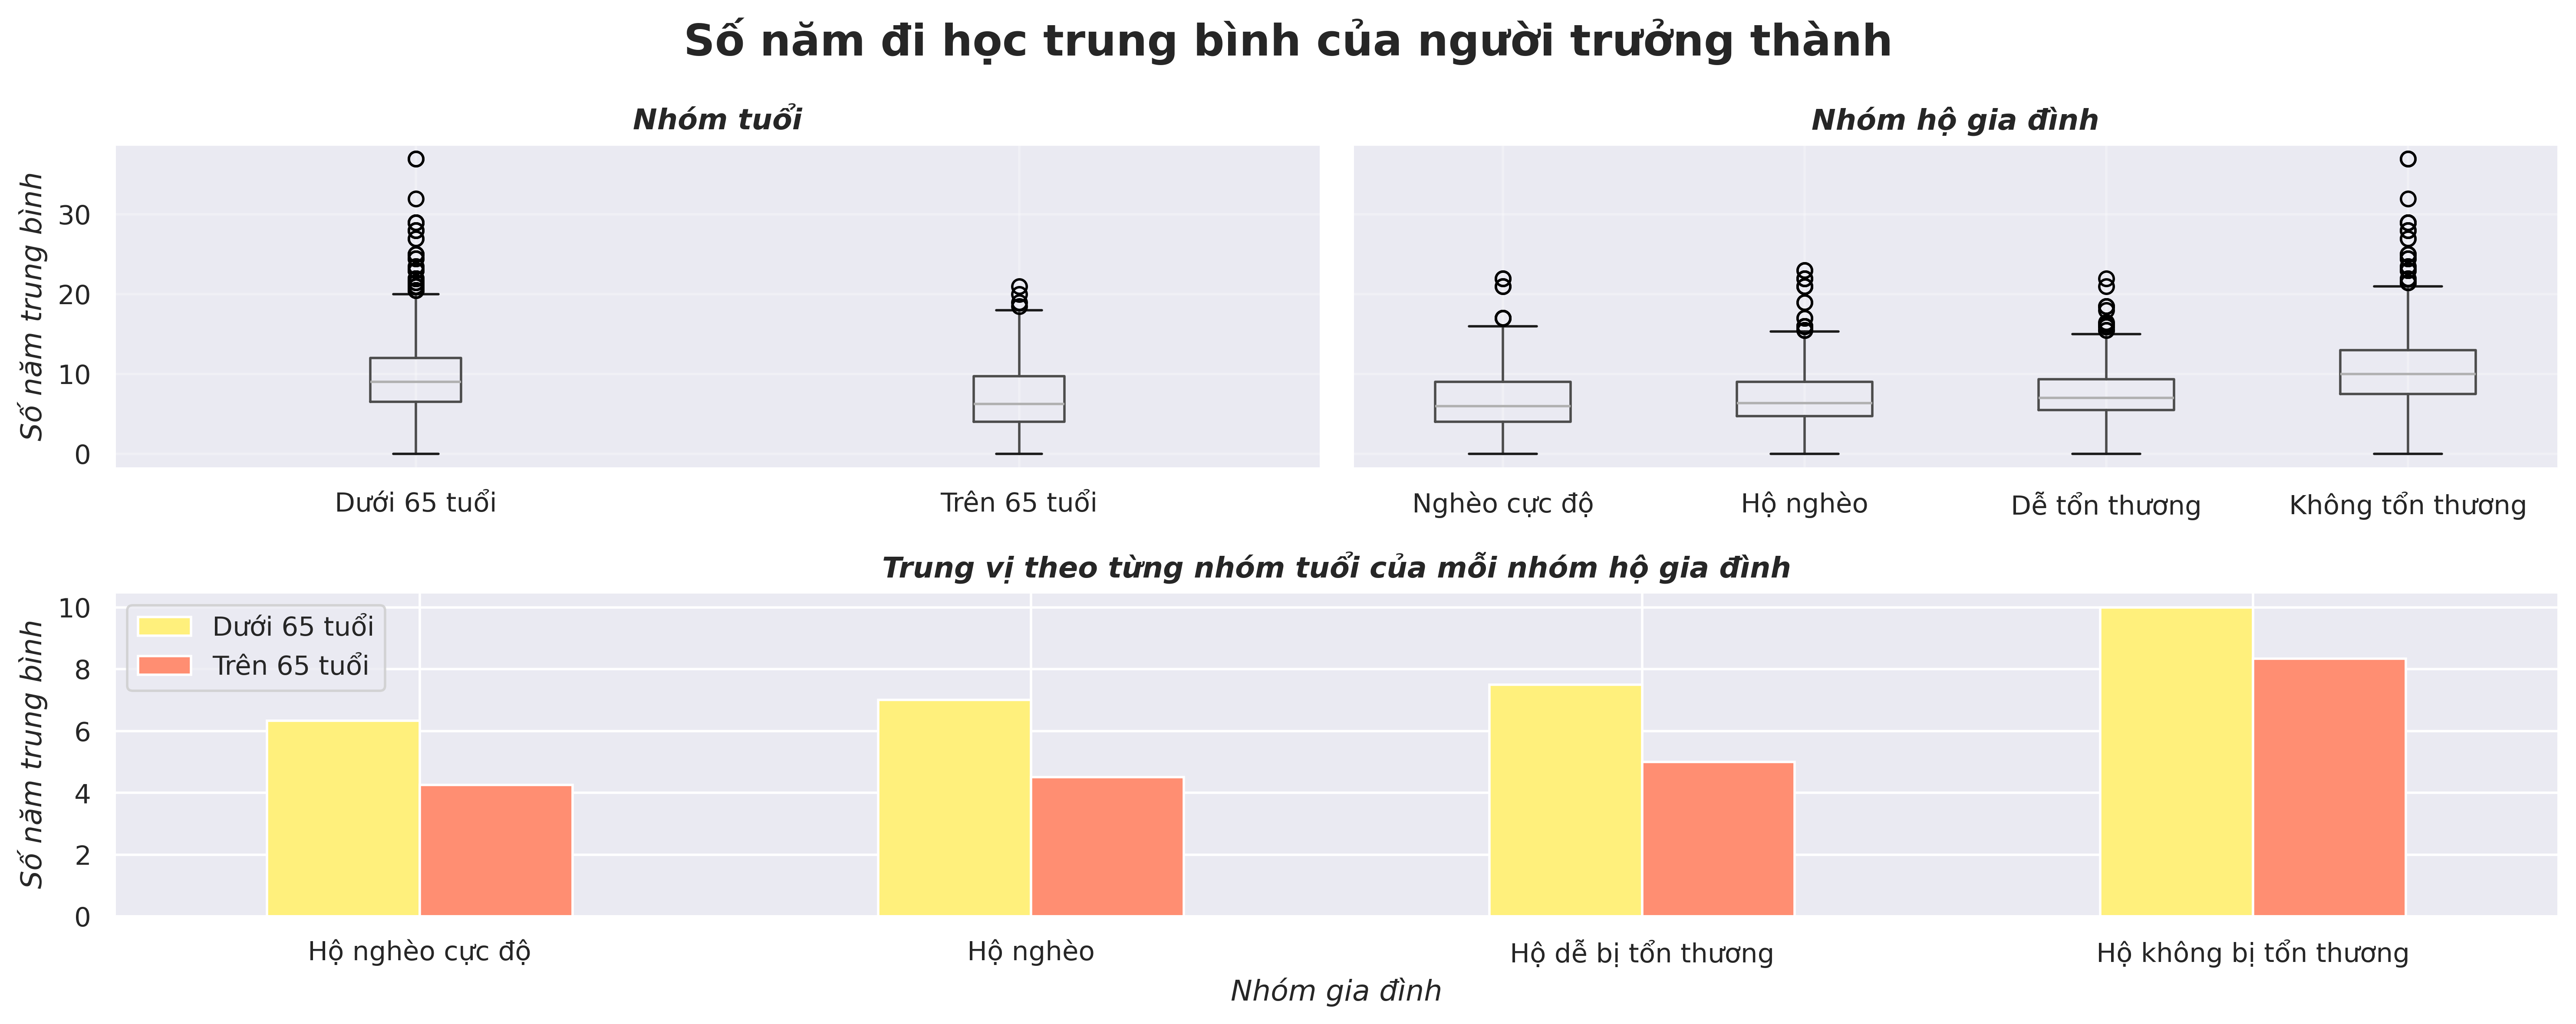

In [25]:
# Plot bar chart for 'meaneduc' with 'bin_age' and 'Target' of average_schooling
fig = plt.figure()

gs = fig.add_gridspec(2,2)
ax_left = fig.add_subplot(gs[0, 0])
ax_right = fig.add_subplot(gs[0, 1], sharey=ax_left)
ax_bottom = fig.add_subplot(gs[1, :])

# Box plot
average_schooling.boxplot(by='bin_age', column='meaneduc', ax=ax_left, grid=True);
average_schooling.boxplot(by='Target', column='meaneduc', ax=ax_right, grid=True);

plt.suptitle('Số năm đi học trung bình của người trưởng thành', weight='bold', fontsize=18);
ax_left.set_title('Nhóm tuổi',  fontdict={'weight':'bold', 'style':'italic', 'fontsize':12});
ax_right.set_title('Nhóm hộ gia đình',  fontdict={'weight':'bold', 'style':'italic', 'fontsize':12});

ax_left.set_xlabel('');
ax_right.set_xlabel('');
ax_right.set_xticklabels(['Nghèo cực độ', 'Hộ nghèo', 'Dễ tổn thương', 'Không tổn thương'], rotation=0);
ax_left.set_ylabel('Số năm trung bình', style='italic');

ax_left.grid(alpha=0.3);
ax_right.grid(alpha=0.3);

# Bar chart
group_schooling = average_schooling[['Target', 'bin_age', 'meaneduc']].groupby(['Target', 'bin_age']).median()
group_schooling = group_schooling.stack().unstack([-2,-1]).rename_axis((None, None), axis=1)
group_schooling.columns = group_schooling.columns.droplevel(1)

group_schooling.plot(kind='bar', ax=ax_bottom, color=['#fff07c', '#FF8E72']);
ax_bottom.set_xlabel('Nhóm gia đình', style='italic');
ax_bottom.set_xticklabels(['Hộ nghèo cực độ', 'Hộ nghèo', 'Hộ dễ bị tổn thương', 'Hộ không bị tổn thương'], rotation=0);
ax_bottom.set_ylabel('Số năm trung bình', style='italic');
ax_bottom.set_title('Trung vị theo từng nhóm tuổi của mỗi nhóm hộ gia đình',  fontdict={'weight':'bold', 'style':'italic', 'fontsize':12});

plt.tight_layout();

**Nhận xét**:
- Từ biểu đồ ta thấy số năm đi học trung bình của từng hộ gia đình đa số từ 0 đến 20 năm.
- Theo _nhóm tuổi_:
    + Số năm trung bình có xu hướng giảm khi tuổi càng lớn.
    + Số điểm giá trị ngoại lai của số năm đi học trung bình của nhóm dưới 65 tuổi có tần suất nhiều hơn so với nhóm trên 65 tuổi, giá trị ngoại lai cao nhất của số năm đi học trung bình của nhóm dưới 65 tuổi cao hơn nhiều so với nhóm trên 65 tuổi.</br>
    $\Longrightarrow$ Người trẻ ở Costa Rica có sự quan tâm và đầu tư cho học vấn của bản thân.
- Theo _nhóm hộ gia đình_: Theo chiều của mức độ phân loại nhóm gia đình (từ Nghèo cực độ đến Không bị tổn thương):
    + Số năm trung bình có xu hướng tăng.
    + Giá trị ngoại lai cao nhất của mỗi nhóm có xu hướng tăng.
- Quan sát chi tiết trên giá trị trung vị: Theo chiều của mức độ phân loại nhóm gia đình (từ Nghèo cực độ đến Không bị tổn thương):
    + Ở bất kỳ nhóm tuổi nào, trung vị của số năm đi học trung bình đều có xu hướng tăng. Cho thấy gia đình có điều kiện kinh tế ổn định có sự đầu tư về học vấn của họ.
    + Tuy nhiên, quan sát giá trị trung vị cho thấy các nhóm không có điều kiện kinh tế có trung vị khá thấp, xấp xỉ với số năm để hoàn thành bậc tiểu học mà ta đã quan sát từ biểu đồ trước. Vì vậy đây có thể là yếu tố để xem xét đánh giá mức độ cần sự hỗ trợ cho các hộ gia đình trong tương lai.

**Giải thích**: Lý do sử dụng giá trị trung vị để so sánh số năm đi học giữa các nhóm:
- Tỷ lệ phân bố/trọng số/kích thước giữa các đối tượng/nhóm đối tượng có sự chênh lệch rõ ràng.
- Median/Mean là phương pháp phù hợp hỗ trợ so sánh giữa các đối tượng/nhóm đối tượng có sự chênh lệch về kích thước cỡ mẫu.

#### Lựa chọn tiếp tục việc học Đại học và cao hơn 

In [26]:
uni_and_grad = over_18[['bin_age', 'instlevel8', 'instlevel9', 'Target']].copy()
uni_and_grad['has_uni_grad'] = uni_and_grad['instlevel8'] + uni_and_grad['instlevel9']
uni_and_grad.loc[uni_and_grad['has_uni_grad'] > 0, 'has_uni_grad'] = 1
uni_and_grad.drop(columns=['instlevel8', 'instlevel9'], inplace=True)
uni_and_grad.sample(5)

bin_age  Target  has_uni_grad
792   Dưới 65 tuổi       4             1
6162  Dưới 65 tuổi       3             0
6485  Dưới 65 tuổi       2             0
6950  Dưới 65 tuổi       4             0
1314  Dưới 65 tuổi       4             0

In [27]:
sum_by_age = uni_and_grad[['bin_age', 'has_uni_grad']].groupby(['bin_age']).sum()
sum_by_target = uni_and_grad[['Target', 'has_uni_grad']].groupby(['Target']).sum()
sum_group = uni_and_grad.groupby(['Target', 'bin_age']).sum()
sum_group = sum_group.stack().unstack([-2,-1]).rename_axis((None, None), axis=1)
sum_group.columns = sum_group.columns.droplevel(1)
sum_group_pie = sum_group.T

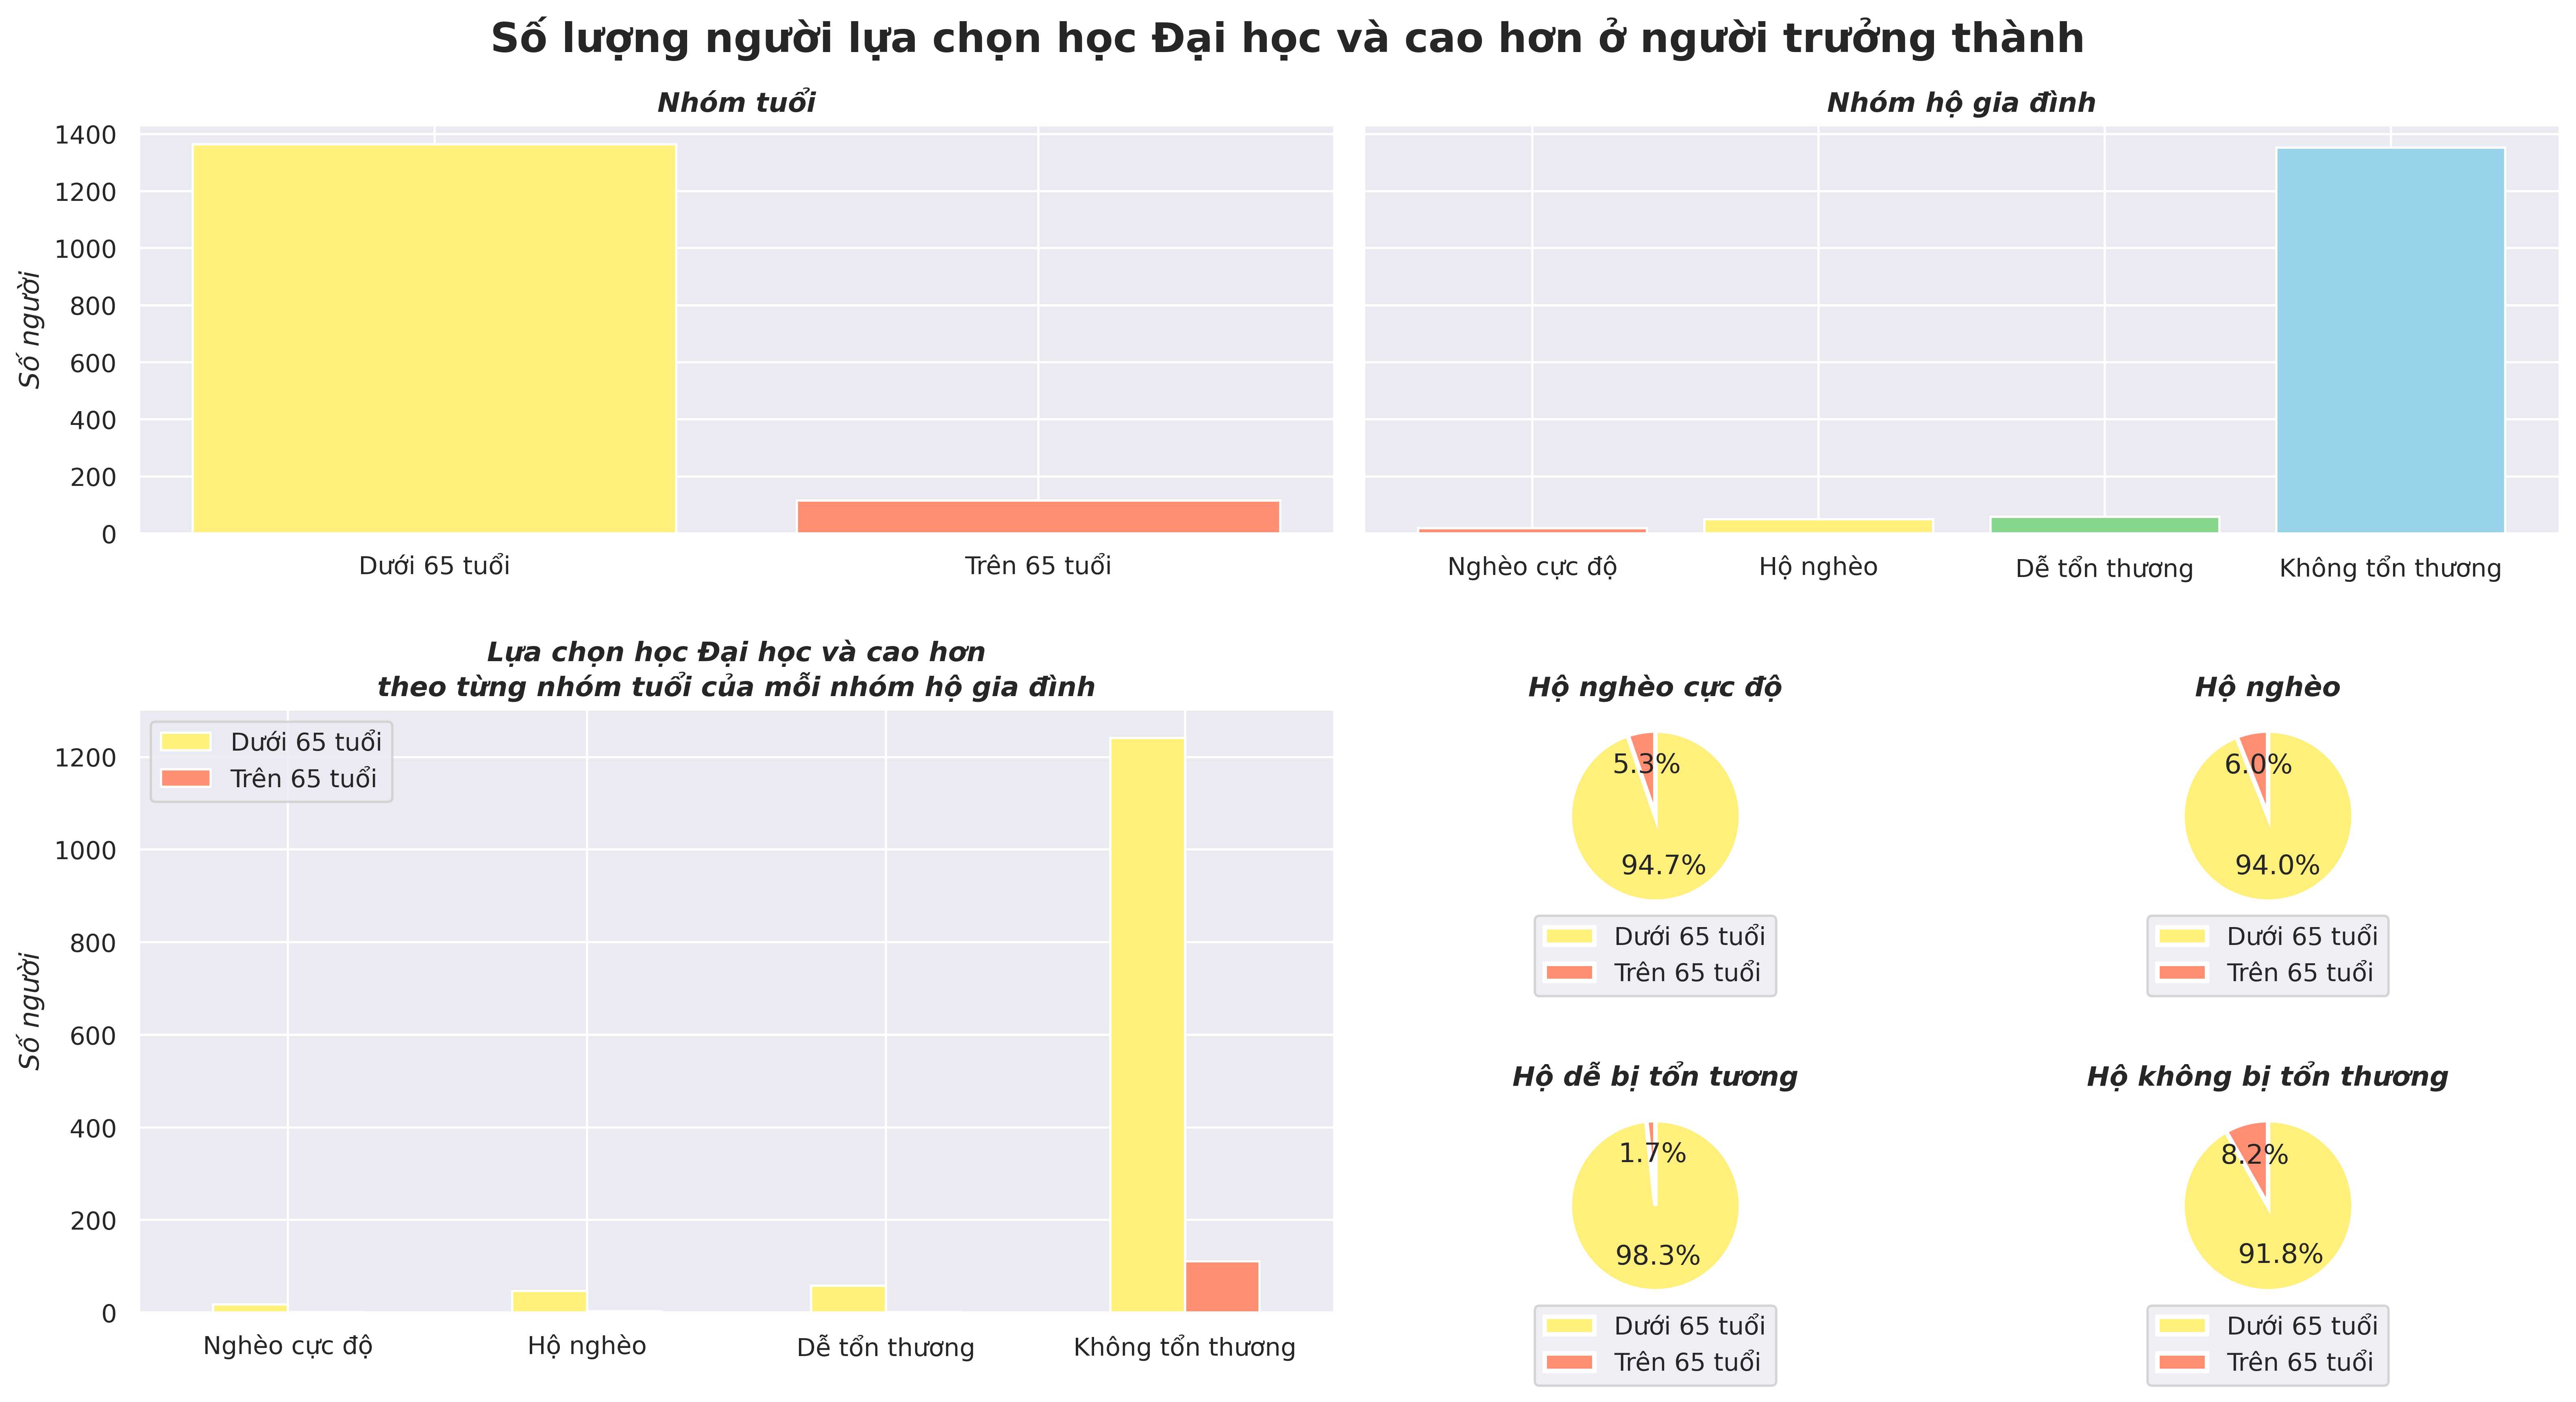

In [28]:
# Plot bar chart for 'meaneduc' with 'bin_age' and 'Target' of average_schooling
fig = plt.figure(figsize=(16,9))

gs = fig.add_gridspec(7,4)
ax_left = fig.add_subplot(gs[:3, 0:2])
ax_right = fig.add_subplot(gs[:3, 2:4], sharey=ax_left)
ax_pie = fig.add_subplot(gs[3:, :2])
ax_pie_1 = fig.add_subplot(gs[3:5, 2])
ax_pie_2 = fig.add_subplot(gs[3:5, 3])
ax_pie_3 = fig.add_subplot(gs[5:, 2])
ax_pie_4 = fig.add_subplot(gs[5:, 3])

# Box plot
plt.suptitle('Số lượng người lựa chọn học Đại học và cao hơn ở người trưởng thành', weight='bold', fontsize=18);
ax_left.set_title('Nhóm tuổi',  fontdict={'weight':'bold', 'style':'italic', 'fontsize':12});
ax_right.set_title('Nhóm hộ gia đình',  fontdict={'weight':'bold', 'style':'italic', 'fontsize':12});

color_lst = ['#fff07c', '#FF8E72']
ax_left.bar(sum_by_age.index, sum_by_age.has_uni_grad, color=color_lst);
color_lst = ['#FF8E72', '#fff07c', '#87D68D', '#98d2eb']
ax_right.bar(sum_by_target.index, sum_by_target.has_uni_grad, color=color_lst);

ax_right.set_xticks([1, 2, 3, 4]);
ax_right.set_xticklabels(['Nghèo cực độ', 'Hộ nghèo', 'Dễ tổn thương', 'Không tổn thương'], rotation=0);
ax_left.set_ylabel('Số người', style='italic');

color_lst = ['#fff07c', '#FF8E72']
ax_pie_1.pie(sum_group_pie[1],
            labels=sum_group_pie.index, labeldistance=None,
            colors=color_lst,
            wedgeprops = {"edgecolor" : "white", 'linewidth': 2, 'antialiased': True},
            autopct='%1.1f%%', pctdistance=.6,
            startangle=90, counterclock=False);
ax_pie_1.legend(loc='lower center', ncol=1, bbox_to_anchor=(0.5, -0.4));
ax_pie_1.set_title('Hộ nghèo cực độ',  fontdict={'weight':'bold', 'style':'italic', 'fontsize':12});

ax_pie_2.pie(sum_group_pie[2],
            labels=sum_group_pie.index, labeldistance=None,
            colors=color_lst,
            wedgeprops = {"edgecolor" : "white", 'linewidth': 2, 'antialiased': True},
            autopct='%1.1f%%', pctdistance=.6,
            startangle=90, counterclock=False);
ax_pie_2.legend(loc='lower center', ncol=1, bbox_to_anchor=(0.5, -0.4));
ax_pie_2.set_title('Hộ nghèo',  fontdict={'weight':'bold', 'style':'italic', 'fontsize':12});

ax_pie_3.pie(sum_group_pie[3],
            labels=sum_group_pie.index, labeldistance=None,
            colors=color_lst,
            wedgeprops = {"edgecolor" : "white", 'linewidth': 2, 'antialiased': True},
            autopct='%1.1f%%', pctdistance=.6,
            startangle=90, counterclock=False);
ax_pie_3.legend(loc='lower center', ncol=1, bbox_to_anchor=(0.5, -0.4));
ax_pie_3.set_title('Hộ dễ bị tổn tương',  fontdict={'weight':'bold', 'style':'italic', 'fontsize':12});

ax_pie_4.pie(sum_group_pie[4],
            labels=sum_group_pie.index, labeldistance=None,
            colors=color_lst,
            wedgeprops = {"edgecolor" : "white", 'linewidth': 2, 'antialiased': True},
            autopct='%1.1f%%', pctdistance=.6,
            startangle=90, counterclock=False);
ax_pie_4.legend(loc='lower center', ncol=1, bbox_to_anchor=(0.5, -0.4));
ax_pie_4.set_title('Hộ không bị tổn thương',  fontdict={'weight':'bold', 'style':'italic', 'fontsize':12});

sum_group.plot(kind='bar', ax=ax_pie, color=['#fff07c', '#FF8E72']);
ax_pie.set_xlabel('');
ax_pie.set_xticklabels(['Nghèo cực độ', 'Hộ nghèo', 'Dễ tổn thương', 'Không tổn thương'], rotation=0);
ax_pie.set_ylabel('Số người', style='italic');
ax_pie.set_title('Lựa chọn học Đại học và cao hơn\ntheo từng nhóm tuổi của mỗi nhóm hộ gia đình',  fontdict={'weight':'bold', 'style':'italic', 'fontsize':12});

plt.tight_layout();

**Nhận xét**:
- Từ biểu đồ ta thấy người dưới 65 tuổi chiếm tỷ lệ rất lớn (trên $90\%$) dù cho quan sát trên tổng thể hay từng nhóm hộ gia đình. Cho thấy đa số người trẻ ở Costa Rica chú trọng việc học Đại học hơn những người cao tuổi.
- Xu hướng số người lựa chọn tăng theo chiều điều kiện kinh tế các hộ gia đình tăng. Quan sát biểu đồ ta thấy phần lớn ảnh hưởng từ những người dưới 65 tuổi, tuy nhiên xu hướng tăng cũng diễn ra với đối tượng trên 65 tuổi. Cho thấy rằng nếu có điều kiện kinh tế, người trưởng thành sẵn sàng cho việc học Đại học.

## Tình hình cơ sở vật chất của hộ gia đình

### Số lượng các loại nhà ở ứng với từng mức độ nghèo

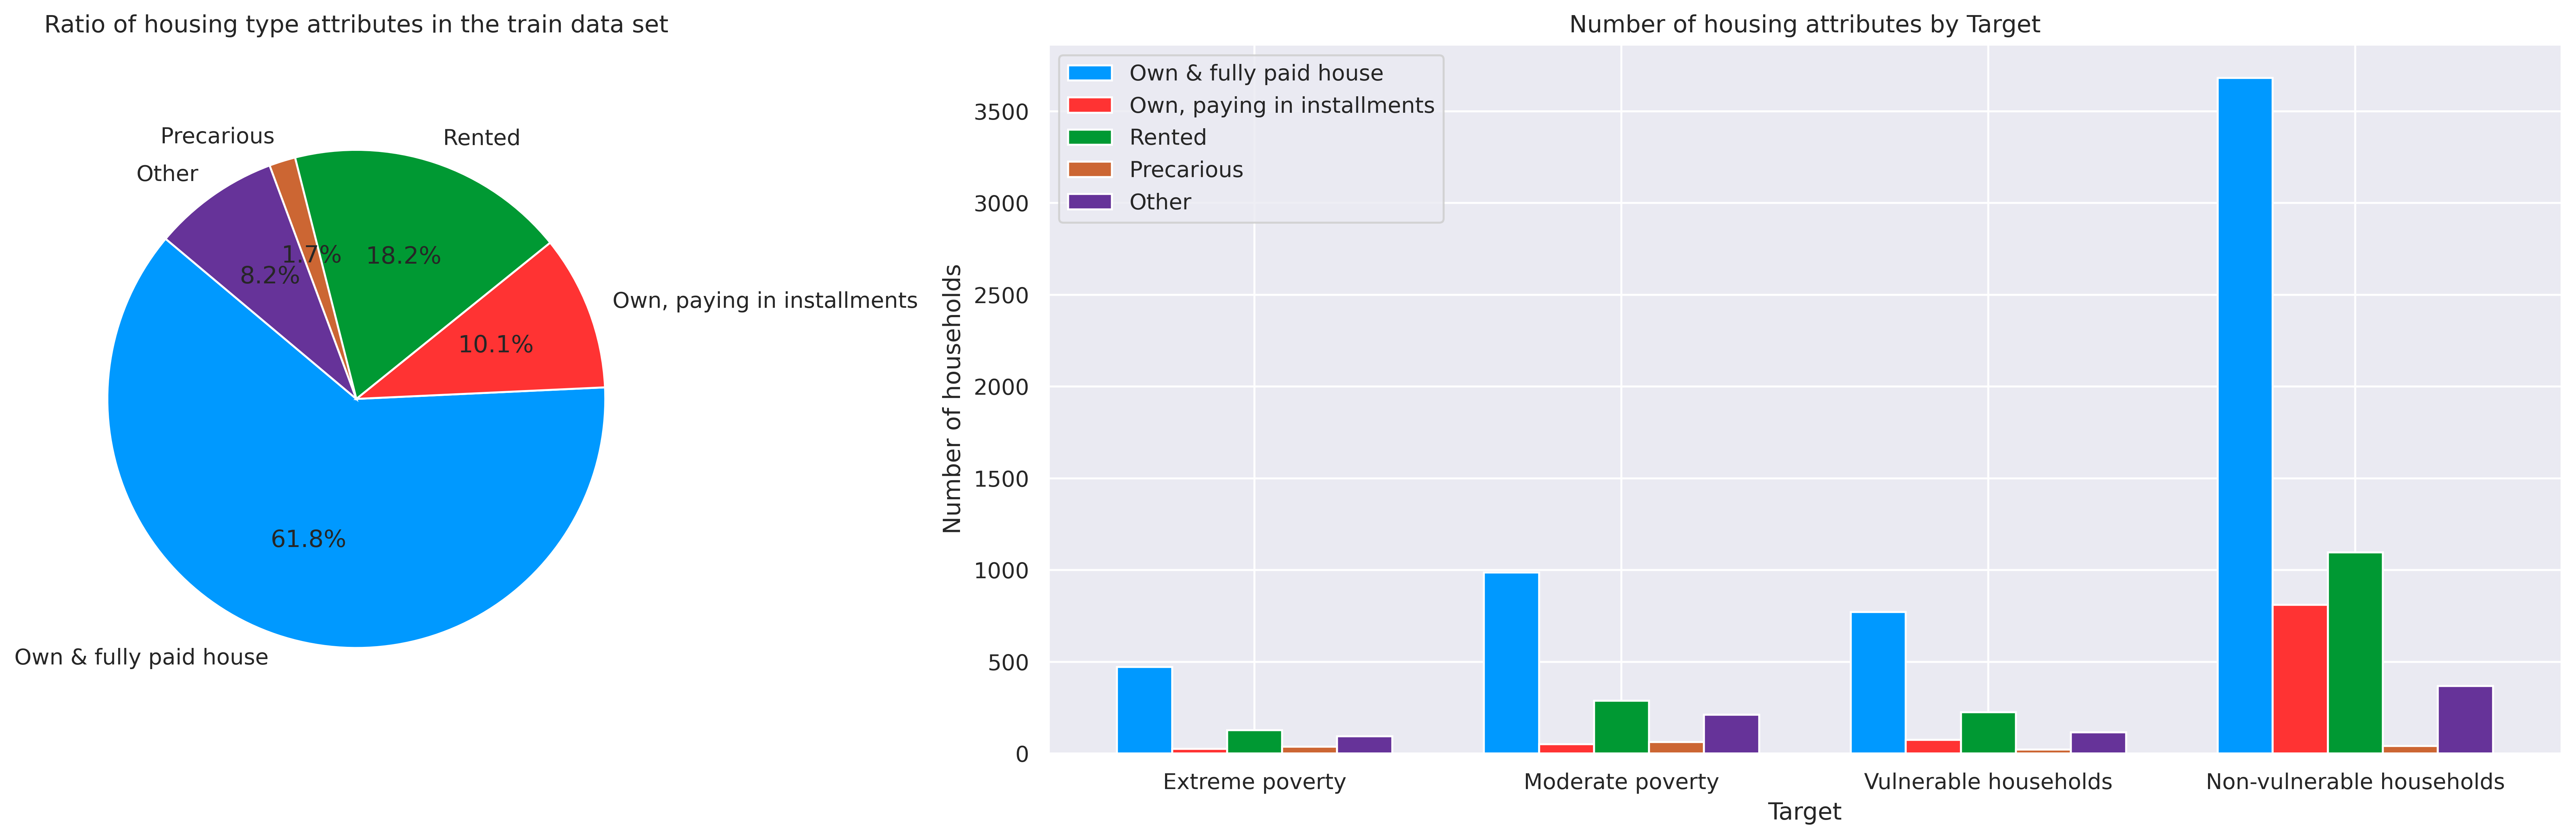

In [29]:
total_houses = sum(train[f'tipovivi{i}'].sum() for i in range(1, 6))

sizes = [train[f'tipovivi{i}'].sum() for i in range(1, 6)]
labels = ['Own & fully paid house', 'Own, paying in installments', 'Rented', 'Precarious', 'Other']
colors = ['#0099FF', '#FF3333', '#009933', '#CC6633', '#663399']
percentages = [100 * size / total_houses for size in sizes]

# Pie chart
plt.figure(figsize=(18, 6))  
plt.subplot2grid((1, 3), (0, 0)) 
plt.pie(percentages, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Ratio of housing type attributes in the train data set')
plt.axis('equal')

label = ['Extreme poverty', 'Moderate poverty', 'Vulnerable households', 'Non-vulnerable households']
index = np.arange(len(label))
bar_width = 0.15

# Bar chart
plt.subplot2grid((1, 3), (0, 1), colspan=2)
for i in range(1, 6):
    plt.bar(index + (i - 1) * bar_width, train.groupby('Target')[f'tipovivi{i}'].sum(), bar_width, label=labels[i - 1], color=colors[i - 1])

plt.xlabel('Target')
plt.ylabel('Number of households')
plt.title('Number of housing attributes by Target')
plt.xticks(index + 2*bar_width, label)
plt.legend()

plt.tight_layout()
plt.show()

**Nhận xét:**
- Số lượng hộ gia đình sống trong các căn nhà đã được trả hết tiền và sở hữu chiếm tỷ lệ lớn nhất, chiếm khoảng 62%.
- Hầu hết các hộ gia đình sống trong các căn nhà đã trả hết tiền và sở hữu đều thuộc Nhóm không dễ tổn thương.

### Số lượng phòng và chất liệu làm tường của từng kiểu gia đình

In [30]:
wall_mat = train[['paredblolad','paredzocalo','paredpreb','pareddes','paredmad','paredzinc','paredfibras','paredother']]
column_mapping = {
    'paredblolad': 'block or brick',
    'paredzocalo': 'socket',
    'paredpreb': 'prefabricated or cement',
    'pareddes': 'waste material',
    'paredmad': 'wood',
    'paredzinc': 'zinc',
    'paredfibras': 'natural fibers',
    'paredother': 'other'
}

wall_mat.rename(columns=column_mapping, inplace=True)
wall_mat.head(5)

block or brick  socket  prefabricated or cement  waste material  wood  \
0               1       0                        0               0     0   
1               0       0                        0               0     1   
2               0       0                        0               0     1   
3               1       0                        0               0     0   
4               1       0                        0               0     0   

   zinc  natural fibers  other  
0     0               0      0  
1     0               0      0  
2     0               0      0  
3     0               0      0  
4     0               0      0

In [31]:
original_categorical_variable = 'Material'
wall_mat_df = pd.DataFrame(columns=[original_categorical_variable])

for index, row in wall_mat.iterrows():
    category_index = row[row == 1].index[0]
    category_value = category_index.split('_')[-1]
    wall_mat_df.loc[index, original_categorical_variable] = category_value

wall_mat_df['Rooms'] = train['rooms']
wall_mat_df['Target'] = train['Target']
wall_mat_df.head(5)

Material  Rooms  Target
0  block or brick      3       4
1            wood      4       4
2            wood      8       4
3  block or brick      5       4
4  block or brick      5       4

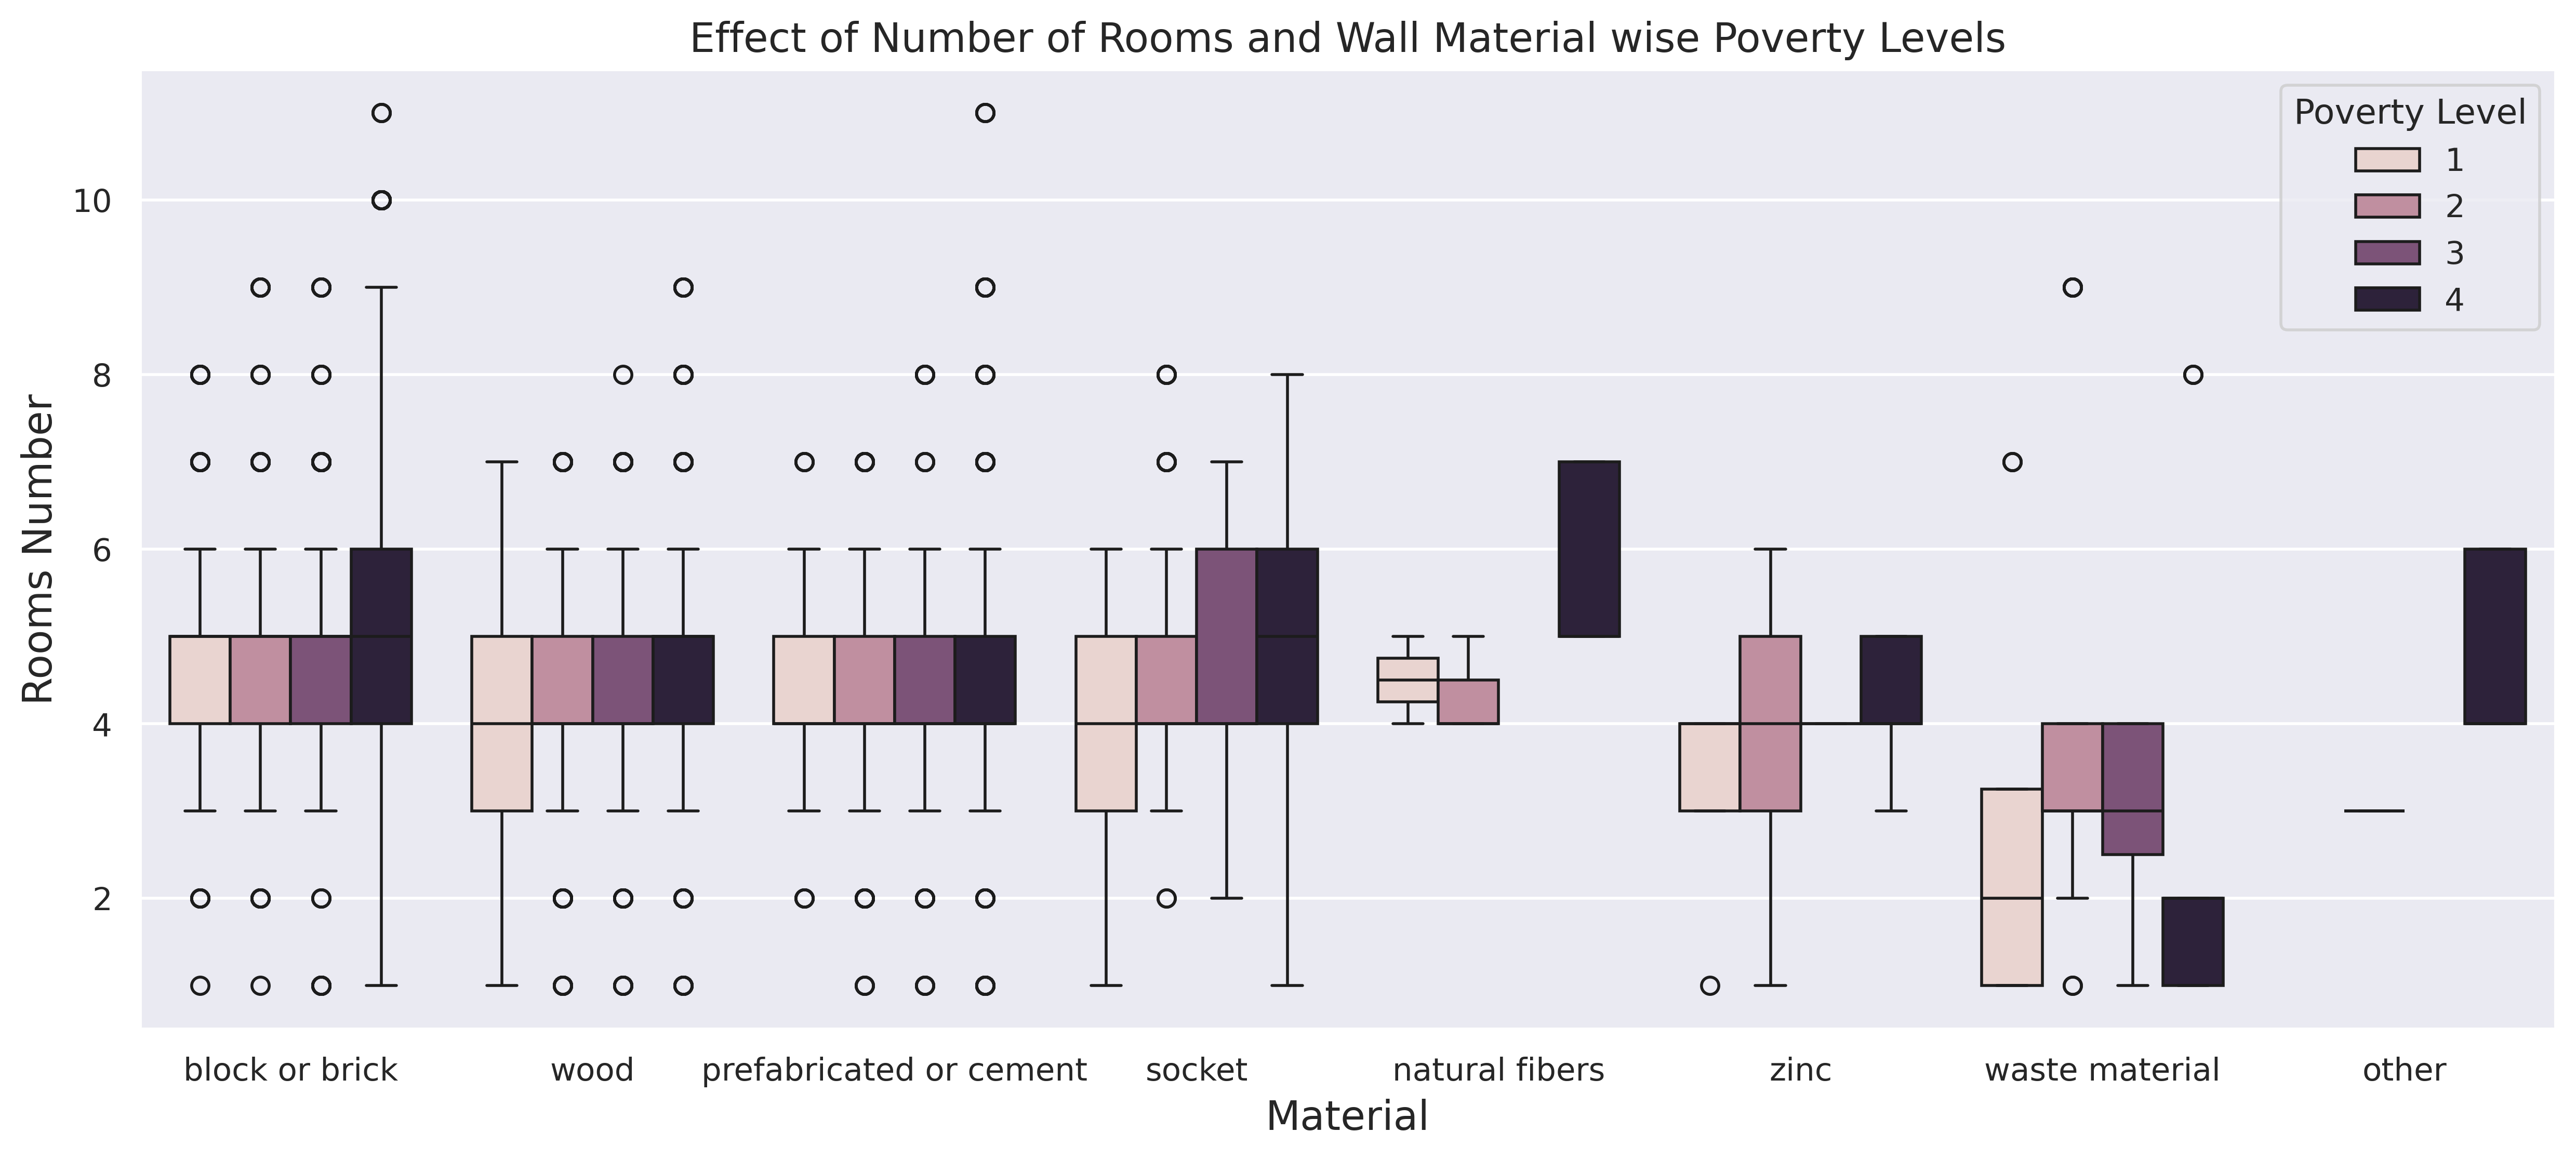

In [32]:
sns.set(rc={'figure.figsize':(15, 6)})
sns.boxplot(x="Material", y="Rooms", hue="Target", data=wall_mat_df)
plt.title("Effect of Number of Rooms and Wall Material wise Poverty Levels", fontsize=14)
plt.xlabel('Material', fontsize=14)
plt.ylabel('Rooms Number', fontsize=14)
plt.xticks(rotation=0)
plt.legend(title = 'Poverty Level')
plt.show()

**Nhận xét:**
- Dựa vào đồ thị, ở đa số loại vật liệu, ta thấy rằng mức tứ phân vị số phòng chủ yếu từ khoảng 4 đến 6 ở các mức kinh tế khác nhau.
- Riêng vật liệu là `waste material` lại có các phần tử nằm ở khoảng từ 1 đến 4 phòng, không như các loại vật liệu khác. Và cũng chính loại vật liệu đó, đại đa số là các hộ gia đình có mức kinh tế 1.
- Loại vật liệu `socket` có nhiều hộ thuộc mức kinh tế 3, 4 sử dụng cho nhà 4 - 6 phòng.
- Loại vật liệu `block or brick` có nhiều ngoại lai nhất, trong khi loại vật liệu `zinc` có ít ngoại lai nhất

### Sự phân bố nhà vệ sinh

In [33]:
dict_target = { 1 :'Extreme',
                2 :'Moderate',
                3 :'Vulnerable ',
                4 :'Non vulnerable'}

cols = train.columns

cols_name = ['No Toilet', 'Sewer/Cesspool', 'Septic Tank','Black Hole/Letrine', 'Other', 'Target']
sani_df = crearte_df(train, 'sanitario', cols_name)
sani_df

No Toilet  Sewer/Cesspool  Septic Tank  Black Hole/Letrine  Other
Target                                                                   
1               7             121          591                  35      1
2              12             278         1250                  47     10
3               9             157         1012                  31      0
4               9            1489         4451                  34     13

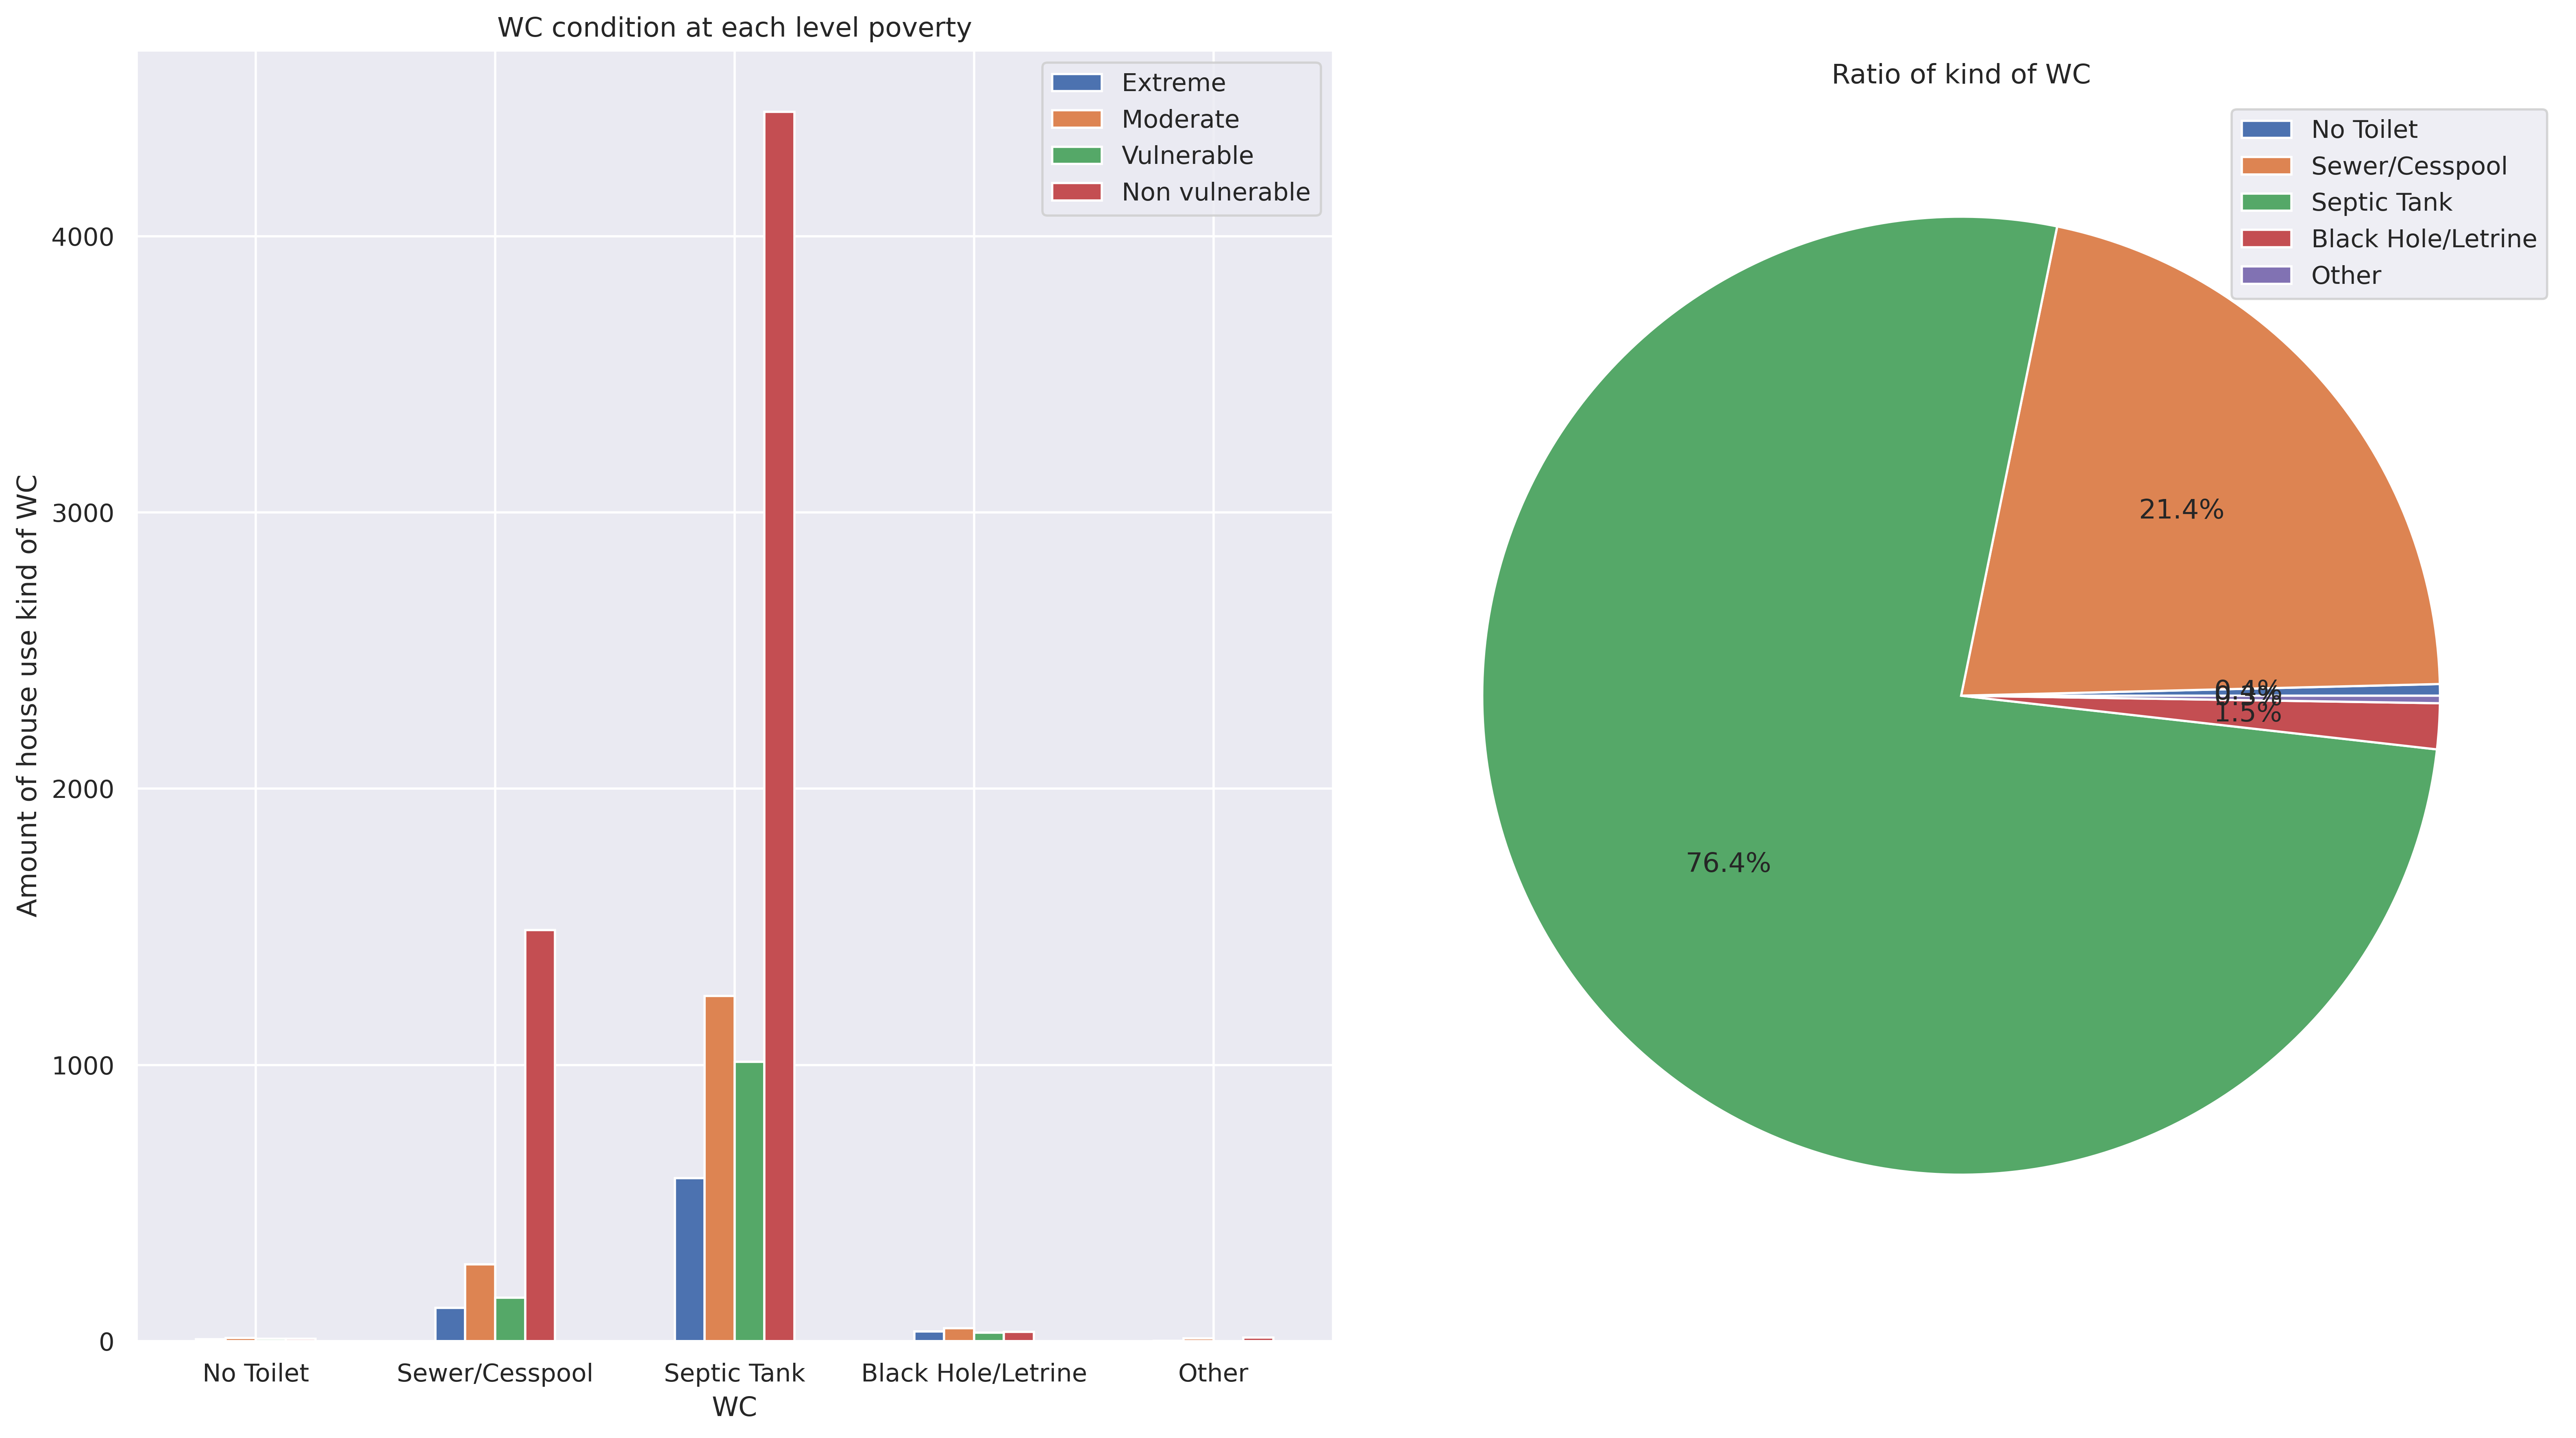

In [34]:
plot_bar_and_pie(sani_df,
                 'WC condition at each level poverty', 
                 'WC',
                 'Amount of house use kind of WC',
                 'Ratio of kind of WC')

**Nhận xét:**
- Ở biểu đồ tròn: 
    - Nhìn chung có thể thấy được 3/4 hộ gia đình dùng Spectic Tank ( bể tự hoại) và gần 1/4 số còn lại dùng Sewer/Cesspool (Cống/bể chứa) để đi vệ sinh
    - Rất ít hộ không có nhà vệ sinh hay sử dụng các phương pháp khác
- Ở biểu đồ cột:
    - Lượng các hộ không nghèo sử dụng Septic Tank chiếm phần lớn, gấp 3 lần hộ sử dụng Sewer/Cesspool
    - Ở các phương tiện vệ sinh còn lại, số lượng các hộ sử dụng rất ít và không có sự chênh lệch đáng kể.


### Loại năng lượng sử dụng cho việc nấu ăn

In [35]:
cols_name = ['No Enegry', 'Electric', 'Gas','Wood charcoal', 'Target']
enegry_df = crearte_df(train, 'energcocinar', cols_name)
enegry_df

No Enegry  Electric   Gas  Wood charcoal
Target                                          
1               7       246   404             98
2               3       623   820            151
3               3       526   600             80
4               5      3284  2557            150

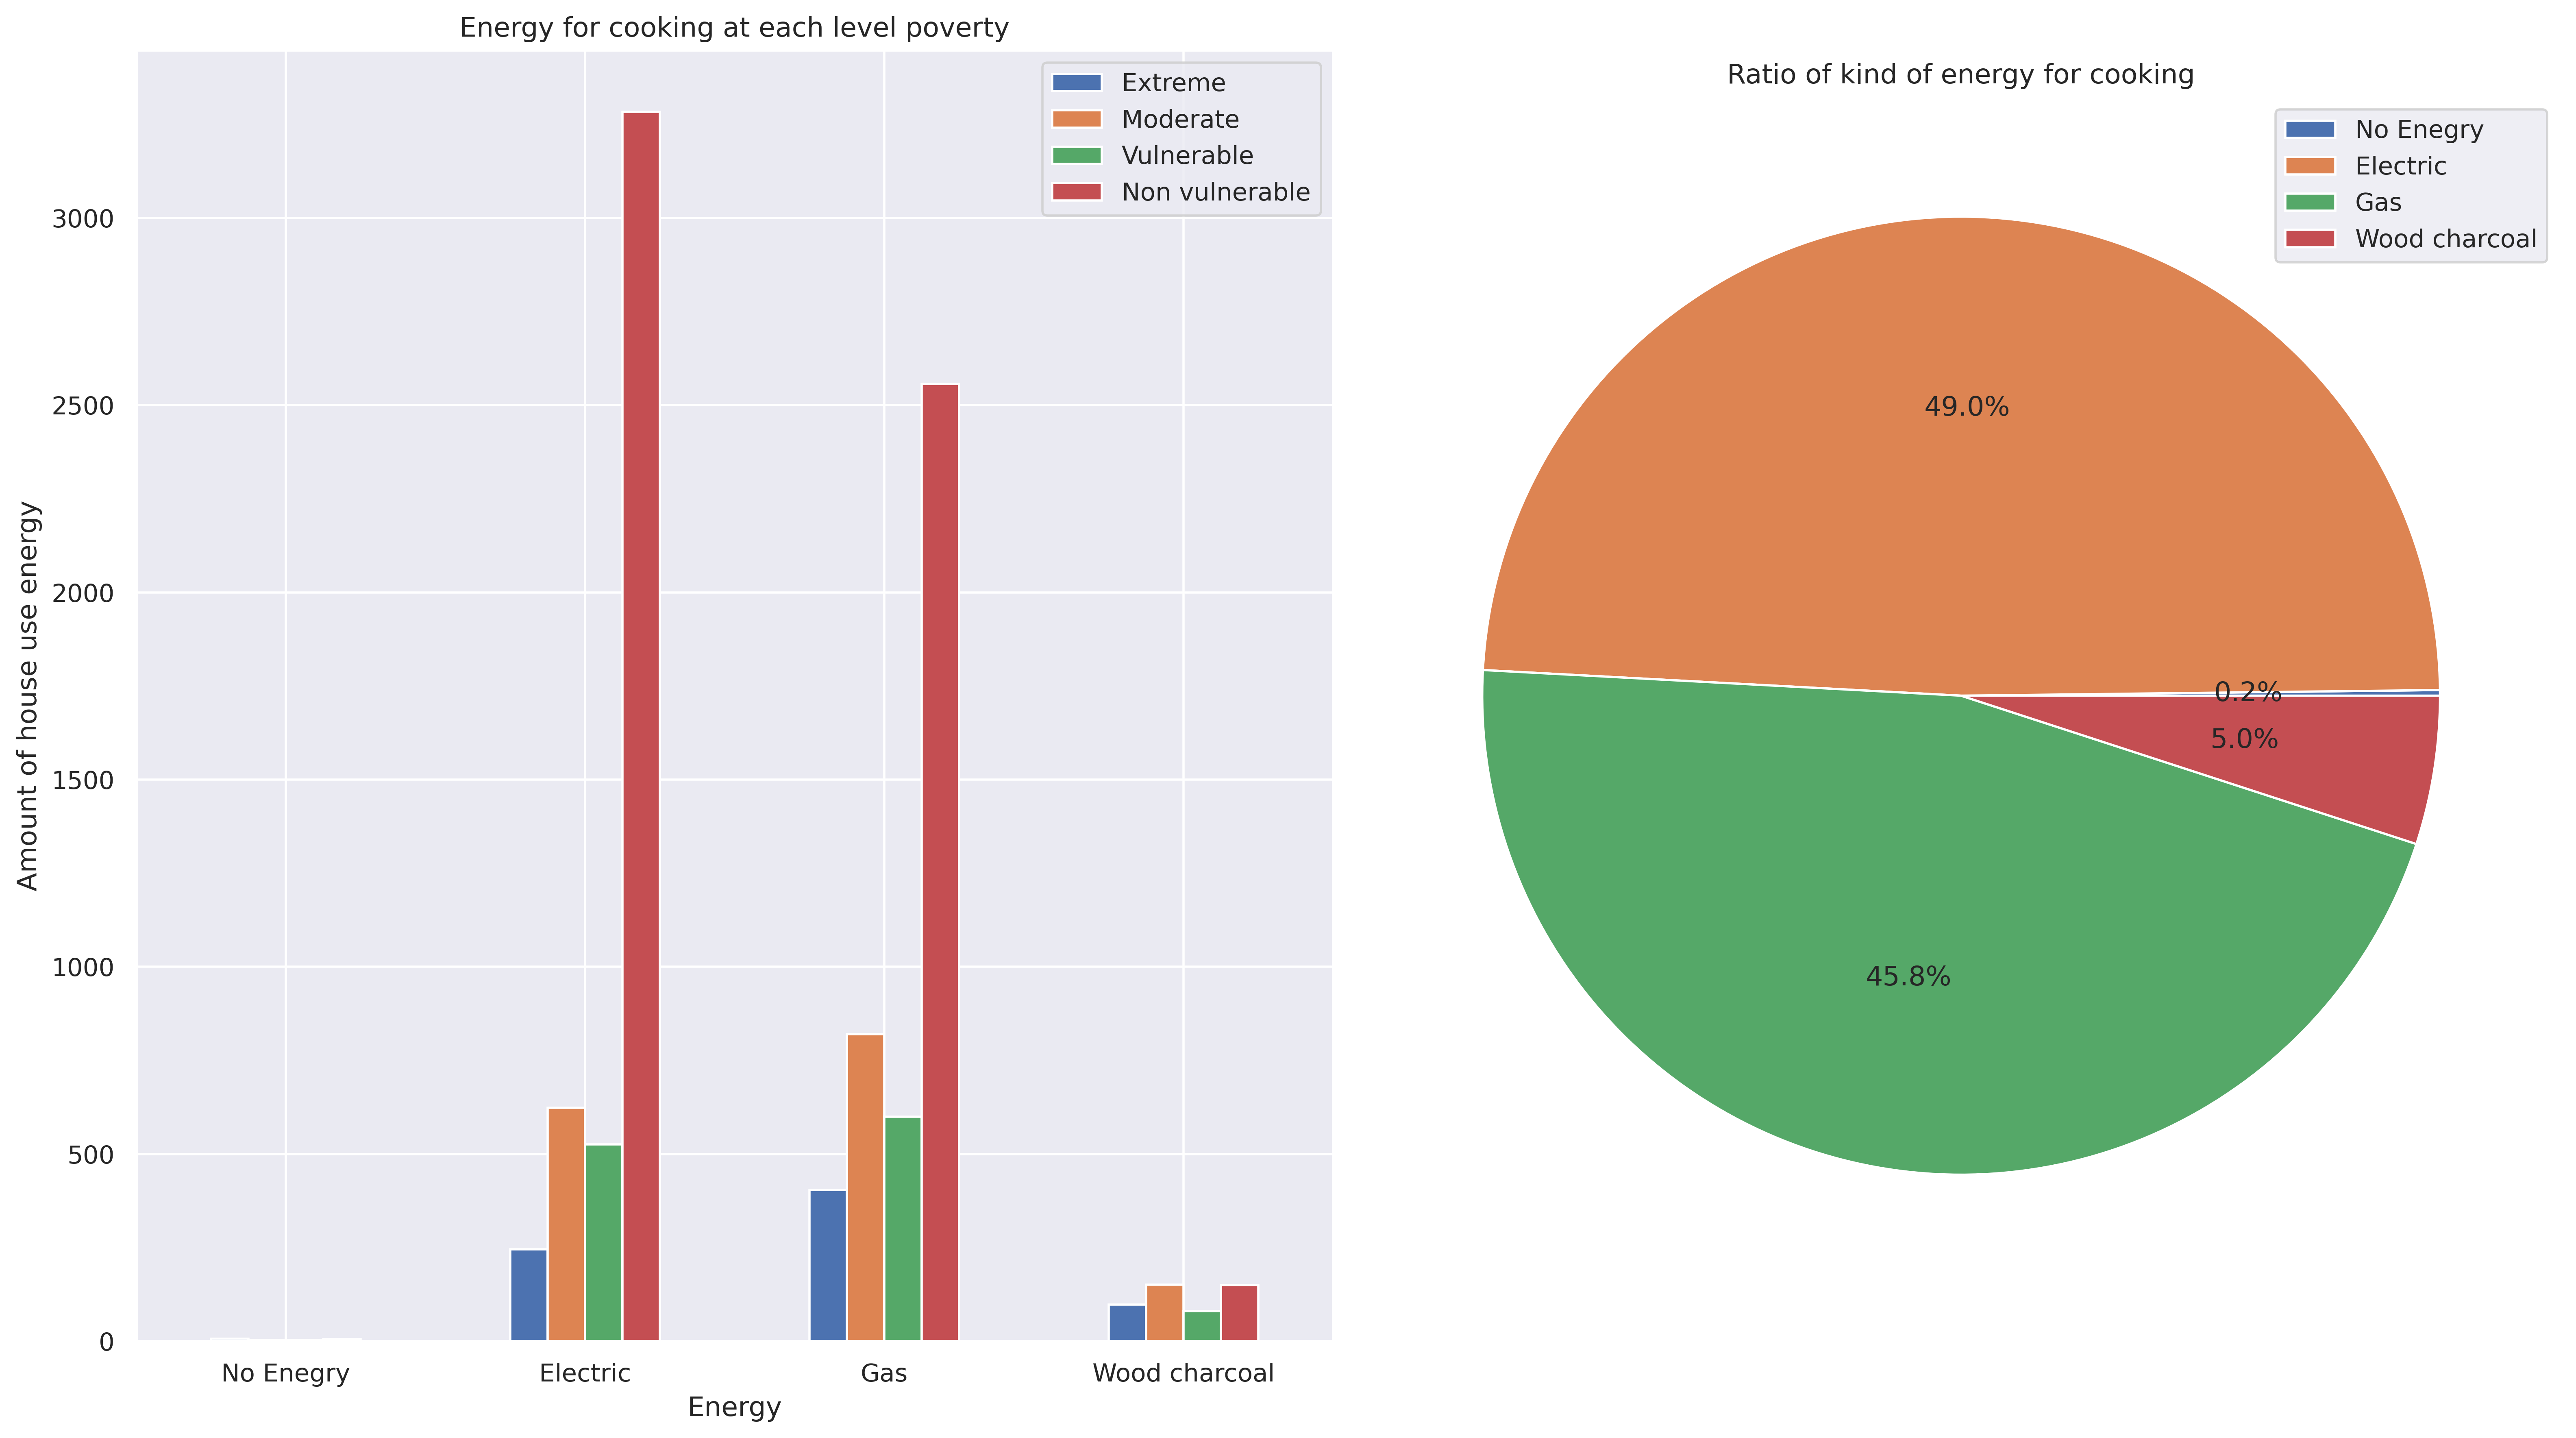

In [36]:
plot_bar_and_pie(enegry_df,
                 'Energy for cooking at each level poverty', 
                 'Energy',
                 'Amount of house use energy',
                 'Ratio of kind of energy for cooking')

**Nhận xét:**
- Hơn 90% các hộ sử dụng Electirc và Gas để nấu ăn. Hai phương pháp nấu ăn này lần lượt chiếm gần 50, 45% trong dữ liệu.
- Wood charcoal (than gỗ) chỉ chiếm một phần nhỏ.
- Phần lớn các hộ không nghèo sử dụng Electric và gas. Hai phương pháp này hầu như đều được sử dụng trong đời sống hiện nay.
- Vẫn tồn tại một phần nhỏ các hộ không có nhiên liệu để nấu ăn, rơi vào các hộ nghèo mức độ 1 (cực kì nghèo)

### Các cách xử lý rác thải

In [37]:
cols_name = ['Tanker Truck', 'Botan hollow/Buried', 'Burn','Throw to space','To river/sea', 'Other', 'Target']
elimbasu_df= crearte_df(train, 'elimbasu', cols_name)
elimbasu_df

Tanker Truck  Botan hollow/Buried  Burn  Throw to space  To river/sea  \
Target                                                                          
1                605                   35   115               0             0   
2               1282                   82   222              11             0   
3               1010                   43   153               3             0   
4               5539                  127   318               0             0   

        Other  
Target         
1           0  
2           0  
3           0  
4          12

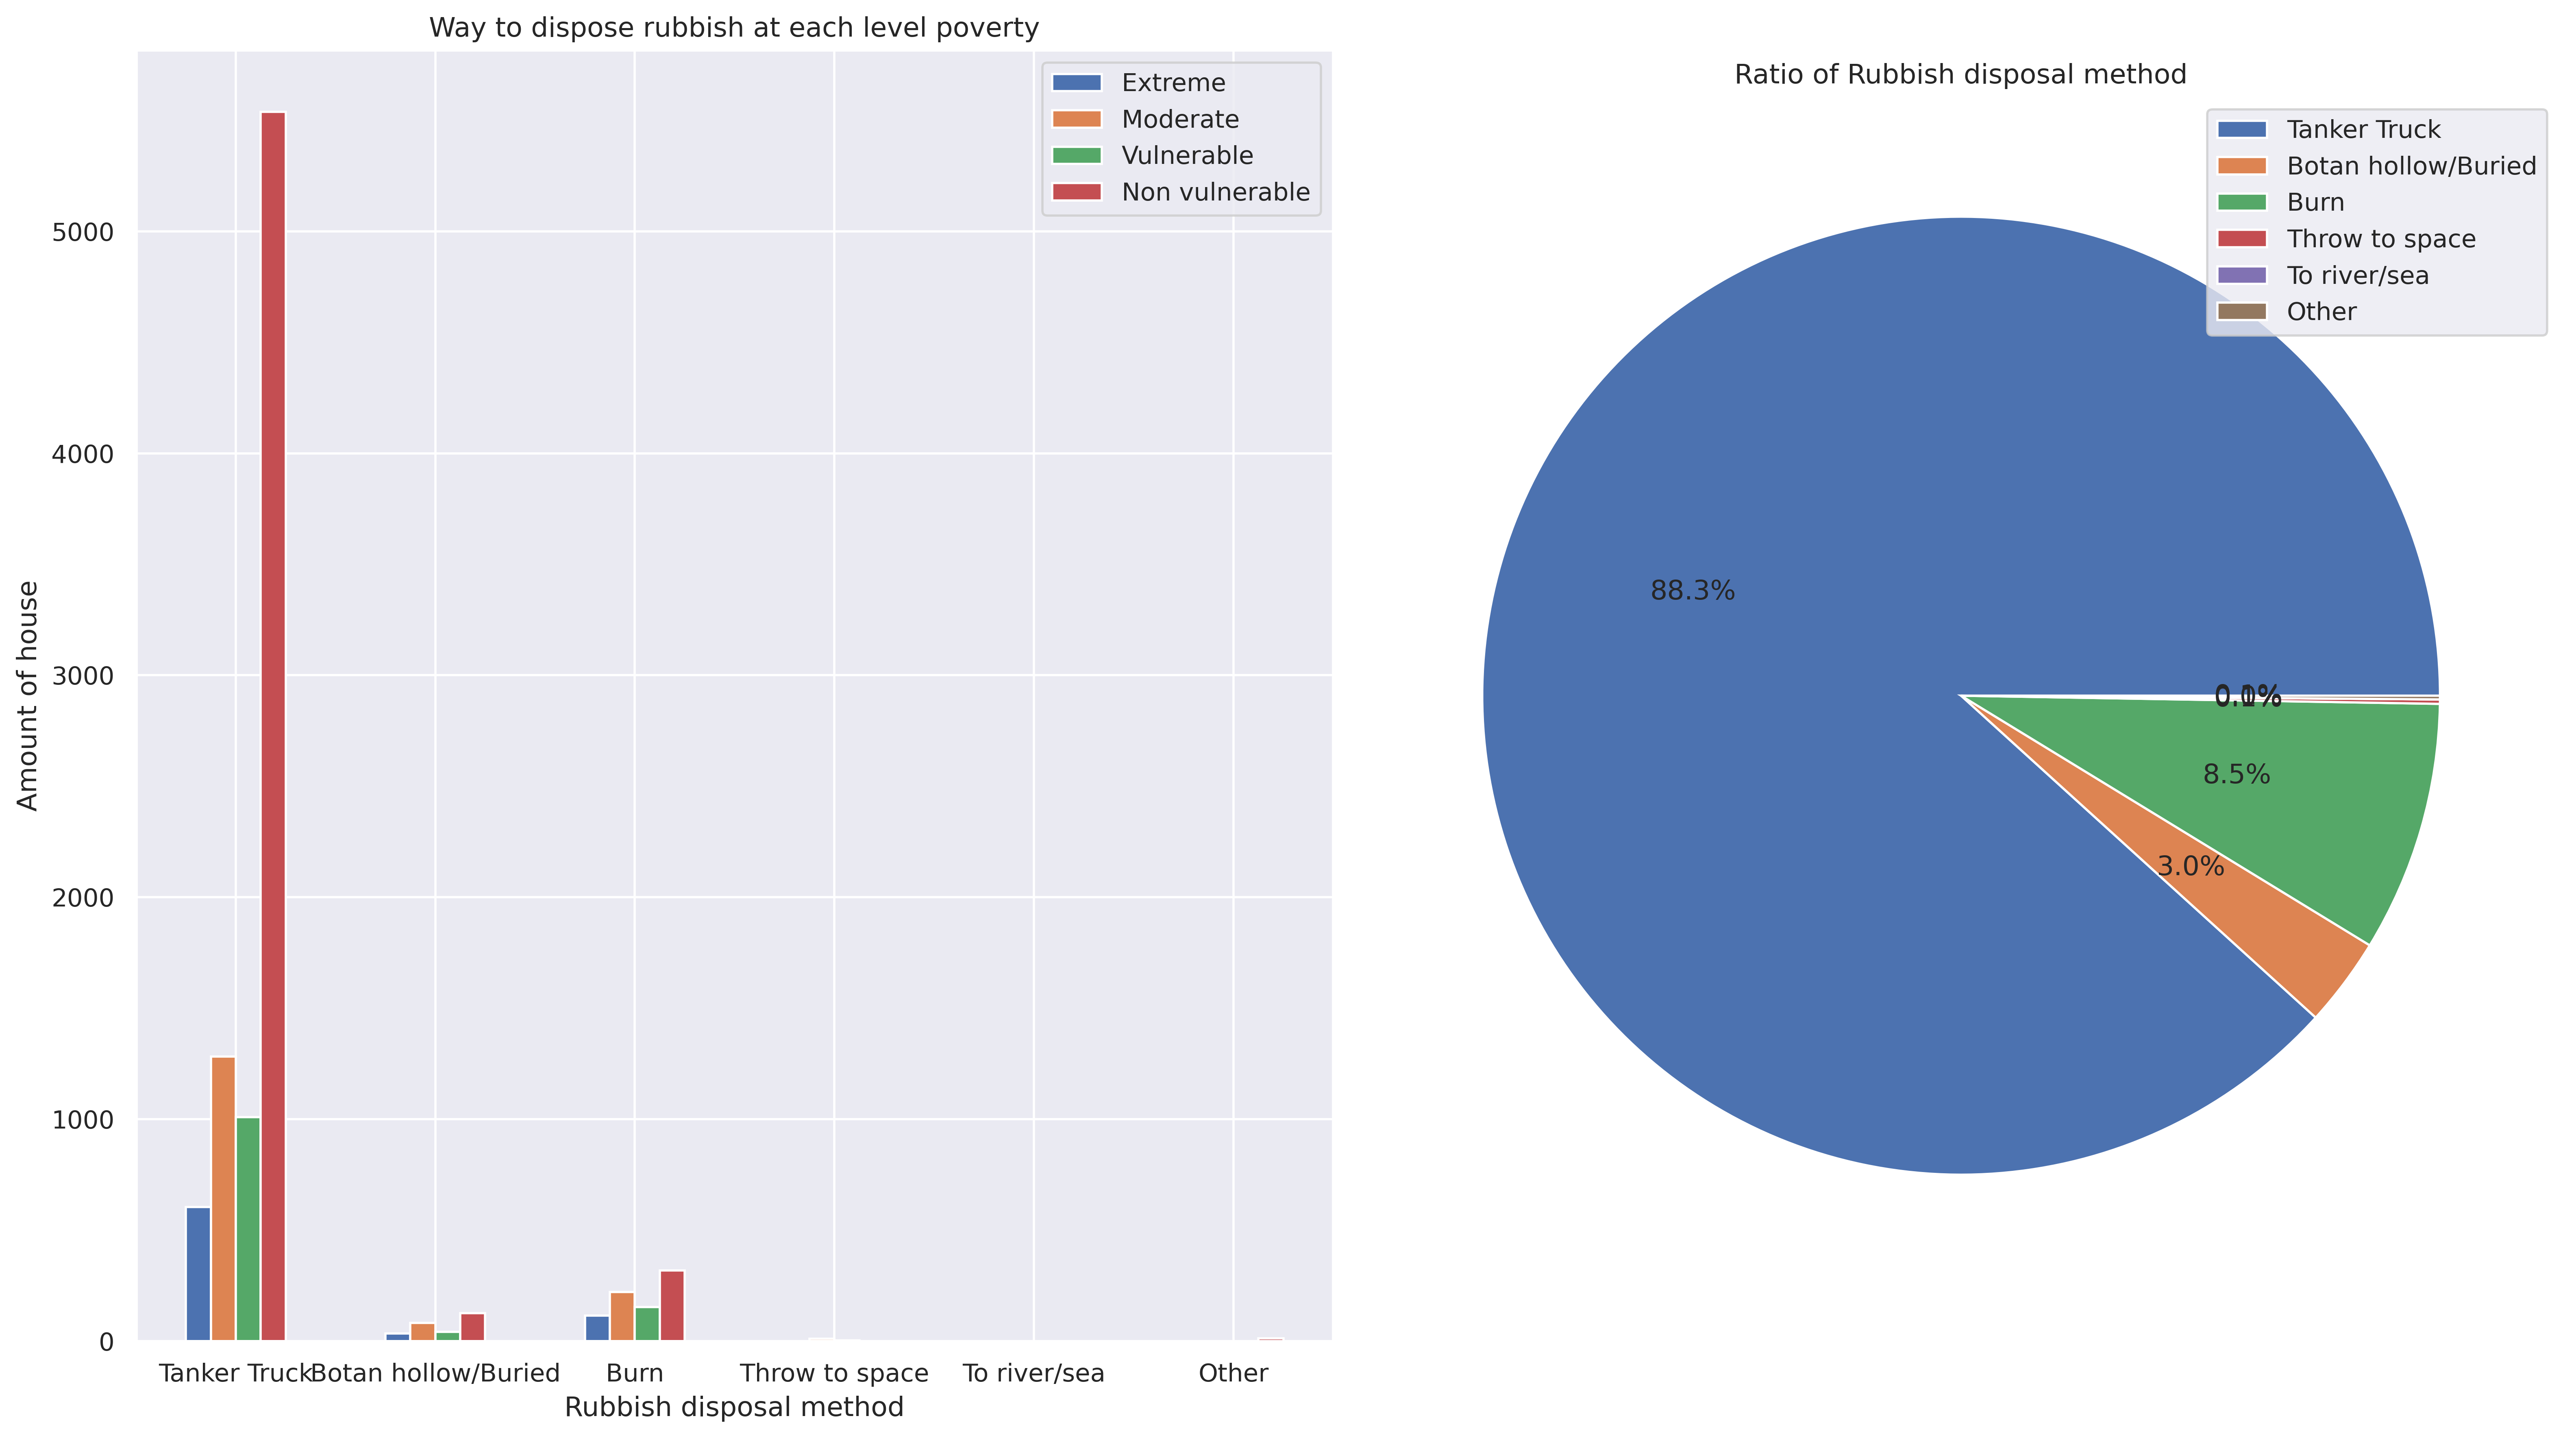

In [38]:
plot_bar_and_pie(elimbasu_df,
                 'Way to dispose rubbish at each level poverty', 
                 'Rubbish disposal method',
                 'Amount of house',
                 'Ratio of Rubbish disposal method')

**Nhận xét:**
- Phần lớn các hộ sử dụng Tanker Truck để vứt rác. Đó cũng là các xử lý rác thải được dùng hiện nay
- Hầu như không có hộ chọn vứt ra sông hoặc vứt ra đất.

### Chất lượng tường, sàn và mái nhà 

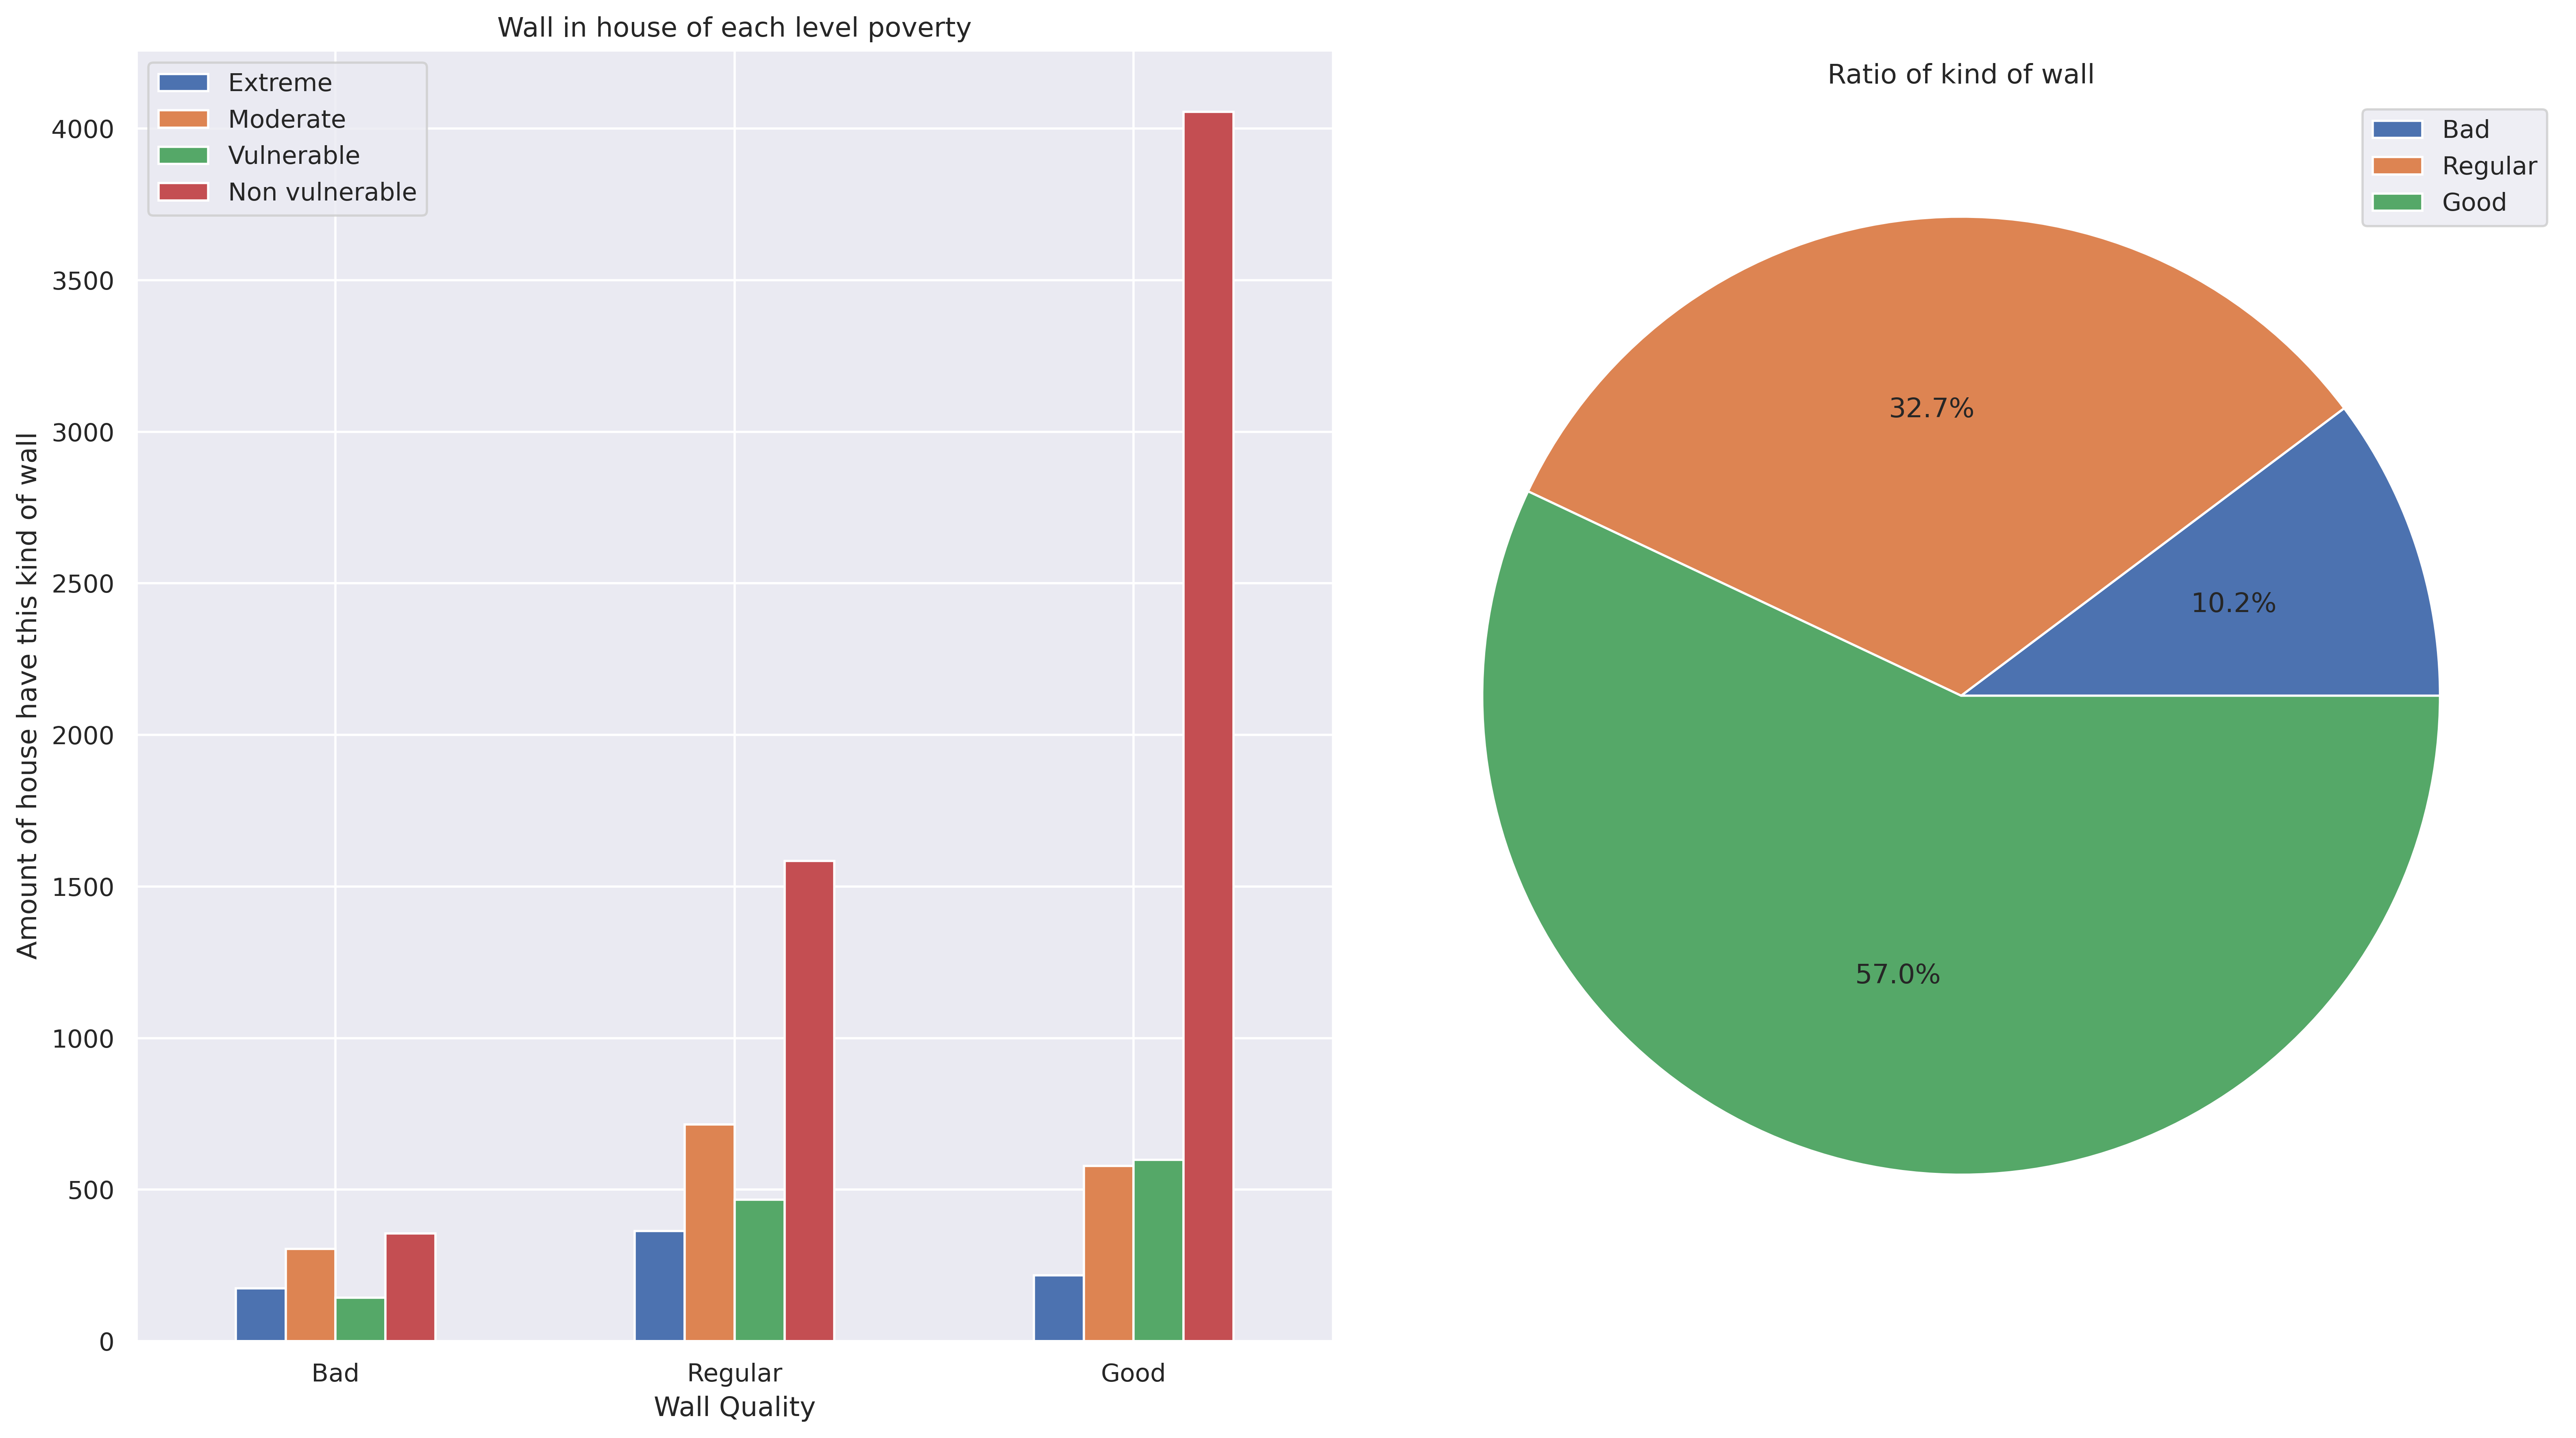

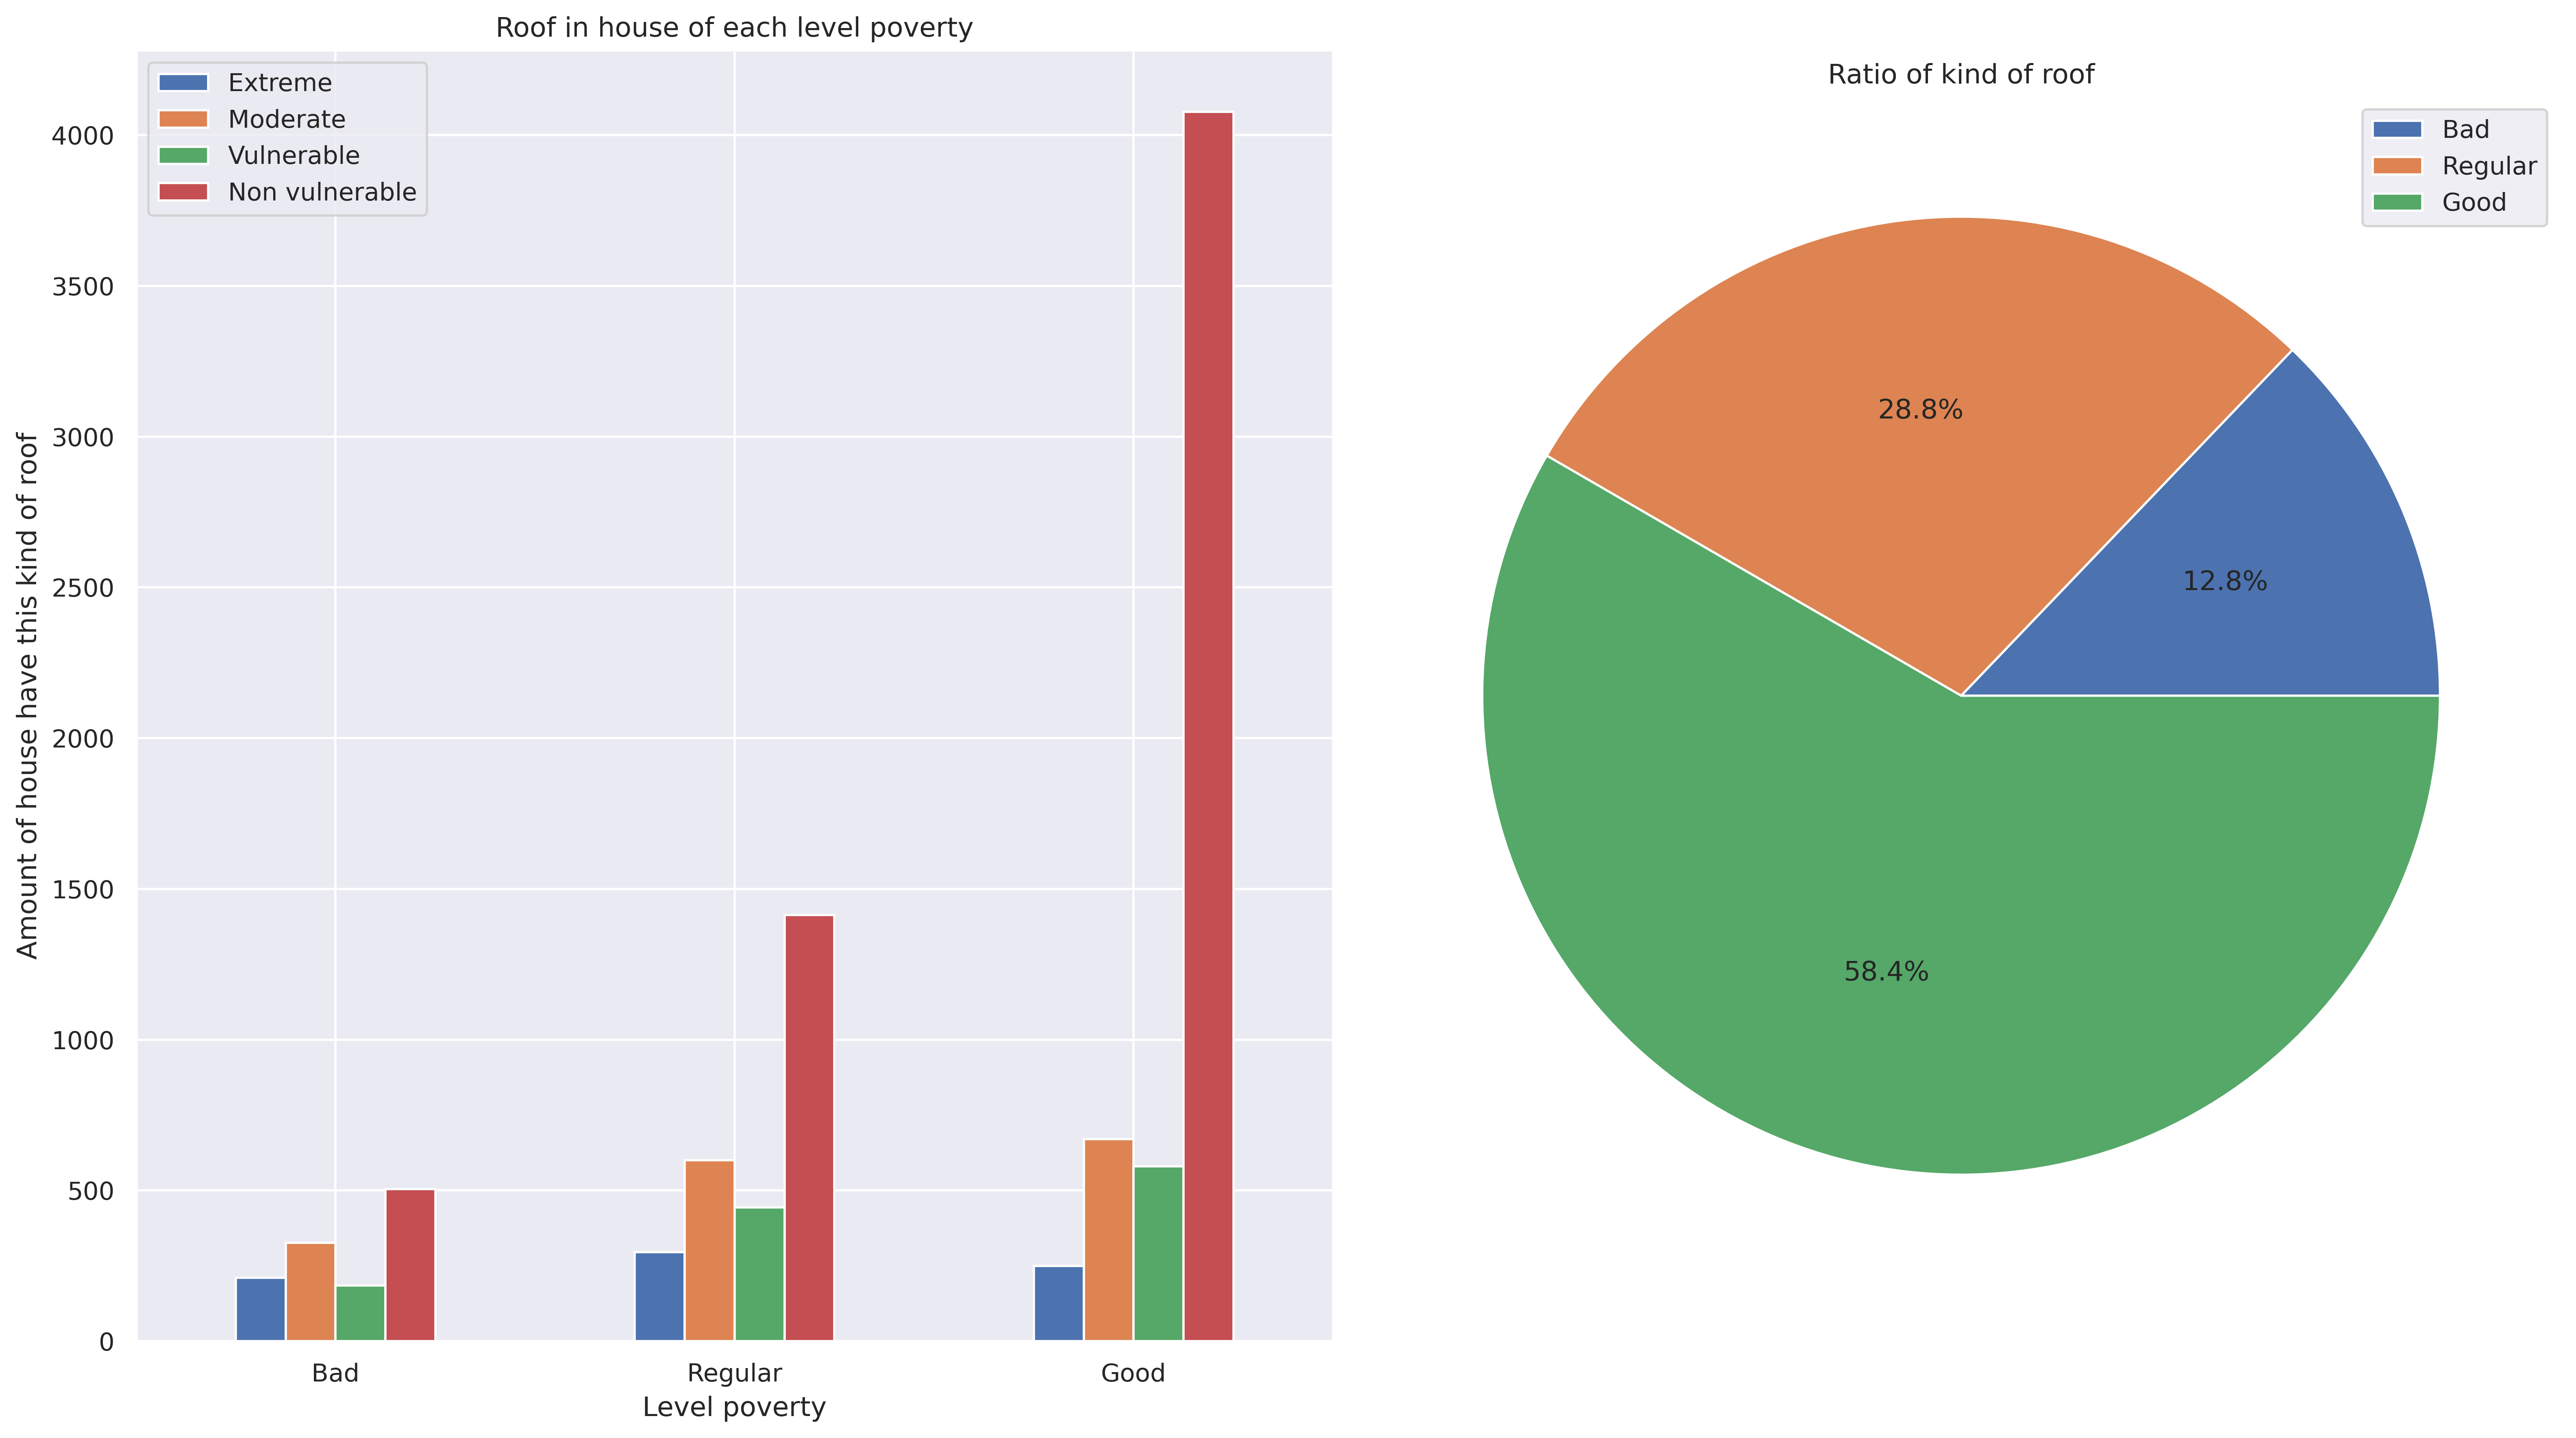

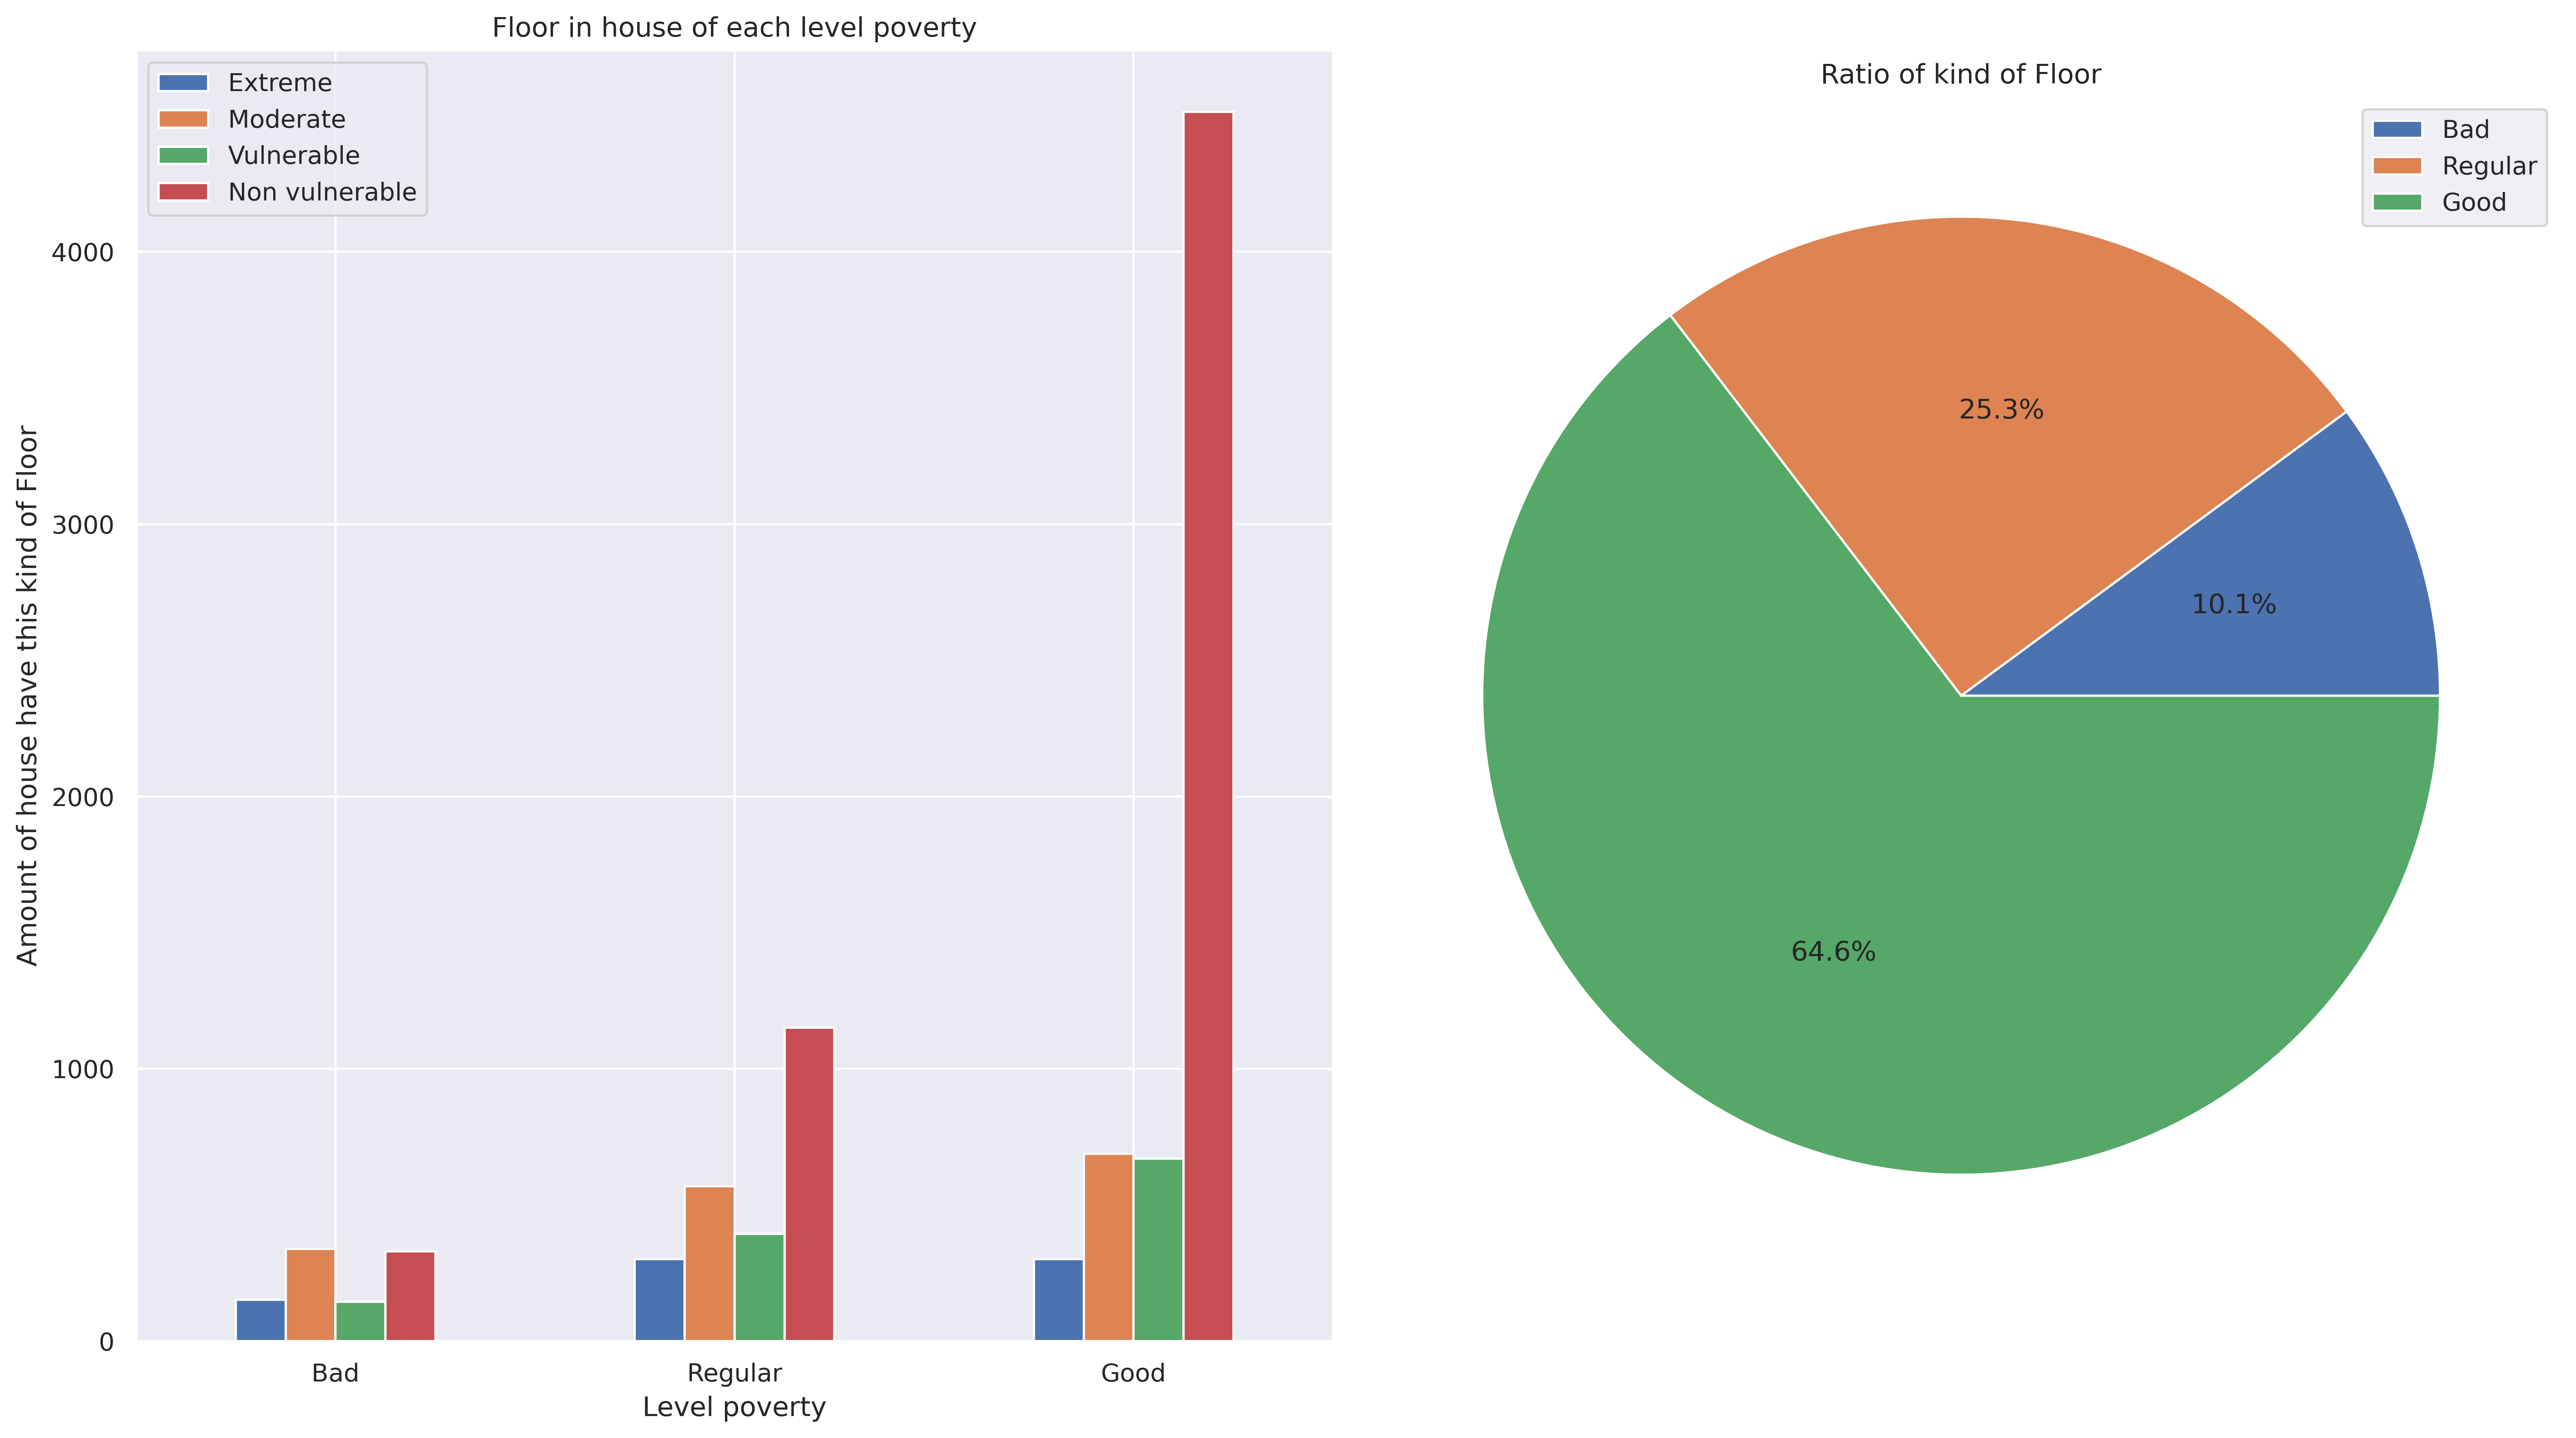

In [39]:
cols_name1 = ['Bad', 'Regular', 'Good','Target']
epared_df= crearte_df(train, 'epared', cols_name1)
epared_df

plot_bar_and_pie(epared_df,
                 'Wall in house of each level poverty', 
                 'Wall Quality',
                 'Amount of house have this kind of wall',
                 'Ratio of kind of wall')

cols_name2 = ['Bad', 'Regular', 'Good','Target']
etecho_df= crearte_df(train, 'etecho', cols_name2)
etecho_df

plot_bar_and_pie(etecho_df,
                 'Roof in house of each level poverty', 
                 'Level poverty',
                 'Amount of house have this kind of roof',
                 'Ratio of kind of roof')


cols_name3 = ['Bad', 'Regular', 'Good','Target']
eviv_df= crearte_df(train, 'eviv', cols_name3)
eviv_df

plot_bar_and_pie(eviv_df,
                 'Floor in house of each level poverty', 
                 'Level poverty',
                 'Amount of house have this kind of Floor',
                 'Ratio of kind of Floor')


**Nhận xét 3 biểu đồ:**

- Hơn 50% các hộ có chất lượng tường, sàn nhà, mái nhà đạt mức tốt. Phần lớn trong số đó là các hộ không nghèo.
- Các hộ cực kì nghèo, nghèo vừa phải thường có chất lượng nhà ở tệ hoặc mức trung bình.